<a href="https://colab.research.google.com/github/TomAmster/Data-Science/blob/master/Submission_Combined_Notebooks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Submission - Robot or Human Facebook Competition

*   Yonatan Rosenberg
*   Orel Alon
*   Yizhar Almagor
*   Tom Amsterdam

**Table Of Content - Chapters**

1.   EDA Explaratory Data Analysis - Statistics and Visualization
2.   Data Pre-Processing - Data Cleaning and Data Embeddings
3.   Time Sereis Analysis and Processing
4.   Feature Engineering
5.   Models and Model Comparison
6.   Cross Validation
7.   Kaggle Submission
8.   Feature Selection
9.   Error Analysis
10.  SMOTE Resampling 



In [2]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [ ]:
#these line are needed for section 5, but are shown here in case one needs to install 

from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split,cross_validate,StratifiedShuffleSplit
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score,classification_report, average_precision_score
from sklearn.calibration import CalibratedClassifierCV
import xgboost
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import RandomOverSampler as ROS
from imblearn.over_sampling import SMOTE
import shap
from sklearn.neighbors import NearestNeighbors

In [3]:
#this line is necessary to add support for both Google colab and local
!git clone "https://github.com/TomAmster/Data-Science.git"


fatal: destination path 'Data-Science' already exists and is not an empty directory.


# 1. EDA Explaratory Data Analysis

## 1.1 Loading the datasets


In [4]:
parts_num = 10
test_path = './Data-Science/Data/test.csv'
train_path = './Data-Science/Data/train.csv'

bids = pd.read_csv('./Data-Science/Data/split_bids/bids_part_0.csv')
bids = bids.drop(columns=['Unnamed: 0'])
for i in range(1,parts_num):
  bids_part = pd.read_csv('./Data-Science/Data/split_bids/bids_part_'+ str(i)+ '.csv')
  bids_part = bids_part.drop(columns=['Unnamed: 0'])
  bids = bids.append(bids_part, ignore_index=True)

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)


## 1.2 Merging Datasets- Train & Test with the Bids

In [5]:
bidders_df = pd.concat([train, test])
merged_bids = pd.merge(bidders_df, bids, on='bidder_id', how='left')

train_bids = pd.merge(train, bids, on='bidder_id', how='left')
merged_bids.head(10)

/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,address,bidder_id,outcome,payment_account,bid_id,auction,merchandise,device,time,country,ip,url
0,a3d2de7675556553a5f08e4c88d2c228vt0u4,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,a3d2de7675556553a5f08e4c88d2c228754av,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,a3d2de7675556553a5f08e4c88d2c228vt0u4,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,a3d2de7675556553a5f08e4c88d2c228754av,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,a3d2de7675556553a5f08e4c88d2c228vt0u4,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,a3d2de7675556553a5f08e4c88d2c228754av,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,a3d2de7675556553a5f08e4c88d2c228vt0u4,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,a3d2de7675556553a5f08e4c88d2c228754av,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,a3d2de7675556553a5f08e4c88d2c228vt0u4,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,a3d2de7675556553a5f08e4c88d2c228754av,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3
5,a3d2de7675556553a5f08e4c88d2c228vt0u4,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,a3d2de7675556553a5f08e4c88d2c228754av,666164.0,1m5t8,home goods,phone35,9.763163e+15,ke,192.145.217.243,vasstdc27m7nks3
6,a3d2de7675556553a5f08e4c88d2c228vt0u4,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,a3d2de7675556553a5f08e4c88d2c228754av,700546.0,0xo1d,home goods,phone4,9.763386e+15,et,223.233.166.93,vasstdc27m7nks3
7,a3d2de7675556553a5f08e4c88d2c228vt0u4,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,a3d2de7675556553a5f08e4c88d2c228754av,926676.0,pfl78,home goods,phone195,9.764267e+15,ke,190.63.186.68,vasstdc27m7nks3
8,a3d2de7675556553a5f08e4c88d2c228vt0u4,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,a3d2de7675556553a5f08e4c88d2c228754av,960606.0,xs8rq,home goods,phone4,9.764392e+15,ke,17.72.96.225,vasstdc27m7nks3
9,a3d2de7675556553a5f08e4c88d2c228vt0u4,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,a3d2de7675556553a5f08e4c88d2c228754av,1023806.0,wzwhk,home goods,phone79,9.764658e+15,ng,209.80.85.101,vasstdc27m7nks3


## 1.3 Creating Count Statistics for the pararmeters

In [6]:
bids_count = bids.groupby("bidder_id")["bid_id","device","country","ip","merchandise","auction","url"].nunique()
bids_count.reset_index(inplace=True)
bids_count = bids_count.add_prefix("count_")
bids_count.rename(columns={"count_bidder_id":"bidder_id"},inplace=True)
train_counts = pd.merge(train,bids_count,on="bidder_id",how="left")

In [7]:
train_counts.head()

,bidder_id,payment_account,address,outcome,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24.0,14.0,6.0,20.0,1.0,18.0,1.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,2.0,1.0,4.0,1.0,4.0,2.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155.0,53.0,2.0,123.0,1.0,23.0,91.0


### 1.4 Creating Count Statistics Per Parameter Per Auction

In [8]:
train_counts['average_bids_per_auction'] = train_counts.apply(lambda row:row['count_bid_id']/row['count_auction'] if row['count_auction']>0 else 0, axis=1) 
train_counts['average_bids_per_url'] = train_counts.apply(lambda row:row['count_bid_id']/row['count_url'] if row['count_url']>0 else 0, axis=1) 
train_counts['average_bids_per_device'] = train_counts.apply(lambda row:row['count_bid_id']/row['count_device'] if row['count_device']>0 else 0, axis=1) 
train_counts['average_bids_per_country'] = train_counts.apply(lambda row:row['count_bid_id']/row['count_country'] if row['count_country']>0 else 0, axis=1) 

In [9]:
train_counts.head()

,bidder_id,payment_account,address,outcome,count_bid_id,count_device,count_country,count_ip,count_merchandise,count_auction,count_url,average_bids_per_auction,average_bids_per_url,average_bids_per_device,average_bids_per_country
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0,24.0,14.0,6.0,20.0,1.0,18.0,1.0,1.333333,24.000000,1.714286,4.0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0.0,3.0,2.0,1.0,3.0,1.0,1.0,2.0,3.000000,1.500000,1.500000,3.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0.0,4.0,2.0,1.0,4.0,1.0,4.0,2.0,1.000000,2.000000,2.000000,4.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.000000,1.000000,1.000000,1.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0.0,155.0,53.0,2.0,123.0,1.0,23.0,91.0,6.739130,1.703297,2.924528,77.5


In [10]:
human_data = train_counts[train_counts['outcome'] == 0]
robot_data = train_counts[train_counts['outcome'] == 1]

In [11]:
print(f"average bids per robot: %.0f" % robot_data.count_bid_id.mean() )
print(f"average bids per human:  %.0f" % human_data.count_bid_id.mean())
print(f"average bids per auction by robot: %.0f" % robot_data.average_bids_per_auction.mean())
print(f"average bids per auction by human:  %.0f" % human_data.average_bids_per_auction.mean())
print(f"average number of devices by robot: %.0f" % robot_data.count_device.mean())
print(f"average number of devices by human:  %.0f" % human_data.count_device.mean())
print(f"average number of IPs by robot: %.0f" % robot_data.count_ip.mean())
print(f"average number of IPs by human:  %.0f" % human_data.count_ip.mean())
print(f"average number of URLs by robot: %.0f" % robot_data.count_url.mean())
print(f"average number of URLs by human:  %.0f" % human_data.count_url.mean())

average bids per robot: 4004
average bids per human:  1414
average bids per auction by robot: 23
average bids per auction by human:  6
average number of devices by robot: 164
average number of devices by human:  74
average number of IPs by robot: 2388
average number of IPs by human:  581
average number of URLs by robot: 545
average number of URLs by human:  335


## 1.5 Visualizations

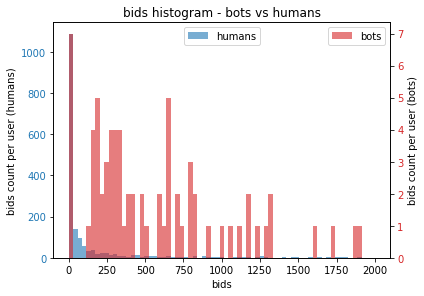

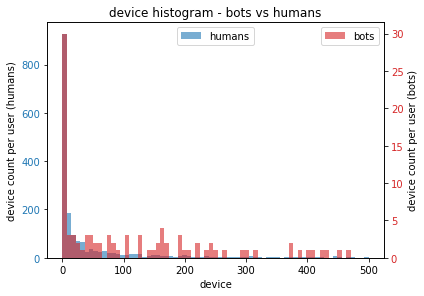

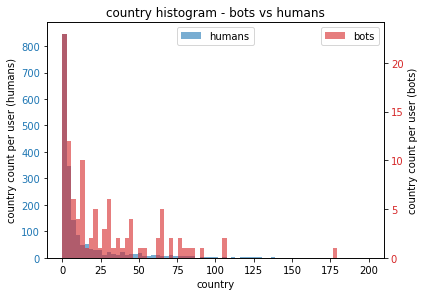

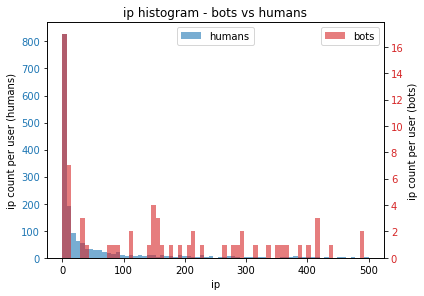

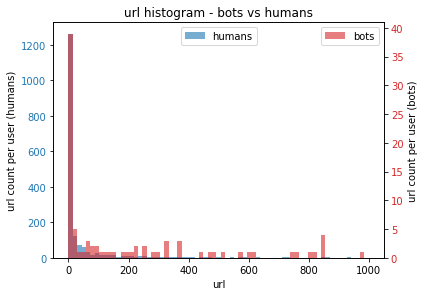

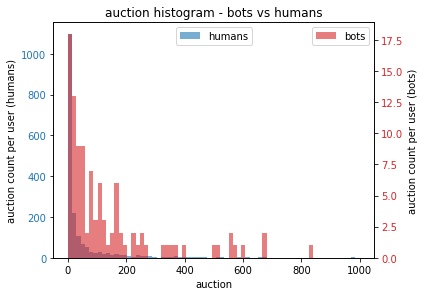

In [12]:
def plot_hist(column_name,lowest_bin,highest_bin,no_bins,name,joined):
  fig, ax1 = plt.subplots()
  bins = np.linspace(lowest_bin,highest_bin,no_bins)
  color = 'tab:blue'
  col_name = name

  ax1.hist(joined[joined['outcome'] == 0 ][column_name],bins,color=color,alpha=0.6,label='humans')
  ax1.tick_params(axis='y', labelcolor=color)
  ax1.legend(loc='upper center')
  ax1.set_ylabel(col_name+' count per user (humans)')
  ax1.set_xlabel(col_name)

  ax2 = ax1.twinx() 
  color = 'tab:red'
  ax2.hist(joined[joined['outcome'] == 1 ][column_name],bins,color=color,alpha=0.6,label='bots')
  ax2.tick_params(axis='y', labelcolor=color)
  ax2.legend(loc='upper right')
  ax2.set_ylabel(col_name +' count per user (bots)')

  fig.tight_layout()
  plt.title(col_name + ' histogram - bots vs humans')
  plt.xlabel('bid count per user')

  plt.show()

plot_hist('count_bid_id',0,2000,70,'bids',train_counts)
plot_hist('count_device',0,500,70,'device',train_counts)
plot_hist('count_country',0,200,70,'country',train_counts)
plot_hist('count_ip',0,500,70,'ip',train_counts)
plot_hist('count_url',0,1000,70,'url',train_counts)
plot_hist('count_auction',0,1000,70,'auction',train_counts)

from the above we can conclude **that the average bot uses a lot more bids, ip's and devices** and participates in **many more auctions** than the average human.
we will now try to see if ther is a specific value that correlates with bots :


In [13]:

#this line takes only bids that belong to train - thus we add the labels to the bids
train_bids = pd.merge(train, bids, on='bidder_id', how='left')

bots = train_bids[train_bids['outcome'] == 1]
humans = train_bids[train_bids['outcome'] == 0]

bots_country = bots.groupby('country').count()
bots_country = bots_country.drop(columns=['payment_account','address','outcome','time','bid_id','auction','merchandise','device','ip','url'])
bots_country =bots_country.rename(columns={'bidder_id': 'bots'})
bots_country = bots_country.sort_values(by=['bots'], ascending=False)
bots_sum = bots_country['bots'].sum()
bots_country['bots_per'] = bots_country['bots'].div(bots_sum)
bots_country['bots_per'] = bots_country['bots_per'].multiply(100)

# bots_country = bots_country.drop(columns=['bots'])

human_country = humans.groupby('country').count()
human_country = human_country.drop(columns=['payment_account','address','outcome','time','bid_id','auction','merchandise','device','ip','url'])
human_country =human_country.rename(columns={'bidder_id': 'humans'})
human_country = human_country.sort_values(by=['humans'], ascending=False)
human_sum = human_country['humans'].sum()
human_country['human_per'] = human_country['humans'].div(human_sum)
human_country['human_per'] = human_country['human_per'].multiply(100)
# human_country = human_country.drop(columns=['humans'])

#for each country we want the percentage of bots / humans
country_perc = bots_country.join(human_country, on='country')
country_perc.head(10)
country_perc.reset_index(inplace=True)


country_perc.head(10)


,country,bots,bots_per,humans,human_per
0,in,86386,20.959692,559245.0,21.052978
1,us,66663,16.174333,73380.0,2.762416
2,id,20495,4.972668,153733.0,5.787334
3,de,18530,4.495903,10436.0,0.392867
4,th,17282,4.193103,67432.0,2.538502
5,za,13364,3.242485,141974.0,5.344662
6,ru,11100,2.693175,42774.0,1.610243
7,mx,10848,2.632032,46438.0,1.748175
8,my,10488,2.544686,77319.0,2.910701
9,ca,9205,2.233394,7804.0,0.293784


(97, 100)

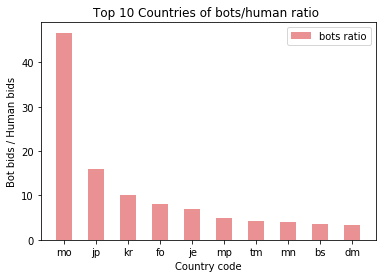

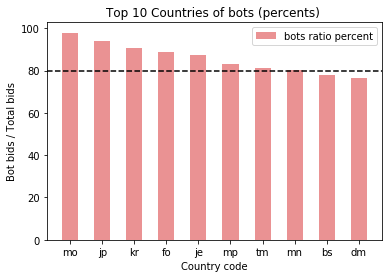

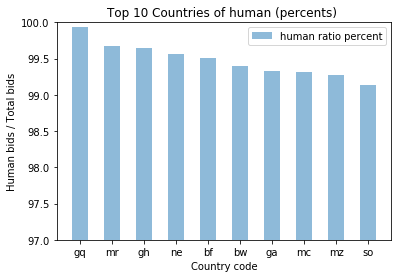

In [14]:
top = 10
country_perc['bots_ratio'] = country_perc['bots'] / country_perc['humans']
country_perc.head(10)

gr = country_perc.nlargest(top, 'bots_ratio')
width = 0.5
ind = [i for i in range(top)]
plt.figure()
plt.bar(ind,gr['bots_ratio'], width,label='bots ratio',color = 'tab:red',alpha=0.5)
plt.xticks(ind,gr['country'])
plt.title('Top ' + str(top) + ' Countries of bots/human ratio ')
plt.ylabel('Bot bids / Human bids')
plt.xlabel('Country code')
plt.legend()


country_perc['sum'] = country_perc['humans'] + country_perc['bots']
country_perc['bots_ratio_per'] = country_perc['bots'] / country_perc['sum']
country_perc['bots_ratio_per'] = country_perc['bots_ratio_per'].multiply(100)


gr = country_perc.nlargest(top, 'bots_ratio_per')
width = 0.5
ind = [i for i in range(top)]
plt.figure()
plt.bar(ind,gr['bots_ratio_per'], width,label='bots ratio percent',color = 'tab:red',alpha=0.5)
plt.xticks(ind,gr['country'])
plt.title('Top ' + str(top) + ' Countries of bots (percents) ')
plt.ylabel('Bot bids / Total bids')
plt.xlabel('Country code')
plt.legend()
# plt.ylim([75,100])
plt.axhline(y=80,linestyle='--',color='k')

country_perc['human_ratio_per'] = country_perc['humans'] / country_perc['sum']
country_perc['human_ratio_per'] = country_perc['human_ratio_per'].multiply(100)


gr = country_perc.nlargest(top, 'human_ratio_per')
width = 0.5
ind = [i for i in range(top)]
plt.figure()
plt.bar(ind,gr['human_ratio_per'], width,label='human ratio percent',color = 'tab:blue',alpha=0.5)
plt.xticks(ind,gr['country'])
plt.title('Top ' + str(top) + ' Countries of human (percents) ')
plt.ylabel('Human bids / Total bids')
plt.xlabel('Country code')
plt.legend()
plt.ylim([97,100])

# 2. Data Preprocessing

In [15]:
bid = pd.merge(train, bids, on='bidder_id', how='left')

## 2.1 Data Cleaning

### 2.1.1 Checking Missing Values

In [16]:
pd.isnull(bid).sum()

bidder_id             0
payment_account       0
address               0
outcome               0
bid_id               29
auction              29
merchandise          29
device               29
time                 29
country            2730
ip                   29
url                  29
dtype: int64

### 2.1.2 Check for bidder without bids

In [17]:
nobids_train = bid[pd.isnull(bid['bid_id'])]['bidder_id'].unique()
print("amout of bidders without bids",len(nobids_train))


amout of bidders without bids 29


### 2.1.3 Drop Bidders without bids

In [18]:
bid = bid[~bid['bidder_id'].isin(nobids_train)]

In [19]:
pd.isnull(bid).sum()

bidder_id             0
payment_account       0
address               0
outcome               0
bid_id                0
auction               0
merchandise           0
device                0
time                  0
country            2701
ip                    0
url                   0
dtype: int64

In [20]:
count_miss_ratio = pd.isnull(bid['country']).sum()/len(bid)*100
print(f" %0.2f %% observations missing country entry." %
      float(count_miss_ratio))
print()

 0.09 % observations missing country entry.



In [21]:
bid = bid.dropna()
pd.isnull(bid).any()


bidder_id          False
payment_account    False
address            False
outcome            False
bid_id             False
auction            False
merchandise        False
device             False
time               False
country            False
ip                 False
url                False
dtype: bool

## 2.2 Data Embedding & Representation

### 2.2.1 Representing Address and Payment Accounts with Bins

In [22]:
### Strip last 5 digits from payment__account and address
temp_train = train
temp_train.address = temp_train.address.apply(lambda x: x[:-5])
temp_train.payment_account = temp_train.payment_account.apply(lambda x: x[:-5])

## DO THE SAME FOR TEST
temp_test = test
temp_test.address = temp_test.address.apply(lambda x: x[:-5])
temp_test.payment_account = temp_test.payment_account.apply(lambda x: x[:-5])

## Create Feature - is payment account and address are equal
temp_train['payment_account_prefix_same_as_address_prefix'] = temp_train['address']==temp_train['payment_account']
temp_test['payment_account_prefix_same_as_address_prefix'] = temp_test['address']==temp_test['payment_account']

## Create Feature from Address - 
## Convert Rare and infrequent addresses to bins 
## Create One-Hot Encoding of the Rest of the Addresses
temp = temp_train[['bidder_id', 'address']].groupby('address').size().reset_index().sort_values(0, ascending=False)
temp = 	temp.rename(columns = {0:'address_count'})
infrequent_addresses = temp[temp.address_count >= 2][temp.address_count < 6].address.values
rare_addresses = temp[temp.address_count < 2].address.values
temp_train['address'].loc[temp_train.address.isin(rare_addresses)] = 'rare_address'
temp_train['address'].loc[temp_train.address.isin(infrequent_addresses)] = 'infrequent_address'
temp = pd.get_dummies(temp_train[['address']])
temp_train = pd.concat([temp_train, temp], axis=1)
###-------------
temp2 = temp_test[['bidder_id', 'address']].groupby('address').size().reset_index().sort_values(0, ascending=False)
temp2 = temp2.rename(columns = {0:'address_count'})
infrequent_addresses2 = temp2[temp2.address_count >= 2][temp2.address_count < 6].address.values
rare_addresses2= temp2[temp2.address_count < 2].address.values
temp_test['address'].loc[temp_test.address.isin(rare_addresses2)] = 'rare_address'
temp_test['address'].loc[temp_test.address.isin(infrequent_addresses2)] = 'infrequent_address'
temp2 = pd.get_dummies(temp_test[['address']])
temp_test = pd.concat([temp_test, temp2], axis=1)

/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [23]:
## Create Feature from Payment Accounts - 
## Convert Rare and infrequent Payment Accounts to bins 
## Create One-Hot Encoding of the Rest of the Payment Accounts
temp = temp_train[['bidder_id', 'payment_account']].groupby('payment_account').size().reset_index().sort_values(0, ascending=False)
temp = temp.rename(columns = {0:'payment_account_count'})
temp2 = temp_test[['bidder_id', 'payment_account']].groupby('payment_account').size().reset_index().sort_values(0, ascending=False)
temp2 = temp2.rename(columns = {0:'payment_account_count'})

infrequent_payment_account = temp[temp.payment_account_count >= 2][temp.payment_account_count < 6].payment_account.values
rare_payment_account = temp[temp.payment_account_count < 2].payment_account.values
temp_train['payment_account'].loc[temp_train.payment_account.isin(rare_payment_account)] = 'rare_account'
temp_train['payment_account'].loc[temp_train.payment_account.isin(infrequent_payment_account)] = 'infrequent_account'	
temp =	pd.get_dummies(temp_train[['payment_account']])
temp_train = pd.concat([temp_train, temp], axis=1)

infrequent_payment_account2 = temp2[temp2.payment_account_count >= 2][temp2.payment_account_count < 6].payment_account.values
rare_payment_account2 = temp2[temp2.payment_account_count < 2].payment_account.values
temp_test['payment_account'].loc[temp_test.payment_account.isin(rare_payment_account2)] = 'rare_account'
temp_test['payment_account'].loc[temp_test.payment_account.isin(infrequent_payment_account2)] = 'infrequent_account'	
temp2 =	pd.get_dummies(temp_test[['payment_account']])
temp_test = pd.concat([temp_test, temp2], axis=1)



/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


### 2.2.2 One-Hot Encoding Merchandise Features - Categorical Information

In [24]:
data_train =pd.merge(temp_train,bids,on='bidder_id', how='left') 
data_test = pd.merge(temp_test,bids,on='bidder_id', how='left')

In [25]:
print(data_train.merchandise.value_counts())
print(data_test.merchandise.value_counts())

sporting goods      1169724
mobile               597488
jewelry              592735
home goods           407957
office equipment     168638
furniture             87807
computers             21400
books and music       15242
auto parts             9757
clothing                476
Name: merchandise, dtype: int64
mobile              1529099
jewelry             1309323
home goods           816277
sporting goods       685483
office equipment     121200
computers             59684
books and music       36699
clothing              15971
furniture             11374
Name: merchandise, dtype: int64


In [26]:
a = data_train.groupby('bidder_id').first().reset_index()
b = pd.get_dummies(a['merchandise'], columns='merchandise')
data_train = pd.concat([bid, b], axis=1)


a = data_test.groupby('bidder_id').first().reset_index()
b = pd.get_dummies(a['merchandise'], columns='merchandise')
data_test= pd.concat([data_test, b], axis=1)


In [27]:
data_test.shape

(4585180, 71)

# 3. Time Series Analysis and Processing

In [28]:
parts_num = 10
test_path = './Data-Science/Data/test.csv'
train_path = './Data-Science/Data/train.csv'

bids = pd.read_csv('./Data-Science/Data/split_bids/bids_part_0.csv')
bids = bids.drop(columns=['Unnamed: 0'])
for i in range(1,parts_num):
  bids_part = pd.read_csv('./Data-Science/Data/split_bids/bids_part_'+ str(i)+ '.csv')
  bids_part = bids_part.drop(columns=['Unnamed: 0'])
  bids = bids.append(bids_part, ignore_index=True)

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

Joining train data with bid data so that we can use the "outcome" column

In [29]:
data = pd.merge(bids, train, on='bidder_id', how='left')

## 3.1 Bid Time Analysis

Let's do some exploration

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a2901b750>]],
      dtype=object)

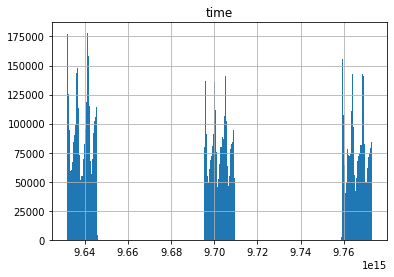

In [30]:
data.hist(column='time', bins=300)

Looks like 3 separate time periods. Let's expolore each individually.

In [31]:
period_1 = data[data.time < 9.66e15]
period_2 = data[data.time < 9.74e15][data.time > 9.66e15]
period_3 = data[data.time > 9.74e15]

/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Let's look at a histogram of the human bids vs the bot bids int the first period:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a7102a590>]],
      dtype=object)

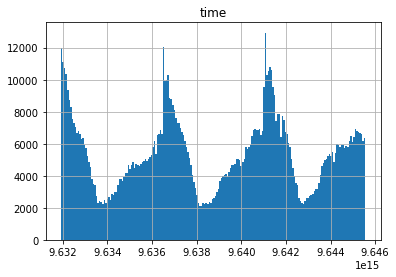

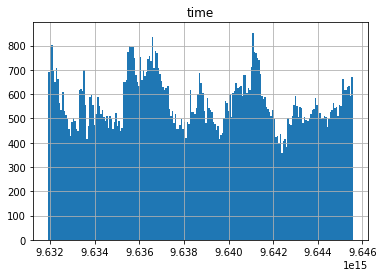

In [32]:
period_1_humans = period_1[period_1.outcome == 0]
period_1_bots = period_1[period_1.outcome == 1]
period_1_humans.hist(column='time', bins=200)
period_1_bots.hist(column='time', bins=200)

Interesting. Now let's look at period 2:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1f12f210>]],
      dtype=object)

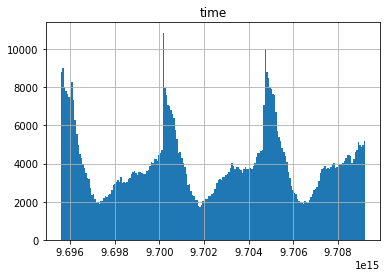

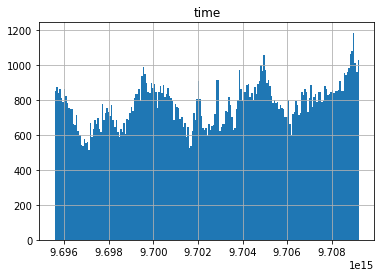

In [33]:
period_2_humans = period_2[period_2.outcome == 0]
period_2_bots = period_2[period_2.outcome == 1]
period_2_humans.hist(column='time', bins=200)
period_2_bots.hist(column='time', bins=200)

And period 3:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a713a9550>]],
      dtype=object)

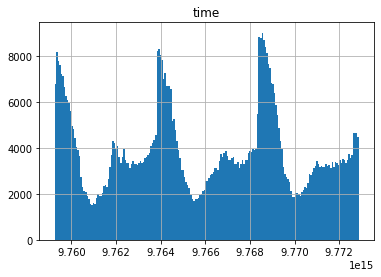

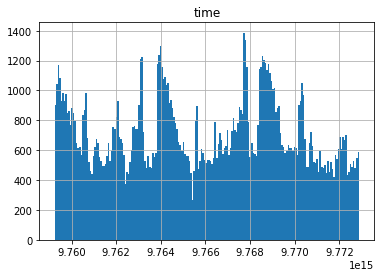

In [34]:
period_3_humans = period_3[period_3.outcome == 0]
period_3_bots = period_3[period_3.outcome == 1]
period_3_humans.hist(column='time', bins=200)
period_3_bots.hist(column='time', bins=200)

Conclusions:


1.   Human bid times are much more structured and periodical.
2.   Bot bid times are more sphoradic and noisy.
3.   Each of the 3 periods seems to have 3 distinct peaks in the human bids. We will conclude this is because each period represents 3 days, and the peaks correspond to some evening time, when people have more time to do online bidding.



## 3.2 Time Stamp Processing

Following our conclusions from the previous sections, we've decided to assign synthetic timestamps to our data, in a way that preserves order and scale and would assign the human bids peaks to 7pm. We've placed the 3 periods a week apart from each other to avoid interference.

In [35]:
range_start_1 = 1543863600
range_end_1 = 1544122800
max_ts_1 = max(period_1.time)
min_ts_1 = min(period_1.time)
period_1.loc[:,'new_ts'] = range_start_1 + ((period_1.time - min_ts_1) / (max_ts_1 - min_ts_1)) * (range_end_1 - range_start_1)
period_1.loc[:,'new_ts'] = pd.to_datetime(period_1.new_ts, unit='s')
period_1.loc[:,'hour_of_day'] = period_1.new_ts.dt.hour

/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:376: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Let's look at a histogram of the hours we've assigned to this period's data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a71952750>]],
      dtype=object)

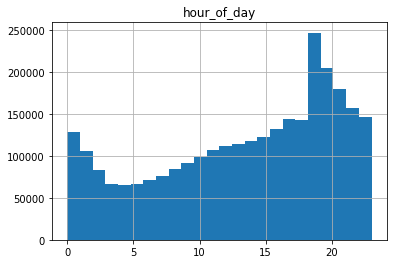

In [36]:
period_1.hist(column='hour_of_day', bins=24)

This looks good. Let's repeat for period 2:

In [37]:
range_start_2 = 1544468400
range_end_2 = 1544727600
max_ts_2 = max(period_2.time)
min_ts_2 = min(period_2.time)
period_2.loc[:,'new_ts'] = range_start_2 + ((period_2.time - min_ts_2) / (max_ts_2 - min_ts_2)) * (range_end_2 - range_start_2)
period_2.loc[:,'new_ts'] = pd.to_datetime(period_2.new_ts, unit='s')
period_2.loc[:,'hour_of_day'] = period_2.new_ts.dt.hour

Here's preoid 2's histogram:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a87fbd850>]],
      dtype=object)

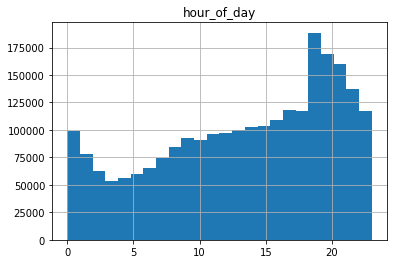

In [38]:
period_2.hist(column='hour_of_day', bins=24)

And period 3:

In [39]:
range_start_3 = 1545073200
range_end_3 = 1545332400
max_ts_3 = max(period_3.time)
min_ts_3 = min(period_3.time)
period_3.loc[:,'new_ts'] = range_start_3 + ((period_3.time - min_ts_3) / (max_ts_3 - min_ts_3)) * (range_end_3 - range_start_3)
period_3.loc[:,'new_ts'] = pd.to_datetime(period_3.new_ts, unit='s')
period_3.loc[:,'hour_of_day'] = period_3.new_ts.dt.hour

In [40]:
units_per_day = (max_ts_3 - min_ts_3) / 3
units_per_hour = units_per_day / 24
units_per_minute = units_per_hour / 60
units_per_second = units_per_minute / 60
print(f"Each second corresponds to {units_per_second} of original 'time' units")

Each second corresponds to 52631375.8934375 of original 'time' units


With it's histogram:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a35cf0a90>]],
      dtype=object)

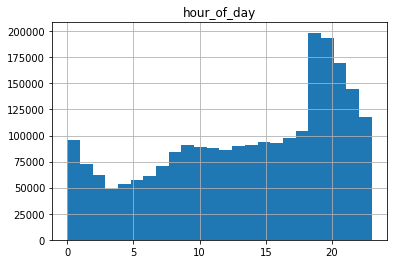

In [41]:
period_3.hist(column='hour_of_day', bins=24)

We have now successfully generated 2 features that will prove critical moving forward: "new_ts" and "hour_of_day". Many important features will rely on them.

## 3.3 Time Based Feature Analsysis

Our time-based features will be using our generated new_ts and hour_of_day columns. The features that will be using these columns will quantify:


1.   Number and fraction (ratio) of bids in the first and last 10% of the auction.
2.   Time difference between bids per auction.
3.   Change times of ip, device, country.
4.   Ratio of bids in four 6-hour windows of hour_of_day.
5.   Bidding velocity - number of bids within rolling window of time.



In [42]:
new_data = pd.concat([period_1, period_2, period_3])

# 4. Feature Engineering

Some Feature Engineering may take along of time. Therefore we save the intermediate results of each part.
The results can be loaded into dataframes in order to skip different parts.

In [43]:
parts_num = 10
test_path = './Data-Science/Data/test.csv'
train_path = './Data-Science/Data/train.csv'

bids = pd.read_csv('./Data-Science/Data/split_bids/bids_part_0.csv')
bids = bids.drop(columns=['Unnamed: 0'])
for i in range(1,parts_num):
  bids_part = pd.read_csv('./Data-Science/Data/split_bids/bids_part_'+ str(i)+ '.csv')
  bids_part = bids_part.drop(columns=['Unnamed: 0'])
  bids = bids.append(bids_part, ignore_index=True)

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)

In [44]:
### Strip last 5 digits from payment__account and address
temp_train = train
temp_train.address = temp_train.address.apply(lambda x: x[:-5])
temp_train.payment_account = temp_train.payment_account.apply(lambda x: x[:-5])

## DO THE SAME FOR TEST
temp_test = test
temp_test.address = temp_test.address.apply(lambda x: x[:-5])
temp_test.payment_account = temp_test.payment_account.apply(lambda x: x[:-5])

## Create Feature - is payment account and address are equal
temp_train['payment_account_prefix_same_as_address_prefix'] = temp_train['address']==temp_train['payment_account']
temp_test['payment_account_prefix_same_as_address_prefix'] = temp_test['address']==temp_test['payment_account']

## Create Feature from Address - 
## Convert Rare and infrequent addresses to bins 
## Create One-Hot Encoding of the Rest of the Addresses
temp = temp_train[['bidder_id', 'address']].groupby('address').size().reset_index().sort_values(0, ascending=False)
temp = 	temp.rename(columns = {0:'address_count'})
infrequent_addresses = temp[temp.address_count >= 2][temp.address_count < 6].address.values
rare_addresses = temp[temp.address_count < 2].address.values
temp_train['address'].loc[temp_train.address.isin(rare_addresses)] = 'rare_address'
temp_train['address'].loc[temp_train.address.isin(infrequent_addresses)] = 'infrequent_address'
temp = pd.get_dummies(temp_train[['address']])
temp_train = pd.concat([temp_train, temp], axis=1)
###-------------
temp2 = temp_test[['bidder_id', 'address']].groupby('address').size().reset_index().sort_values(0, ascending=False)
temp2 = temp2.rename(columns = {0:'address_count'})
infrequent_addresses2 = temp2[temp2.address_count >= 2][temp2.address_count < 6].address.values
rare_addresses2= temp2[temp2.address_count < 2].address.values
temp_test['address'].loc[temp_test.address.isin(rare_addresses2)] = 'rare_address'
temp_test['address'].loc[temp_test.address.isin(infrequent_addresses2)] = 'infrequent_address'
temp2 = pd.get_dummies(temp_test[['address']])
temp_test = pd.concat([temp_test, temp2], axis=1)

/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


In [45]:
## Create Feature from Payment Accounts - 
## Convert Rare and infrequent Payment Accounts to bins 
## Create One-Hot Encoding of the Rest of the Payment Accounts
temp = temp_train[['bidder_id', 'payment_account']].groupby('payment_account').size().reset_index().sort_values(0, ascending=False)
temp = temp.rename(columns = {0:'payment_account_count'})
temp2 = temp_test[['bidder_id', 'payment_account']].groupby('payment_account').size().reset_index().sort_values(0, ascending=False)
temp2 = temp2.rename(columns = {0:'payment_account_count'})

infrequent_payment_account = temp[temp.payment_account_count >= 2][temp.payment_account_count < 6].payment_account.values
rare_payment_account = temp[temp.payment_account_count < 2].payment_account.values
temp_train['payment_account'].loc[temp_train.payment_account.isin(rare_payment_account)] = 'rare_account'
temp_train['payment_account'].loc[temp_train.payment_account.isin(infrequent_payment_account)] = 'infrequent_account'	
temp =	pd.get_dummies(temp_train[['payment_account']])
temp_train = pd.concat([temp_train, temp], axis=1)

infrequent_payment_account2 = temp2[temp2.payment_account_count >= 2][temp2.payment_account_count < 6].payment_account.values
rare_payment_account2 = temp2[temp2.payment_account_count < 2].payment_account.values
temp_test['payment_account'].loc[temp_test.payment_account.isin(rare_payment_account2)] = 'rare_account'
temp_test['payment_account'].loc[temp_test.payment_account.isin(infrequent_payment_account2)] = 'infrequent_account'	
temp2 =	pd.get_dummies(temp_test[['payment_account']])
temp_test = pd.concat([temp_test, temp2], axis=1)


/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()


**Merge Train and Bids Data to Start Feature Extraction**

In [46]:
bid = pd.merge(temp_train, bids, on='bidder_id', how='left')
data_test = pd.merge(temp_test,bids,on='bidder_id', how='left')
data = bid
data.head(10)

,bidder_id,payment_account,address,outcome,payment_account_prefix_same_as_address_prefix,address_2367520c8d94e70f47f4e28e72004ef9,address_2a96c3ce94b3be921e0296097b88b56a,address_3a0b8057e5a900d872232c62a7f4c120,address_3a7e6a32b24aeab0688e91a41f3188e2,address_4d90f2e709f1fc0810e5aef472dd3935,...,payment_account_infrequent_account,payment_account_rare_account,bid_id,auction,merchandise,device,time,country,ip,url
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,0,0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3
1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,0,0,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3
2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,0,0,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3
3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,0,0,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3
4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,0,0,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3
5,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,0,0,666164.0,1m5t8,home goods,phone35,9.763163e+15,ke,192.145.217.243,vasstdc27m7nks3
6,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,0,0,700546.0,0xo1d,home goods,phone4,9.763386e+15,et,223.233.166.93,vasstdc27m7nks3
7,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,0,0,926676.0,pfl78,home goods,phone195,9.764267e+15,ke,190.63.186.68,vasstdc27m7nks3
8,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,0,0,960606.0,xs8rq,home goods,phone4,9.764392e+15,ke,17.72.96.225,vasstdc27m7nks3
9,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,0,0,1023806.0,wzwhk,home goods,phone79,9.764658e+15,ng,209.80.85.101,vasstdc27m7nks3


In [47]:
## Create One-Hot Encoding for Merchandise
a = data.groupby('bidder_id').first().reset_index()
b = pd.get_dummies(a['merchandise'], columns='merchandise')
data = pd.concat([data, b], axis=1)
data.head()

a = data_test.groupby('bidder_id').first().reset_index()
b = pd.get_dummies(a['merchandise'], columns='merchandise')
data_test= pd.concat([data_test, b], axis=1)

## 4.1  **Basic Count Features**

5.   Bids Count  Per User
6.   Auction Count Per User
7.   Merchandise Count Per User
8.   Device Count Per User
9.   Country Count Per User
10.   IP Count Per User
11.   URL Count Per User
12.   Average Number of Bid Per Auction
13.  Average Number of Bids Per Device
14.  Average Number of Bids Per URL
15.  Average Number of Bids Per Country


In [48]:
count_features =data.groupby(['bidder_id']).nunique()
count_features_test = data_test.groupby(['bidder_id']).nunique()
count_features.head()

,bidder_id,payment_account,address,outcome,payment_account_prefix_same_as_address_prefix,address_2367520c8d94e70f47f4e28e72004ef9,address_2a96c3ce94b3be921e0296097b88b56a,address_3a0b8057e5a900d872232c62a7f4c120,address_3a7e6a32b24aeab0688e91a41f3188e2,address_4d90f2e709f1fc0810e5aef472dd3935,...,auto parts,books and music,clothing,computers,furniture,home goods,jewelry,mobile,office equipment,sporting goods
bidder_id,,,,,,,,,,,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
00a0517965f18610417ee784a05f494d4dw6e,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
01067975436d123f717ee5aba0dd4bbfa0937,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [49]:
##Count Per User
## 1.Bids Count
## 2. Auction Count
## 3. Merchandise Count
## 4. Device Count
## 5. Country Count
## 6. IP Count
## 7. URL Count

count_features=count_features.rename(columns={'bid_id': "bids_count", 'auction': 'auction_count','merchandise':'merchandise_count','device': "device_count",'country':'country_count','ip':'ip_count','url':'urls_count'})
count_features_test=count_features_test.rename(columns={'bid_id': "bids_count", 'auction': 'auction_count','merchandise':'merchandise_count','device': "device_count",'country':'country_count','ip':'ip_count','url':'urls_count'})

### Average Statistics Per User
## 1. Average Number Of Bids Per Auction
## 2. Average Bids Per Device
## 3. Average Number of Bids Per URL
## 4. Average Number of Bids Per Country

count_features['average_bids_per_auction'] = count_features.apply(lambda row:row['bids_count']/row['auction_count'] if row['auction_count']>0 else 0, axis=1) 
count_features['average_bids_per_url'] = count_features.apply(lambda row:row['bids_count']/row['urls_count'] if row['urls_count']>0 else 0, axis=1) 
count_features['average_bids_per_device'] = count_features.apply(lambda row:row['bids_count']/row['device_count'] if row['device_count']>0 else 0, axis=1) 
count_features['average_bids_per_country'] = count_features.apply(lambda row:row['bids_count']/row['country_count'] if row['country_count']>0 else 0, axis=1) 
count_features_test['average_bids_per_auction'] = count_features_test.apply(lambda row:row['bids_count']/row['auction_count'] if row['auction_count']>0 else 0, axis=1) 
count_features_test['average_bids_per_url'] = count_features_test.apply(lambda row:row['bids_count']/row['urls_count'] if row['urls_count']>0 else 0, axis=1) 
count_features_test['average_bids_per_device'] = count_features_test.apply(lambda row:row['bids_count']/row['device_count'] if row['device_count']>0 else 0, axis=1) 
count_features_test['average_bids_per_country'] = count_features_test.apply(lambda row:row['bids_count']/row['country_count'] if row['country_count']>0 else 0, axis=1) 
count_features.head()


,bidder_id,payment_account,address,outcome,payment_account_prefix_same_as_address_prefix,address_2367520c8d94e70f47f4e28e72004ef9,address_2a96c3ce94b3be921e0296097b88b56a,address_3a0b8057e5a900d872232c62a7f4c120,address_3a7e6a32b24aeab0688e91a41f3188e2,address_4d90f2e709f1fc0810e5aef472dd3935,...,furniture,home goods,jewelry,mobile,office equipment,sporting goods,average_bids_per_auction,average_bids_per_url,average_bids_per_device,average_bids_per_country
bidder_id,,,,,,,,,,,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1.000000,1.000000,1.000000,1.000000
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1.000000,1.000000,1.000000,1.000000
00a0517965f18610417ee784a05f494d4dw6e,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1.905405,1.678571,2.104478,8.812500
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1.000000,3.000000,1.000000,1.500000
01067975436d123f717ee5aba0dd4bbfa0937,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,31.941176,135.750000,3.290909,7.647887


In [50]:
count_features = count_features[["bids_count",'auction_count','merchandise_count',"device_count",'country_count','ip_count','urls_count','average_bids_per_auction','average_bids_per_device','average_bids_per_url','average_bids_per_country']]
count_features_test=count_features_test[["bids_count",'auction_count','merchandise_count',"device_count",'country_count','ip_count','urls_count','average_bids_per_auction','average_bids_per_device','average_bids_per_url','average_bids_per_country']]
count_features.head()

,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country
bidder_id,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,1,1,1,1,1,1,1,1.000000,1.000000,1.000000,1.000000
0030a2dd87ad2733e0873062e4f83954mkj86,1,1,1,1,1,1,1,1.000000,1.000000,1.000000,1.000000
00a0517965f18610417ee784a05f494d4dw6e,141,74,1,67,16,103,84,1.905405,2.104478,1.678571,8.812500
00cc97158e6f4cb8eac3c0075918b7ffi5k8o,3,3,1,3,2,3,1,1.000000,1.000000,3.000000,1.500000
01067975436d123f717ee5aba0dd4bbfa0937,543,17,1,165,71,398,4,31.941176,3.290909,135.750000,7.647887


In [51]:
data = pd.merge(data, count_features, on='bidder_id', how='left')
data_test = pd.merge(data_test, count_features_test, on='bidder_id', how='left')
X= pd.merge(temp_train, count_features, on='bidder_id', how='left')
X_test = pd.merge(temp_test, count_features_test, on='bidder_id', how='left')
data.head()

,bidder_id,payment_account,address,outcome,payment_account_prefix_same_as_address_prefix,address_2367520c8d94e70f47f4e28e72004ef9,address_2a96c3ce94b3be921e0296097b88b56a,address_3a0b8057e5a900d872232c62a7f4c120,address_3a7e6a32b24aeab0688e91a41f3188e2,address_4d90f2e709f1fc0810e5aef472dd3935,...,auction_count,merchandise_count,device_count,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,18,1,14,6,20,1,1.333333,1.714286,24.0,4.0
1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,18,1,14,6,20,1,1.333333,1.714286,24.0,4.0
2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,18,1,14,6,20,1,1.333333,1.714286,24.0,4.0
3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,18,1,14,6,20,1,1.333333,1.714286,24.0,4.0
4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,18,1,14,6,20,1,1.333333,1.714286,24.0,4.0


In [52]:
X = X[['bidder_id','outcome','payment_account_prefix_same_as_address_prefix','address_infrequent_address','address_rare_address','payment_account_infrequent_account','payment_account_rare_account','bids_count','auction_count','merchandise_count','device_count','country_count','ip_count','urls_count','average_bids_per_auction','average_bids_per_device','average_bids_per_url','average_bids_per_country']]
X_test = X_test[['bidder_id','payment_account_prefix_same_as_address_prefix','address_infrequent_address','address_rare_address','payment_account_infrequent_account','payment_account_rare_account','bids_count','auction_count','merchandise_count','device_count','country_count','ip_count','urls_count','average_bids_per_auction','average_bids_per_device','average_bids_per_url','average_bids_per_country']]


## 4.2 **Suspicious Activity Features** -Fraudsters Features


16.   Average Number of IP Per Auction Per Bidder
17.   Fraction of Bids from Rare IP
18.   IP Used in the Past by bot flag
19.   Fraction of IP used by bots in the past
20.   Device  Used in the Past by bot flag
21.   Fraction of devices used by bots in the past
22.   Country Used in the Past by bot flag
23.   Fraction of Countrie used in the past by a bot
24.   URL used in the past by a bot flag
25.  Fraction of URLs used in the past by a bot flag





In [53]:
## IP Features 
##--------train -------
## 1. Average Number of IPs Per Auction For Each Bidder
a = data[['bidder_id', 'auction', 'ip']].groupby(['bidder_id','auction', 'ip']).size().reset_index()
a= a.rename(columns = {0:'bids_per_auction_per_ip'}).sort_values('bids_per_auction_per_ip',ascending=False)
b = a.groupby(['bidder_id']).bids_per_auction_per_ip.mean().reset_index()
b= b.rename(columns = {'bids_per_auction_per_ip':'bids_per_auction_per_ip_mean'}).sort_values('bids_per_auction_per_ip_mean',ascending=False)
b['bids_per_auction_per_ip_mean']=b['bids_per_auction_per_ip_mean'].fillna(0.0)
X = pd.merge(X, b[['bidder_id','bids_per_auction_per_ip_mean' ]], on='bidder_id', how='left')	
X['bids_per_auction_per_ip_mean']=X['bids_per_auction_per_ip_mean'].fillna(0.0)

##--------test---------
a = data_test[['bidder_id', 'auction', 'ip']].groupby(['bidder_id','auction', 'ip']).size().reset_index()
a= a.rename(columns = {0:'bids_per_auction_per_ip'}).sort_values('bids_per_auction_per_ip',ascending=False)
b = a.groupby(['bidder_id']).bids_per_auction_per_ip.mean().reset_index()
b= b.rename(columns = {'bids_per_auction_per_ip':'bids_per_auction_per_ip_mean'}).sort_values('bids_per_auction_per_ip_mean',ascending=False)
X_test = pd.merge(X_test, b[['bidder_id','bids_per_auction_per_ip_mean' ]], on='bidder_id', how='left')	
X_test['bids_per_auction_per_ip_mean']=X_test['bids_per_auction_per_ip_mean'].fillna(0.0)


In [54]:
## 2. Fraction of Bids Placed by user from Rare IP (rare IP is an IP used only once)
## Calculated using Panda pivot table
##------train-------
a = data.groupby('ip').bidder_id.nunique().reset_index()
ip_many_users = a[a.bidder_id > 1].ip.values
ip_only_one_user = a[a.bidder_id == 1].ip.values
data['ip2'] = np.nan
data.loc[data.ip.isin(ip_many_users), ['ip2']] = 'many'
data.loc[data.ip.isin(ip_only_one_user), ['ip2']] = 'only_one_user'
b= data.groupby(['bidder_id','ip2']).size().reset_index()
b = b.rename(columns = {0: 'counts'})
c = b.pivot('bidder_id', 'ip2', 'counts').reset_index()
c['ip_only_one_user_counts'] = 1*c['only_one_user']
c.iloc[:,1:] = c.iloc[:,1:].div(c.iloc[:,1:].sum(axis=1), axis=0)
c=c.drop('many',1)
c=c.drop('only_one_user',1)
c['ip_only_one_user_counts'].fillna(0.0,inplace=True)
X = pd.merge(X, c[['bidder_id','ip_only_one_user_counts']], on='bidder_id', how='left')
X['ip_only_one_user_counts'].fillna(0.0,inplace=True)

In [55]:
##------test-------
a = data_test.groupby('ip').bidder_id.nunique().reset_index()
ip_many_users = a[a.bidder_id > 1].ip.values
ip_only_one_user = a[a.bidder_id == 1].ip.values
data_test['ip2'] = np.nan
data_test.loc[data_test.ip.isin(ip_many_users), ['ip2']] = 'many'
data_test.loc[data_test.ip.isin(ip_only_one_user), ['ip2']] = 'only_one_user'
b= data_test.groupby(['bidder_id','ip2']).size().reset_index()
b = b.rename(columns = {0: 'counts'})
c = b.pivot('bidder_id', 'ip2', 'counts').reset_index()
c['ip_only_one_user_counts'] = 1*c['only_one_user']
c.iloc[:,1:] = c.iloc[:,1:].div(c.iloc[:,1:].sum(axis=1), axis=0)
c=c.drop('many',1)
c=c.drop('only_one_user',1)
c['ip_only_one_user_counts'].fillna(0.0,inplace=True)
X_test = pd.merge(X_test, c[['bidder_id','ip_only_one_user_counts']], on='bidder_id', how='left')
X_test['ip_only_one_user_counts'].fillna(0.0,inplace=True)

In [56]:
## 3. Fraudulant IP Rules -
## 3.1 Boolean Feature - Bidder use an IP used in the past by a Bot
## 3.2 Fraction of IP used that were used in a past by a bot
##----------Train-----------
data['outcome'] = 1.0*(data['outcome'] == 1)
b = data.groupby(['ip', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('ip').outcome.sum().reset_index()		
c['nbots_on_ip'] = c.outcome
data = pd.merge(data, c[['ip', 'nbots_on_ip']], on='ip', how='left')
data['on_ip_that_has_a_bot'] = 1*((data['nbots_on_ip'] - data['outcome']) >= 1)
b = data.groupby(['bidder_id', 'ip']).on_ip_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_ip_that_has_a_bot.mean().reset_index()
X = pd.merge(X, c[['bidder_id', 'on_ip_that_has_a_bot']], on='bidder_id', how='left')
X['on_ip_that_has_a_bot_mean'] = X['on_ip_that_has_a_bot'].fillna(0)
X['on_ip_that_has_a_bot'] = 1*(X['on_ip_that_has_a_bot'].fillna(0) > 0)

X.head()
print(X.shape)

(2013, 22)


In [57]:
data.head()

,bidder_id,payment_account,address,outcome,payment_account_prefix_same_as_address_prefix,address_2367520c8d94e70f47f4e28e72004ef9,address_2a96c3ce94b3be921e0296097b88b56a,address_3a0b8057e5a900d872232c62a7f4c120,address_3a7e6a32b24aeab0688e91a41f3188e2,address_4d90f2e709f1fc0810e5aef472dd3935,...,country_count,ip_count,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country,ip2,nbots_on_ip,on_ip_that_has_a_bot
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,6,20,1,1.333333,1.714286,24.0,4.0,many,0.0,0
1,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,6,20,1,1.333333,1.714286,24.0,4.0,many,9.0,1
2,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,6,20,1,1.333333,1.714286,24.0,4.0,only_one_user,0.0,0
3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,6,20,1,1.333333,1.714286,24.0,4.0,only_one_user,0.0,0
4,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228,a3d2de7675556553a5f08e4c88d2c228,0.0,True,0,0,0,0,0,...,6,20,1,1.333333,1.714286,24.0,4.0,only_one_user,0.0,0


In [58]:
data = data[['bidder_id', 'payment_account', 'address', 'outcome', 'payment_account_prefix_same_as_address_prefix', 'address_infrequent_address', 'address_rare_address', 'payment_account_infrequent_account', 'payment_account_rare_account', 'bid_id', 'auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url', 'auto parts', 'books and music', 'clothing', 'computers', 'furniture', 'home goods', 'jewelry', 'mobile', 'office equipment', 'sporting goods', 'bids_count', 'auction_count', 'merchandise_count', 'device_count', 'country_count', 'ip_count', 'urls_count', 'average_bids_per_auction', 'average_bids_per_device', 'average_bids_per_url', 'average_bids_per_country', 'ip2', 'nbots_on_ip', 'on_ip_that_has_a_bot']]
data_test = data_test[['bidder_id', 'payment_account', 'address', 'payment_account_prefix_same_as_address_prefix','address_infrequent_address', 'address_rare_address',  'payment_account_infrequent_account', 'payment_account_rare_account', 'bid_id', 'auction', 'merchandise', 'device', 'time', 'country', 'ip', 'url', 'books and music', 'clothing', 'computers', 'furniture', 'home goods', 'jewelry', 'mobile', 'office equipment', 'sporting goods', 'bids_count', 'auction_count', 'merchandise_count', 'device_count', 'country_count', 'ip_count', 'urls_count', 'average_bids_per_auction', 'average_bids_per_device', 'average_bids_per_url', 'average_bids_per_country', 'ip2']]

In [59]:
bots = data[data.outcome==1]
X_test['outcome']=0
data_test['outcome']=0
data_test['auto parts']=0
print(X_test.shape)
data_cols = (list(data.columns.values))
data_test_cols = (list(data_test.columns.values))
missing = [ i for i in data_cols if i not in data_test_cols]

(4700, 20)


In [60]:
print(missing)

['nbots_on_ip', 'on_ip_that_has_a_bot']


In [61]:
bots=bots.drop('nbots_on_ip',1)
bots=bots.drop('on_ip_that_has_a_bot',1)
print(data.shape)
print(data_test.shape)
print(bots.shape)

(3071253, 41)
(4585180, 39)
(412416, 39)


In [62]:
data_test_with_bots = data_test.append(bots,ignore_index=True)
data_test_with_bots=data_test_with_bots.set_index('bidder_id')

/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


In [63]:
data_test_with_bots=data_test_with_bots.reset_index()
data_test_with_bots.head()

,bidder_id,address,address_infrequent_address,address_rare_address,auction,auction_count,auto parts,average_bids_per_auction,average_bids_per_country,average_bids_per_device,...,office equipment,outcome,payment_account,payment_account_infrequent_account,payment_account_prefix_same_as_address_prefix,payment_account_rare_account,sporting goods,time,url,urls_count
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,rare_address,0,1,cl3cf,3,0.0,1.333333,1.333333,2.0,...,0.0,0.0,a3d2de7675556553a5f08e4c88d2c228,0,False,0,0.0,9.633127e+15,8ohccaw6fhyc1gy,3
1,49bb5a3c944b8fc337981cc7a9ccae41u31d7,rare_address,0,1,edggv,3,0.0,1.333333,1.333333,2.0,...,0.0,0.0,a3d2de7675556553a5f08e4c88d2c228,0,False,0,0.0,9.638908e+15,vasstdc27m7nks3,3
2,49bb5a3c944b8fc337981cc7a9ccae41u31d7,rare_address,0,1,jqx39,3,0.0,1.333333,1.333333,2.0,...,0.0,0.0,a3d2de7675556553a5f08e4c88d2c228,0,False,0,0.0,9.698805e+15,jezzg7twk0rqfuw,3
3,49bb5a3c944b8fc337981cc7a9ccae41u31d7,rare_address,0,1,jqx39,3,0.0,1.333333,1.333333,2.0,...,0.0,0.0,a3d2de7675556553a5f08e4c88d2c228,0,False,0,0.0,9.703350e+15,vasstdc27m7nks3,3
4,a921612b85a1494456e74c09393ccb65ylp4y,a3d2de7675556553a5f08e4c88d2c228,0,0,h2nr3,2,0.0,1.500000,1.500000,1.0,...,0.0,0.0,a3d2de7675556553a5f08e4c88d2c228,0,True,0,0.0,9.632413e+15,vasstdc27m7nks3,1


In [64]:
####---------------------test-------------------------------
data_test_with_bots['outcome'] = 1.0*(data_test_with_bots['outcome'] == 1)
b = data_test_with_bots.groupby(['ip', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('ip').outcome.sum().reset_index()		
c['nbots_on_ip'] = c.outcome
data_test_with_bots = pd.merge(data_test_with_bots, c[['ip', 'nbots_on_ip']], on='ip', how='left')
data_test_with_bots['on_ip_that_has_a_bot'] = 1*((data_test_with_bots['nbots_on_ip'] - data_test_with_bots['outcome']) >= 1)
b = data_test_with_bots.groupby(['bidder_id', 'ip']).on_ip_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_ip_that_has_a_bot.mean().reset_index()
X_test = pd.merge(X_test, c[['bidder_id', 'on_ip_that_has_a_bot']], on='bidder_id', how='left')
X_test['on_ip_that_has_a_bot_mean'] = X_test['on_ip_that_has_a_bot'].fillna(0)
X_test['on_ip_that_has_a_bot'] = 1*(X_test['on_ip_that_has_a_bot'].fillna(0) > 0)


In [65]:
X_test.head()

,bidder_id,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,...,urls_count,average_bids_per_auction,average_bids_per_device,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,outcome,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,False,0,1,0,0,4,3,1,2,...,3,1.333333,2.000000,1.333333,1.333333,1.000000,0.000000,0,1,0.500000
1,a921612b85a1494456e74c09393ccb65ylp4y,True,0,0,0,0,3,2,1,3,...,1,1.500000,1.000000,3.000000,1.500000,1.500000,0.500000,0,0,0.000000
2,6b601e72a4d264dab9ace9d7b229b47479v6i,False,0,0,0,1,17,14,1,4,...,2,1.214286,4.250000,8.500000,5.666667,1.133333,0.150000,0,1,0.250000
3,eaf0ed0afc9689779417274b4791726cn5udi,False,1,0,0,0,148,90,1,81,...,80,1.644444,1.827160,1.850000,10.571429,1.072464,0.225131,0,1,0.310078
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,False,0,1,0,0,23,20,1,17,...,1,1.150000,1.352941,23.000000,11.500000,1.000000,0.378378,0,1,0.176471


In [66]:
## 4. Fradudulant Device Features
## 4.1 Boolean Feature -  Bidder use a device used in the past by a Bot
## 4.3 Fraction of DEvices used that were used in the past by a bot
data['outcome'] = 1.0*(data['outcome'] == 1)
b = data.groupby(['device', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('device').outcome.sum().reset_index()		
c['nbots_on_device'] = c.outcome
data = pd.merge(data, c[['device', 'nbots_on_device']], on='device', how='left')
data['on_device_that_has_a_bot'] = 1*((data['nbots_on_device'] - data['outcome']) >= 1)
b = data.groupby(['bidder_id', 'device']).on_device_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_device_that_has_a_bot.mean().reset_index()
X = pd.merge(X, c[['bidder_id', 'on_device_that_has_a_bot']], on='bidder_id', how='left')
X['on_device_that_has_a_bot_mean'] = X['on_device_that_has_a_bot'].fillna(0)
X['on_device_that_has_a_bot'] = 1*(X['on_device_that_has_a_bot'].fillna(0) > 0)
X.head()

##------- TEST----------------------------------------
data_test_with_bots['outcome'] = 1.0*(data_test_with_bots['outcome'] == 1)
b = data_test_with_bots.groupby(['device', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('device').outcome.sum().reset_index()		
c['nbots_on_device'] = c.outcome
data_test_with_bots = pd.merge(data_test_with_bots, c[['device', 'nbots_on_device']], on='device', how='left')
data_test_with_bots['on_device_that_has_a_bot'] = 1*((data_test_with_bots['nbots_on_device'] - data_test_with_bots['outcome']) >= 1)
b = data_test_with_bots.groupby(['bidder_id', 'device']).on_device_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_device_that_has_a_bot.mean().reset_index()
X_test = pd.merge(X_test, c[['bidder_id', 'on_device_that_has_a_bot']], on='bidder_id', how='left')
X_test['on_device_that_has_a_bot_mean'] = X_test['on_device_that_has_a_bot'].fillna(0)
X_test['on_device_that_has_a_bot'] = 1*(X_test['on_device_that_has_a_bot'].fillna(0) > 0)
X_test.head()


,bidder_id,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,...,average_bids_per_device,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,outcome,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,False,0,1,0,0,4,3,1,2,...,2.000000,1.333333,1.333333,1.000000,0.000000,0,1,0.500000,1,1.000000
1,a921612b85a1494456e74c09393ccb65ylp4y,True,0,0,0,0,3,2,1,3,...,1.000000,3.000000,1.500000,1.500000,0.500000,0,0,0.000000,1,1.000000
2,6b601e72a4d264dab9ace9d7b229b47479v6i,False,0,0,0,1,17,14,1,4,...,4.250000,8.500000,5.666667,1.133333,0.150000,0,1,0.250000,1,1.000000
3,eaf0ed0afc9689779417274b4791726cn5udi,False,1,0,0,0,148,90,1,81,...,1.827160,1.850000,10.571429,1.072464,0.225131,0,1,0.310078,1,1.000000
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,False,0,1,0,0,23,20,1,17,...,1.352941,23.000000,11.500000,1.000000,0.378378,0,1,0.176471,1,0.941176


In [67]:
## 5. Fradudulant Country Features
## 4.1 Boolean Feature -  Bidder use a country used in the past by a Bot
## 4.3 Fraction of countrry used that were used in the past by a bot
data['outcome'] = 1.0*(data['outcome'] == 1)
b = data.groupby(['country', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('country').outcome.sum().reset_index()		
c['nbots_on_country'] = c.outcome
data = pd.merge(data, c[['country', 'nbots_on_country']], on='country', how='left')
data['on_country_that_has_a_bot'] = 1*((data['nbots_on_country'] - data['outcome']) >= 1)
b = data.groupby(['bidder_id', 'country']).on_country_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_country_that_has_a_bot.mean().reset_index()
X = pd.merge(X, c[['bidder_id', 'on_country_that_has_a_bot']], on='bidder_id', how='left')
X['on_country_that_has_a_bot_mean'] = X['on_country_that_has_a_bot'].fillna(0)
X['on_country_that_has_a_bot'] = 1*(X['on_country_that_has_a_bot'].fillna(0) > 0)
X.head()


,bidder_id,outcome,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,...,average_bids_per_url,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,True,0,0,0,0,24,18,1,...,24.000000,4.0,1.00000,0.250000,1,0.400000,1,1.0,1,1.0
1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,False,0,1,0,0,3,1,1,...,1.500000,3.0,1.00000,0.500000,0,0.000000,1,1.0,1,1.0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,False,0,1,0,0,4,4,1,...,2.000000,4.0,1.00000,0.000000,1,1.000000,1,1.0,1,1.0
3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,False,0,1,0,1,1,1,1,...,1.000000,1.0,1.00000,0.000000,1,1.000000,1,1.0,1,1.0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,False,0,0,0,0,155,23,1,...,1.703297,77.5,1.20155,0.359504,1,0.260163,1,1.0,1,1.0


In [68]:
##------- TEST----------------------------------------
data_test_with_bots['outcome'] = 1.0*(data_test_with_bots['outcome'] == 1)
b = data_test_with_bots.groupby(['country', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('country').outcome.sum().reset_index()		
c['nbots_on_country'] = c.outcome
data_test_with_bots = pd.merge(data_test_with_bots, c[['country', 'nbots_on_country']], on='country', how='left')
data_test_with_bots['on_country_that_has_a_bot'] = 1*((data_test_with_bots['nbots_on_country'] - data_test_with_bots['outcome']) >= 1)
b = data_test_with_bots.groupby(['bidder_id', 'country']).on_country_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_country_that_has_a_bot.mean().reset_index()
X_test = pd.merge(X_test, c[['bidder_id', 'on_country_that_has_a_bot']], on='bidder_id', how='left')
X_test['on_country_that_has_a_bot_mean'] = X_test['on_country_that_has_a_bot'].fillna(0)
X_test['on_country_that_has_a_bot'] = 1*(X_test['on_country_that_has_a_bot'].fillna(0) > 0)
X_test.head()

,bidder_id,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,...,average_bids_per_country,bids_per_auction_per_ip_mean,ip_only_one_user_counts,outcome,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,False,0,1,0,0,4,3,1,2,...,1.333333,1.000000,0.000000,0,1,0.500000,1,1.000000,1,1.0
1,a921612b85a1494456e74c09393ccb65ylp4y,True,0,0,0,0,3,2,1,3,...,1.500000,1.500000,0.500000,0,0,0.000000,1,1.000000,1,1.0
2,6b601e72a4d264dab9ace9d7b229b47479v6i,False,0,0,0,1,17,14,1,4,...,5.666667,1.133333,0.150000,0,1,0.250000,1,1.000000,1,1.0
3,eaf0ed0afc9689779417274b4791726cn5udi,False,1,0,0,0,148,90,1,81,...,10.571429,1.072464,0.225131,0,1,0.310078,1,1.000000,1,1.0
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,False,0,1,0,0,23,20,1,17,...,11.500000,1.000000,0.378378,0,1,0.176471,1,0.941176,1,1.0


In [69]:
## 6. Fradudulant URL Features
## 6.1 Boolean Feature -  Bidder use a URL used in the past by a Bot
## 6.2 Fraction of URLs used that were used in the past by a bot
data['outcome'] = 1.0*(data['outcome'] == 1)
b = data.groupby(['url', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('url').outcome.sum().reset_index()		
c['nbots_on_url'] = c.outcome
data = pd.merge(data, c[['url', 'nbots_on_url']], on='url', how='left')
data['on_url_that_has_a_bot'] = 1*((data['nbots_on_url'] - data['outcome']) >= 1)
b = data.groupby(['bidder_id', 'url']).on_url_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_url_that_has_a_bot.mean().reset_index()
X = pd.merge(X, c[['bidder_id', 'on_url_that_has_a_bot']], on='bidder_id', how='left')
X['on_url_that_has_a_bot_mean'] = X['on_url_that_has_a_bot'].fillna(0)
X['on_url_that_has_a_bot'] = 1*(X['on_url_that_has_a_bot'].fillna(0) > 0)
X.head()

##------- TEST----------------------------------------
data_test_with_bots['outcome'] = 1.0*(data_test_with_bots['outcome'] == 1)
b = data_test_with_bots.groupby(['url', 'bidder_id']).outcome.mean().reset_index()
b.outcome = 1.0*(b.outcome)
c = b.groupby('url').outcome.sum().reset_index()		
c['nbots_on_url'] = c.outcome
data_test_with_bots = pd.merge(data_test_with_bots, c[['url', 'nbots_on_url']], on='url', how='left')
data_test_with_bots['on_url_that_has_a_bot'] = 1*((data_test_with_bots['nbots_on_url'] - data_test_with_bots['outcome']) >= 1)
b = data_test_with_bots.groupby(['bidder_id', 'url']).on_url_that_has_a_bot.mean().reset_index()
c = b.groupby('bidder_id').on_url_that_has_a_bot.mean().reset_index()
X_test = pd.merge(X_test, c[['bidder_id', 'on_url_that_has_a_bot']], on='bidder_id', how='left')
X_test['on_url_that_has_a_bot_mean'] = X_test['on_url_that_has_a_bot'].fillna(0)
X_test['on_url_that_has_a_bot'] = 1*(X_test['on_url_that_has_a_bot'].fillna(0) > 0)
X_test.head()



,bidder_id,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,...,ip_only_one_user_counts,outcome,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean,on_url_that_has_a_bot,on_url_that_has_a_bot_mean
0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,False,0,1,0,0,4,3,1,2,...,0.000000,0,1,0.500000,1,1.000000,1,1.0,1,0.333333
1,a921612b85a1494456e74c09393ccb65ylp4y,True,0,0,0,0,3,2,1,3,...,0.500000,0,0,0.000000,1,1.000000,1,1.0,1,1.000000
2,6b601e72a4d264dab9ace9d7b229b47479v6i,False,0,0,0,1,17,14,1,4,...,0.150000,0,1,0.250000,1,1.000000,1,1.0,0,0.000000
3,eaf0ed0afc9689779417274b4791726cn5udi,False,1,0,0,0,148,90,1,81,...,0.225131,0,1,0.310078,1,1.000000,1,1.0,1,0.012500
4,cdecd8d02ed8c6037e38042c7745f688mx5sf,False,0,1,0,0,23,20,1,17,...,0.378378,0,1,0.176471,1,0.941176,1,1.0,1,1.000000


In [70]:
print(X.shape)
print(X_test.shape)

(2013, 28)
(4700, 28)


In [71]:
X.to_csv('./Data-Science/Data/Train_Fraud_Features')
X_test.to_csv('./Data-Science/Data/Test_Fraud_Features')

In [72]:
data.to_csv('./Data-Science/Data/Data_Train_Count_Features')
data_test.to_csv('./Data-Science/Data/Data_Test_Count_Features')
data_test_with_bots.to_csv('./Data-Science/Data/Data_Test_With_Bots_Count_Features')

## 4.3 **Advanced Country Based Features**


27.   Median Number of Countries Per Bidder Per Auction
28.   Mean  Number of Countries Per Bidder Per Auction
29.   Max  Number of Countries Per Bidder Per Auction
30.    Bidder's Most Common Country
31.   Fraction of Bids in each country


In [73]:
X= pd.read_csv('./Data-Science/Data/Train_Fraud_Features')
X_test = pd.read_csv('./Data-Science/Data/Test_Fraud_Features')
data = pd.read_csv('./Data-Science/Data/Data_Train_Count_Features')
data_test = pd.read_csv('./Data-Science/Data/Data_Test_With_Bots_Count_Features')
bids = pd.read_csv('./Data-Science/Data/split_bids/bids_part_0.csv')
bids = bids.drop(columns=['Unnamed: 0'])
parts_num=10
for i in range(1,parts_num):
  bids_part = pd.read_csv('./Data-Science/Data/split_bids/bids_part_'+ str(i)+ '.csv')
  bids_part = bids_part.drop(columns=['Unnamed: 0'])
  bids = bids.append(bids_part, ignore_index=True)



In [74]:
X.head()

,Unnamed: 0,bidder_id,outcome,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,...,bids_per_auction_per_ip_mean,ip_only_one_user_counts,on_ip_that_has_a_bot,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean,on_url_that_has_a_bot,on_url_that_has_a_bot_mean
0,0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,True,0,0,0,0,24,18,...,1.00000,0.250000,1,0.400000,1,1.0,1,1.0,1,1.000000
1,1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,False,0,1,0,0,3,1,...,1.00000,0.500000,0,0.000000,1,1.0,1,1.0,1,0.500000
2,2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,False,0,1,0,0,4,4,...,1.00000,0.000000,1,1.000000,1,1.0,1,1.0,1,0.500000
3,3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,False,0,1,0,1,1,1,...,1.00000,0.000000,1,1.000000,1,1.0,1,1.0,1,1.000000
4,4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,False,0,0,0,0,155,23,...,1.20155,0.359504,1,0.260163,1,1.0,1,1.0,1,0.010989


In [75]:
## 1. Number of Countries Per Bidder Per Auction
## 1.1 Median Number of Countries Per Bidder Per Auction
b = data[['bidder_id', 'auction', 'country']].groupby(['bidder_id','auction']).country.nunique().reset_index()
b =b.rename(columns = {'country':'countries_per_bidder_per_auction'})	
c = b.groupby('bidder_id').countries_per_bidder_per_auction.median().reset_index()
c= c.rename(columns = {'countries_per_bidder_per_auction':'countries_per_bidder_per_auction_median'})
X = pd.merge(X, c, on='bidder_id', how='left')
X.head()
## 1.2 Mean Number of Countries Per Bidder Per Auction
b.head()
c = b.groupby('bidder_id').countries_per_bidder_per_auction.mean().reset_index()
c= c.rename(columns = {'countries_per_bidder_per_auction':'countries_per_bidder_per_auction_mean'})
X = pd.merge(X, c, on='bidder_id', how='left')	

## 1.3 Max number of Countries Per Bidder Per Auction

c = b.groupby('bidder_id').countries_per_bidder_per_auction.max().reset_index()
c= c.rename(columns = {'countries_per_bidder_per_auction':'countries_per_bidder_per_auction_max'})
X = pd.merge(X, c, on='bidder_id', how='left')	
X['countries_per_bidder_per_auction_median'].fillna(0.0,inplace=True)
X['countries_per_bidder_per_auction_mean'].fillna(0.0,inplace=True)
X['countries_per_bidder_per_auction_max'].fillna(0.0,inplace=True)
X.head()

,Unnamed: 0,bidder_id,outcome,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,...,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean,on_url_that_has_a_bot,on_url_that_has_a_bot_mean,countries_per_bidder_per_auction_median,countries_per_bidder_per_auction_mean,countries_per_bidder_per_auction_max
0,0,91a3c57b13234af24875c56fb7e2b2f4rb56a,0.0,True,0,0,0,0,24,18,...,0.400000,1,1.0,1,1.0,1,1.000000,1.0,1.166667,2.0
1,1,624f258b49e77713fc34034560f93fb3hu3jo,0.0,False,0,1,0,0,3,1,...,0.000000,1,1.0,1,1.0,1,0.500000,1.0,1.000000,1.0
2,2,1c5f4fc669099bfbfac515cd26997bd12ruaj,0.0,False,0,1,0,0,4,4,...,1.000000,1,1.0,1,1.0,1,0.500000,1.0,1.000000,1.0
3,3,4bee9aba2abda51bf43d639013d6efe12iycd,0.0,False,0,1,0,1,1,1,...,1.000000,1,1.0,1,1.0,1,1.000000,1.0,1.000000,1.0
4,4,4ab12bc61c82ddd9c2d65e60555808acqgos1,0.0,False,0,0,0,0,155,23,...,0.260163,1,1.0,1,1.0,1,0.010989,1.0,1.000000,1.0


In [76]:
#--------------TESt-------------------------
## 1. Number of Countries Per Bidder Per Auction
## 1.1 Median Number of Countries Per Bidder Per Auction
b = data_test[['bidder_id', 'auction', 'country']].groupby(['bidder_id','auction']).country.nunique().reset_index()
b =b.rename(columns = {'country':'countries_per_bidder_per_auction'})	
c = b.groupby('bidder_id').countries_per_bidder_per_auction.median().reset_index()
c= c.rename(columns = {'countries_per_bidder_per_auction':'countries_per_bidder_per_auction_median'})
X_test = pd.merge(X_test, c, on='bidder_id', how='left')

## 1.2 Mean Number of Countries Per Bidder Per Auction
b.head()
c = b.groupby('bidder_id').countries_per_bidder_per_auction.mean().reset_index()
c= c.rename(columns = {'countries_per_bidder_per_auction':'countries_per_bidder_per_auction_mean'})
X_test = pd.merge(X_test, c, on='bidder_id', how='left')	

## 1.3 Max number of Countries Per Bidder Per Auction

c = b.groupby('bidder_id').countries_per_bidder_per_auction.max().reset_index()
c= c.rename(columns = {'countries_per_bidder_per_auction':'countries_per_bidder_per_auction_max'})
X_test = pd.merge(X_test, c, on='bidder_id', how='left')	
X['countries_per_bidder_per_auction_median'].fillna(0.0,inplace=True)
X['countries_per_bidder_per_auction_mean'].fillna(0.0,inplace=True)
X['countries_per_bidder_per_auction_max'].fillna(0.0,inplace=True)
X_test.head()


,Unnamed: 0,bidder_id,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,...,on_ip_that_has_a_bot_mean,on_device_that_has_a_bot,on_device_that_has_a_bot_mean,on_country_that_has_a_bot,on_country_that_has_a_bot_mean,on_url_that_has_a_bot,on_url_that_has_a_bot_mean,countries_per_bidder_per_auction_median,countries_per_bidder_per_auction_mean,countries_per_bidder_per_auction_max
0,0,49bb5a3c944b8fc337981cc7a9ccae41u31d7,False,0,1,0,0,4,3,1,...,0.500000,1,1.000000,1,1.0,1,0.333333,1.0,1.333333,2.0
1,1,a921612b85a1494456e74c09393ccb65ylp4y,True,0,0,0,0,3,2,1,...,0.000000,1,1.000000,1,1.0,1,1.000000,1.0,1.000000,1.0
2,2,6b601e72a4d264dab9ace9d7b229b47479v6i,False,0,0,0,1,17,14,1,...,0.250000,1,1.000000,1,1.0,0,0.000000,1.0,1.000000,1.0
3,3,eaf0ed0afc9689779417274b4791726cn5udi,False,1,0,0,0,148,90,1,...,0.310078,1,1.000000,1,1.0,1,0.012500,1.0,1.000000,1.0
4,4,cdecd8d02ed8c6037e38042c7745f688mx5sf,False,0,1,0,0,23,20,1,...,0.176471,1,0.941176,1,1.0,1,1.000000,1.0,1.000000,1.0


In [77]:
## 2.  Bidder's Most Common Country
a = bids.groupby(['bidder_id']).country.value_counts().reset_index(name='counts').sort_values('bidder_id')
b = a.groupby(['bidder_id']).agg(lambda x: x.iloc[0]).reset_index().sort_values('bidder_id')
b= b.rename(columns = {'country':'most_common_country'})
X = pd.merge(X, b[['bidder_id','most_common_country']], on='bidder_id', how='left')	
X_test = pd.merge(X_test, b[['bidder_id','most_common_country']], on='bidder_id', how='left')	
X=X.fillna(0.0)


In [78]:

## 3. Number of bids in each country scaled by the largest number of bids in a country
b = data[['bidder_id', 'country']].groupby(['bidder_id', 'country']).size().reset_index()
b= b.rename(columns = {0:'nbids'})
c = b.pivot('bidder_id','country').fillna(0).reset_index()
c.columns = c.columns.get_level_values(1)
c= c.rename(columns={c.columns[0]:'bidder_id'})
c.iloc[:,1:] = c.iloc[:,1:].div(c.iloc[:,1:].max(axis=1), axis=0)
X = pd.merge(X, c, on='bidder_id', how='left')

### ---------TEST--------------------
b = data_test[['bidder_id', 'country']].groupby(['bidder_id', 'country']).size().reset_index()
b= b.rename(columns = {0:'nbids'})
c = b.pivot('bidder_id','country').fillna(0).reset_index()
c.columns = c.columns.get_level_values(1)
c= c.rename(columns={c.columns[0]:'bidder_id'})
c.iloc[:,1:] = c.iloc[:,1:].div(c.iloc[:,1:].max(axis=1), axis=0)
X_test = pd.merge(X_test, c, on='bidder_id', how='left')

X=X.fillna(0.0)
X_test=X_test.fillna(0.0)

In [79]:
print(X.shape)
print(X_test.shape)

(2013, 231)
(4700, 231)


In [80]:
X.to_csv('./Data-Science/Data/Train_Country_Features')
X_test.to_csv('./Data-Science/Data/Test_Country_Features')

## 4.4 **Time Series and Auction Based Features** 



32.   Number Auction Won Per User
33.   Count Bids Per Quintile Time Slice Per Bidder
34.   Count Bids Per Quintile Price Slice Per Bidder
35.   Number Of Bids in  Last 10% Time of Auction
36.   Number Of Bids in  First 10% Time of Auction
37.   Fraction Of Bids in  First 10% Time of Auction
38.   Fraction Of Bids in  Last 10% Time of Auction
39.   Average Min Time Difference Of Consecutive Bids Per Auction
40.  Average Max Time Difference Of Consecutive Bids Per Auction
41.  Global Min Time Difference Of Consecutive Bids Per Auction
42.  Global Max Time Difference Of Consecutive Bids Per Auction




In [81]:
## Sorting and Preparing
X=pd.read_csv('./Data-Science/Data/Train_Country_Features')
X_test=pd.read_csv('./Data-Science/Data/Test_Country_Features')
parts_num=10
bids = pd.read_csv('./Data-Science/Data/split_bids/bids_part_0.csv')
bids = bids.drop(columns=['Unnamed: 0'])
for i in range(1,parts_num):
  bids_part = pd.read_csv('./Data-Science/Data/split_bids/bids_part_'+ str(i)+ '.csv')
  bids_part = bids_part.drop(columns=['Unnamed: 0'])
  bids = bids.append(bids_part, ignore_index=True)


In [82]:
## Wins
X=X.set_index('bidder_id')
X_test=X_test.set_index('bidder_id')
X['wins'] = 0
X_test['wins'] = 0
grouped = bids.groupby('auction')
for name, group in grouped:
  y = group['time'].idxmax()
  x = pd.DataFrame(bids.loc[y])
  if x[y]['bidder_id'] in X.index:
    X.at[ x[y]['bidder_id'], 'wins'] += 1
  if x[y]['bidder_id'] in X_test.index:
    X_test.at[ x[y]['bidder_id'], 'wins'] += 1

In [83]:
X_test.head()
print(X_test.shape)

(4700, 232)


In [84]:
 ## Time Slice
lst = []
for name, group in grouped:
  time_max = group['time'].max()
  time_min = group['time'].min()
  delta = time_max-time_min
  prev = time_min
  x = pd.DataFrame(group['time'].apply(lambda x: int(10*(x-time_min)/delta+1)/10 if delta>0 else 1.1))
  lst.append(x)

time_slice = pd.concat(lst).rename(columns={'time':'time_slice'})
bids_with_time_slice = bids.join(time_slice)

In [85]:
## Price & Price Slice
sorted_by_time = bids_with_time_slice.sort_values('time').groupby('auction')
price_list = []
frac_list = []
for name, group in sorted_by_time:
  num_bids = len(group.index)
  price = pd.DataFrame(list(range(1,num_bids+1)), columns=['price'], index=group.index)
  frac = price.rename({'price': 'price_slice'}, axis=1) / num_bids
  price_list.append(price)
  frac_list.append(frac)

price_list = pd.concat(price_list)
frac_list = pd.concat(frac_list)
joined = price_list.join(frac_list)

bids_with_prices_and_time_slice = bids_with_time_slice.join(joined)


In [86]:
## Number of Bids in last 10%
grouped = bids_with_prices_and_time_slice.groupby('bidder_id')
for bidder, group in grouped:
  if bidder in X.index:
    b = pd.DataFrame(((group['time_slice'] == 1.0) | (group['time_slice'] == 1.1))).astype(int)
    count = b['time_slice'].sum()
    X.at[bidder, 'last_10%_auction_time_bids'] = count
  if bidder in X_test.index:
    b = pd.DataFrame(((group['time_slice'] == 1.0) | (group['time_slice'] == 1.1))).astype(int)
    count = b['time_slice'].sum()
    X_test.at[bidder, 'last_10%_auction_time_bids'] = count


In [87]:
X_test.shape

(4700, 233)

In [88]:
X_test.fillna(0.0,inplace=True)
X.fillna(0.0,inplace=True)

In [89]:
## Number of Bids in first 10%
grouped = bids_with_prices_and_time_slice.groupby('bidder_id')
for bidder, group in grouped:
  if bidder in X.index:
    b = pd.DataFrame(group['time_slice'] == 0.1).astype(int)
    count = b['time_slice'].sum()
    X.at[bidder, 'first_10%_auction_time_bids'] = count
  if bidder in X_test.index:
    b = pd.DataFrame(group['time_slice'] == 0.1).astype(int)
    count = b['time_slice'].sum()
    X_test.at[bidder, 'first_10%_auction_time_bids'] = count

In [90]:
## Fraction of Bids in first 10%
X['first_10%_bids_fraction'] = X['first_10%_auction_time_bids'] / X['bids_count']
X_test['first_10%_bids_fraction'] = X_test['first_10%_auction_time_bids'] / X_test['bids_count']
X_test.fillna(0.0,inplace=True)
X.fillna(0.0,inplace=True)

In [91]:
X_test.head()
print(X_test.shape)

(4700, 235)


In [92]:
def time_diff(train, test, bids):
  time_diff = bids.sort_values('time').groupby(['bidder_id','auction'])
  dic = {}
  
  for bidder, group in time_diff:
    n = group.shape[0]
    if n>1:
      diff = group['time'].diff()
      if bidder[0] in dic:
        (dic[bidder[0]])[0].append(diff.min())
        (dic[bidder[0]])[1].append(diff.max())
      else:
        dic[bidder[0]] = [[diff.min()], [diff.max()]]

  for bidder, lst in dic.items():
    if bidder in train.index:
      train.at[bidder, 'avg_min_time_diff'] = sum(lst[0])/len(lst[0])
      train.at[bidder, 'avg_max_time_diff'] = sum(lst[1])/len(lst[1])
    if bidder in test.index:
      test.at[bidder, 'avg_min_time_diff'] = sum(lst[0])/len(lst[0])
      test.at[bidder, 'avg_max_time_diff'] = sum(lst[1])/len(lst[1])
  
  return train, test

In [93]:
train_time_diff = pd.DataFrame(X.index).set_index('bidder_id')
test_time_diff = pd.DataFrame(X_test.index).set_index('bidder_id')
train_time_diff , test_time_diff = time_diff(train_time_diff, test_time_diff, bids_with_prices_and_time_slice)
X = X.join(train_time_diff)
X_test = X_test.join(test_time_diff)

In [94]:
X_test.head()

,Unnamed: 0,Unnamed: 0.1,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,...,za,zm,zw,zz,wins,last_10%_auction_time_bids,first_10%_auction_time_bids,first_10%_bids_fraction,avg_min_time_diff,avg_max_time_diff
bidder_id,,,,,,,,,,,,,,,,,,,,,
49bb5a3c944b8fc337981cc7a9ccae41u31d7,0,0,False,0,1,0,0,4,3,1,...,0.000000,0.0,0.0,0.0,0,1.0,2.0,0.500000,4.545421e+12,4.545421e+12
a921612b85a1494456e74c09393ccb65ylp4y,1,1,True,0,0,0,0,3,2,1,...,0.000000,0.0,0.0,0.0,0,1.0,2.0,0.666667,1.052632e+08,1.052632e+08
6b601e72a4d264dab9ace9d7b229b47479v6i,2,2,False,0,0,0,1,17,14,1,...,0.000000,0.0,0.0,0.0,0,5.0,2.0,0.117647,9.542105e+10,9.542105e+10
eaf0ed0afc9689779417274b4791726cn5udi,3,3,False,1,0,0,0,148,90,1,...,0.046875,0.0,0.0,0.0,0,30.0,43.0,0.290541,1.363488e+13,1.750337e+13
cdecd8d02ed8c6037e38042c7745f688mx5sf,4,4,False,0,1,0,0,23,20,1,...,1.000000,0.0,0.0,0.0,0,1.0,10.0,0.434783,2.162930e+12,2.162930e+12


In [95]:
X.isna().sum()
print(X_test.shape)

(4700, 237)


In [96]:
X_test.isna().sum()

Unnamed: 0                                          0
Unnamed: 0.1                                        0
payment_account_prefix_same_as_address_prefix       0
address_infrequent_address                          0
address_rare_address                                0
                                                 ... 
last_10%_auction_time_bids                          0
first_10%_auction_time_bids                         0
first_10%_bids_fraction                             0
avg_min_time_diff                                1523
avg_max_time_diff                                1523
Length: 237, dtype: int64

In [97]:
bidder_time_diff = bids_with_prices_and_time_slice.sort_values('time').groupby('bidder_id')

for bidder, group in bidder_time_diff:
  n = group.shape[0]
  if n>1:
    diff = group['time'].diff()
    if bidder in X.index:
      X.at[bidder, 'global_min_time_diff'] = diff.min()
      X.at[bidder, 'global_max_time_diff'] = diff.max()
    if bidder in X_test.index:
      X_test.at[bidder, 'global_min_time_diff'] = diff.min()
      X_test.at[bidder, 'global_max_time_diff'] = diff.max()

In [98]:
X_test.head()
print(X_test.shape)

(4700, 239)


In [99]:
## Global Min Time Difference between Conescutive Bids
## Global max time difference between conescutive bids (regardsless of auction)
time_features = ['avg_min_time_diff', 'avg_max_time_diff','global_min_time_diff', 'global_max_time_diff' ]
bots_df = X[X['outcome'] == 1]
humans_df = X[X['outcome'] == 0]
cleaned_output_df = pd.DataFrame()
### Filling all NaNs values with Medians
for df in [bots_df, humans_df]:
    na_fill_dict = {feature: df[feature].median() for feature in time_features}
    df = df.fillna(value=na_fill_dict)
    cleaned_output_df = cleaned_output_df.append(df)

X2=cleaned_output_df


In [100]:
na_fill_dict = {feature: X_test[feature].median() for feature in time_features}
X_test2 = X_test.fillna(value=na_fill_dict)


In [101]:
X_test= X_test2
X=X2

In [102]:
print(X.shape)
print(X_test.shape)

(2013, 239)
(4700, 239)


In [103]:
X_test2.isna().sum()

Unnamed: 0                                       0
Unnamed: 0.1                                     0
payment_account_prefix_same_as_address_prefix    0
address_infrequent_address                       0
address_rare_address                             0
                                                ..
first_10%_bids_fraction                          0
avg_min_time_diff                                0
avg_max_time_diff                                0
global_min_time_diff                             0
global_max_time_diff                             0
Length: 239, dtype: int64

In [104]:
X.to_csv('./Data-Science/Data/Train_Time_Features')
X_test.to_csv('./Data-Science/Data/Test_Time_Features')
bids_with_prices_and_time_slice.to_csv('./Data-Science/Data/bids_with_prices_and_time_slice')

## 4.5 Auction Activity Based Features


43.    Count of bids First 10% of Won Auction
44.    Count of bids in Last 10% of Won Auction
45.    Bid Count in Won Auctions
46.    Fraction of bids Per Price Precentile




In [105]:
### Number of bids per percentile
aa = bids_with_prices_and_time_slice.groupby(['bidder_id','time_slice'])['bid_id'].size().reset_index(name='count')
bb = bids_with_prices_and_time_slice.pivot_table(columns='time_slice',index='bidder_id',values='bid_id',aggfunc=pd.Series.nunique, fill_value=0)
bb.head()

time_slice,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1
bidder_id,,,,,,,,,,,
001068c415025a009fee375a12cff4fcnht8y,0,0,0,0,0,0,0,0,0,1,0
002d229ffb247009810828f648afc2ef593rb,2,0,0,0,0,0,0,0,0,0,0
0030a2dd87ad2733e0873062e4f83954mkj86,0,0,0,0,0,0,0,0,0,1,0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0,1,0,1,0,0,1,0,0,0,0
00486a11dff552c4bd7696265724ff81yeo9v,7,7,1,0,0,0,0,0,3,2,0


In [106]:
X = X.join(bb,on='bidder_id')
X_test = X_test.join(bb,on='bidder_id')

In [107]:
X_test.head()

,Unnamed: 0,Unnamed: 0.1,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,...,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,1.1
bidder_id,,,,,,,,,,,,,,,,,,,,,
49bb5a3c944b8fc337981cc7a9ccae41u31d7,0,0,False,0,1,0,0,4,3,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
a921612b85a1494456e74c09393ccb65ylp4y,1,1,True,0,0,0,0,3,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6b601e72a4d264dab9ace9d7b229b47479v6i,2,2,False,0,0,0,1,17,14,1,...,0.0,0.0,3.0,0.0,2.0,4.0,1.0,0.0,5.0,0.0
eaf0ed0afc9689779417274b4791726cn5udi,3,3,False,1,0,0,0,148,90,1,...,22.0,4.0,8.0,2.0,5.0,6.0,9.0,19.0,30.0,0.0
cdecd8d02ed8c6037e38042c7745f688mx5sf,4,4,False,0,1,0,0,23,20,1,...,6.0,0.0,0.0,1.0,1.0,0.0,3.0,1.0,1.0,0.0


In [108]:
### Number of bids per percentile
## 7.1 first 10% bid count of won auctions
## 7.2 Last 90% of bids count of won auctions
## 7.3 bid count of won auction

### DO JOIN AND NOT MERGE

pivot = bids_with_prices_and_time_slice.pivot_table(columns='time_slice',index=['bidder_id','auction'],values='bid_id',aggfunc=pd.Series.nunique, fill_value=0)
pivot.columns = pivot.columns.astype(str)
pivot['First_10%_time_bids_count_of_won_auctions'] =  pivot.apply(lambda row: row['0.1'] if row['1.1'] > 0 else 0,axis=1)
pivot['Last_90%_time_bids_count_of_won_auctions'] = pivot.apply(lambda row: row['1.0'] if row['1.1'] > 0 else 0,axis=1)
pivot['Bids_count_of_won_auctions'] =  pivot.apply(lambda row: row['0.1'] + row['0.2'] + row['0.3']+ row['0.4']+ row['0.5'] + row['0.6'] + row['0.7'] + row['0.8'] + row['0.9']+ row['1.0']+ row['1.1'] if row['1.1'] > 0 else 0,axis=1)
pivot = pivot.reset_index()
pivot = pivot.groupby('bidder_id')['First_10%_time_bids_count_of_won_auctions','Last_90%_time_bids_count_of_won_auctions','Bids_count_of_won_auctions'].sum()



pivot.head(10)

time_slice,First_10%_time_bids_count_of_won_auctions,Last_90%_time_bids_count_of_won_auctions,Bids_count_of_won_auctions
bidder_id,,,
001068c415025a009fee375a12cff4fcnht8y,0,0,0
002d229ffb247009810828f648afc2ef593rb,0,0,0
0030a2dd87ad2733e0873062e4f83954mkj86,0,0,0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0,0,0
00486a11dff552c4bd7696265724ff81yeo9v,0,0,0
0051aef3fdeacdadba664b9b3b07e04e4coc6,0,0,0
0053b78cde37c4384a20d2da9aa4272aym4pb,17,61,94
0061edfc5b07ff3d70d693883a38d370oy4fs,0,0,0
00862324eb508ca5202b6d4e5f1a80fc3t3lp,0,0,0


In [109]:
X.isna().sum()
print(X.shape)

(2013, 250)


In [110]:
X_test.isna().sum()
print(X_test.shape)

(4700, 250)


In [111]:
X = X.join(pivot,on='bidder_id',rsuffix='_count')
X_test = X_test.join(pivot,on='bidder_id',rsuffix='_count')

In [112]:
def rounnd_01_slice(x):
  if x < 0.1 :
    return 0.1
  elif x< 0.2 :
    return 0.2
  elif x< 0.3 :
    return 0.3
  elif x< 0.4 :
    return 0.4
  elif x< 0.5 :
    return 0.5
  elif x< 0.6 :
    return 0.6
  elif x< 0.7 :
    return 0.7
  elif x< 0.8 :
    return 0.8
  elif x< 0.9 :
    return 0.9
  elif x< 1 :
    return 1.0
  return 1.1

bids_with_prices_and_time_slice['price_slice_01'] = bids_with_prices_and_time_slice['price_slice'].apply(rounnd_01_slice)
bids_with_prices_and_time_slice.head(10)

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,time_slice,price,price_slice,price_slice_01
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3,0.1,1,0.000300,0.1
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c,0.1,1,0.000107,0.1
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3,0.1,1,0.003226,0.1
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3,0.1,2,0.000010,0.1
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3,0.1,1,0.000005,0.1
5,5,e8291466de91b0eb4e1515143c7f74dexy2yr,3vi4t,mobile,phone7,9759243157894736,ru,91.107.221.27,vasstdc27m7nks3,0.1,1,0.000177,0.1
6,6,eef4c687daf977f64fc1d08675c44444raj3s,kjlzx,mobile,phone2,9759243210526315,th,152.235.155.159,j9nl1xmo6fqhcc6,0.1,1,0.003559,0.1
7,7,ab056855c9ca9d36390feae1fa485883issyg,f5f6k,home goods,phone8,9759243210526315,id,3.210.112.183,hnt6hu93a3z1cpc,0.1,1,0.001010,0.1
8,8,d600dc03b11e7d782e1e4dae091b084a1h5ch,h7jjx,home goods,phone9,9759243210526315,th,103.64.157.225,vasstdc27m7nks3,0.1,1,0.023810,0.1
9,9,a58ace8b671a7531c88814bc86b2a34cf0crb,3zpkj,sporting goods,phone4,9759243210526315,za,123.28.123.226,vasstdc27m7nks3,0.1,1,0.003115,0.1


In [113]:
ee = bids_with_prices_and_time_slice.copy()
# ee = ee.loc[ee['price_slice'] == 1 ]
ee.head(10)
pivot2 = ee.pivot_table(columns='price_slice_01',index=['bidder_id','auction'],values='bid_id',aggfunc=pd.Series.nunique, fill_value=0)

pivot2.columns = pivot2.columns.astype(str)
pivot2['First_10%_price_bids_count_of_won_auctions'] =  pivot2.apply(lambda row: row['0.1'] if row['1.1'] > 0 else 0,axis=1)
pivot2['Last_90%_price_bids_count_of_won_auctions'] = pivot2.apply(lambda row: row['1.0'] if row['1.1'] > 0 else 0,axis=1)
pivot2 = pivot2.reset_index()
pivot2 = pivot2.groupby('bidder_id')['First_10%_price_bids_count_of_won_auctions','Last_90%_price_bids_count_of_won_auctions'].sum()
pivot2.head(10)

price_slice_01,First_10%_price_bids_count_of_won_auctions,Last_90%_price_bids_count_of_won_auctions
bidder_id,,
001068c415025a009fee375a12cff4fcnht8y,0,0
002d229ffb247009810828f648afc2ef593rb,0,0
0030a2dd87ad2733e0873062e4f83954mkj86,0,0
003180b29c6a5f8f1d84a6b7b6f7be57tjj1o,0,0
00486a11dff552c4bd7696265724ff81yeo9v,0,0
0051aef3fdeacdadba664b9b3b07e04e4coc6,0,0
0053b78cde37c4384a20d2da9aa4272aym4pb,7,50
0061edfc5b07ff3d70d693883a38d370oy4fs,0,0
00862324eb508ca5202b6d4e5f1a80fc3t3lp,0,0


In [114]:
print(X.shape)
print(X_test.shape)

(2013, 253)
(4700, 253)


In [115]:
X = X.join(pivot2,on='bidder_id',rsuffix='_count')
X_test = X_test.join(pivot2,on='bidder_id',rsuffix='_count')


In [116]:
print(X.shape)
print(X_test.shape)

(2013, 255)
(4700, 255)


In [117]:
X.isna().sum()

Unnamed: 0                                        0
Unnamed: 0.1                                      0
outcome                                           0
payment_account_prefix_same_as_address_prefix     0
address_infrequent_address                        0
                                                 ..
First_10%_time_bids_count_of_won_auctions        29
Last_90%_time_bids_count_of_won_auctions         29
Bids_count_of_won_auctions                       29
First_10%_price_bids_count_of_won_auctions       29
Last_90%_price_bids_count_of_won_auctions        29
Length: 255, dtype: int64

In [118]:
X.fillna(0,inplace=True)
X_test.fillna(0,inplace=True)

In [119]:
##TRAINED DATASET
X.to_csv('./Data-Science/Data/Train_Auction_Features')
X_test.to_csv('./Data-Science/Data/Test_Auction_Features')

## 4.6 Advanced Time-Series Features



43. Fraction of Bids in 6 hour window
44. Min Change Time of IP per Bidder
45. Mean Change Time of IP per bidder
46. Min Change Time of device per Bidder
47. Mean Change Time of device per bidder
48. Min Change Time of country per Bidder
49. Mean Change Time of country per bidder
50. Max bid count in 10 minutes time frame
51. Max bid count in 30 minutes time frame
52. Max bid count in 60 minutes time frame
53. Max bids streak  consecutive bids with same parameters
54. mean bids streak  consecutive bids with same parameters


In [120]:
parts_num = 10
test_path = './Data-Science/Data/test.csv'
train_path = './Data-Science/Data/train.csv'

bids = pd.read_csv('./Data-Science/Data/split_bids/bids_part_0.csv')
bids = bids.drop(columns=['Unnamed: 0'])
for i in range(1,parts_num):
  bids_part = pd.read_csv('./Data-Science/Data/split_bids/bids_part_'+ str(i)+ '.csv')
  bids_part = bids_part.drop(columns=['Unnamed: 0'])
  bids = bids.append(bids_part, ignore_index=True)

train = pd.read_csv(train_path)
test = pd.read_csv(test_path)


In [121]:
X=pd.read_csv('./Data-Science/Data/Train_Auction_Features')
X_test=pd.read_csv('./Data-Science/Data/Test_Auction_Features')

In [122]:
bids.sort_values(['time', 'bid_id'])

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
2351187,2351187,76218e14c379c12d599dae9e1c00b61a3i5b2,6hpvy,sporting goods,phone1161,9631916842105263,cz,121.169.96.51,f33fl83l4vrg6is
2351188,2351188,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,64uay,sporting goods,phone0,9631916842105263,ke,17.120.130.121,vasstdc27m7nks3
2351189,2351189,3350dc181383b032a6542a61c67713f9lmevm,b3crj,mobile,phone4,9631916842105263,tz,38.153.26.26,vasstdc27m7nks3
2351190,2351190,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,fagyq,sporting goods,phone1,9631916842105263,in,161.192.187.34,3skc4v2r07bneta
2351191,2351191,626159dd6f2228ede002d9f9340f75b7puk8d,c2jhm,jewelry,phone119,9631916842105263,ru,114.173.200.238,5yyqy69xt3y8xdg
...,...,...,...,...,...,...,...,...,...
2351182,2351182,d174177146370aacbd5ae107b6be78828tx3e,46i7t,home goods,phone129,9772885210526315,tr,44.106.198.141,vasstdc27m7nks3
2351183,2351183,d89c763e86253e52094e79eb72e40b70ftwb8,p4sgc,jewelry,phone4,9772885210526315,ke,145.152.4.6,vasstdc27m7nks3
2351184,2351184,5f7613fcbb6662c05241f6d31c8f8de6v9xpc,boegs,jewelry,phone87,9772885210526315,az,239.107.129.60,alyjykasn1kd5sn
2351185,2351185,dbd340def489066ae13ffa5cd68e6d2917li7,1b3v6,jewelry,phone28,9772885210526315,za,172.83.101.249,4drfq18raq9vbfb


In [123]:
period_1 = bids[bids.time < 9.66e15]
period_2 = bids[bids.time < 9.74e15][bids.time >= 9.66e15]
period_3 = bids[bids.time >= 9.74e15]

/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


In [124]:
bids = pd.concat([period_1, period_2, period_3])
print(len(bids))
bids.head(n=100)

7656334


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
2351187,2351187,76218e14c379c12d599dae9e1c00b61a3i5b2,6hpvy,sporting goods,phone1161,9631916842105263,cz,121.169.96.51,f33fl83l4vrg6is
2351188,2351188,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,64uay,sporting goods,phone0,9631916842105263,ke,17.120.130.121,vasstdc27m7nks3
2351189,2351189,3350dc181383b032a6542a61c67713f9lmevm,b3crj,mobile,phone4,9631916842105263,tz,38.153.26.26,vasstdc27m7nks3
2351190,2351190,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,fagyq,sporting goods,phone1,9631916842105263,in,161.192.187.34,3skc4v2r07bneta
2351191,2351191,626159dd6f2228ede002d9f9340f75b7puk8d,c2jhm,jewelry,phone119,9631916842105263,ru,114.173.200.238,5yyqy69xt3y8xdg
...,...,...,...,...,...,...,...,...,...
2351282,2351282,6056cc81b7b0f4af70e7b520ece25ee7t9d8x,gja6c,mobile,phone47,9631917157894736,mu,239.9.121.44,ru5slsemfejaa3b
2351283,2351283,929b75b44585b34d2b917ec181ecbcf298fr8,557vg,jewelry,phone524,9631917157894736,ir,185.31.193.59,he25dovn5y89ktm
2351284,2351284,29c103503e1d6ace5626fb07a5ab0dafrtjvs,u3o4o,jewelry,phone5397,9631917210526315,th,116.59.38.240,vasstdc27m7nks3
2351285,2351285,2106dd7866abbfb4e7c68067d7eb9bebflq5d,rrs3o,jewelry,phone91,9631917210526315,fr,162.118.176.195,ljnczo9xq5yxjz9


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b4d114690>]],
      dtype=object)

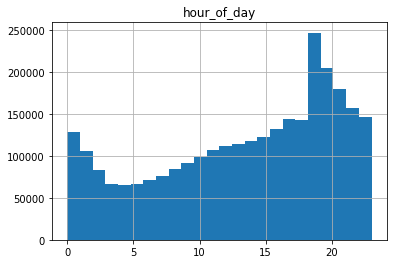

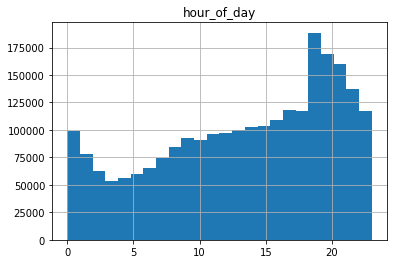

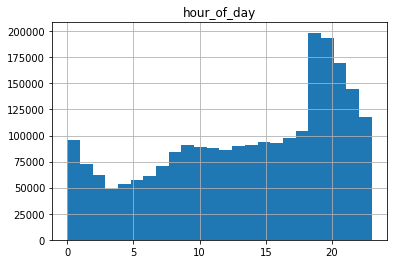

In [125]:
range_start_1 = 1543863600
range_end_1 = 1544122800
max_ts_1 = max(period_1.time)
min_ts_1 = min(period_1.time)
period_1['new_ts'] = range_start_1 + ((period_1.time - min_ts_1) / (max_ts_1 - min_ts_1)) * (range_end_1 - range_start_1)
period_1.new_ts = pd.to_datetime(period_1.new_ts, unit='s')
period_1['hour_of_day'] = period_1.new_ts.dt.hour
period_1.hist(column='hour_of_day', bins=24)

range_start_2 = 1544468400
range_end_2 = 1544727600
max_ts_2 = max(period_2.time)
min_ts_2 = min(period_2.time)
period_2['new_ts'] = range_start_2 + ((period_2.time - min_ts_2) / (max_ts_2 - min_ts_2)) * (range_end_2 - range_start_2)
period_2.new_ts = pd.to_datetime(period_2.new_ts, unit='s')
period_2['hour_of_day'] = period_2.new_ts.dt.hour
period_2.hist(column='hour_of_day', bins=24)

range_start_3 = 1545073200
range_end_3 = 1545332400
max_ts_3 = max(period_3.time)
min_ts_3 = min(period_3.time)
period_3['new_ts'] = range_start_3 + ((period_3.time - min_ts_3) / (max_ts_3 - min_ts_3)) * (range_end_3 - range_start_3)
period_3.new_ts = pd.to_datetime(period_3.new_ts, unit='s')
period_3['hour_of_day'] = period_3.new_ts.dt.hour
period_3.hist(column='hour_of_day', bins=24)

In [126]:
bids = pd.concat([period_1, period_2, period_3])
print(len(bids))
bids.head(n=100)

7656334


,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url,new_ts,hour_of_day
2351187,2351187,76218e14c379c12d599dae9e1c00b61a3i5b2,6hpvy,sporting goods,phone1161,9631916842105263,cz,121.169.96.51,f33fl83l4vrg6is,2018-12-03 19:00:00.000000000,19
2351188,2351188,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,64uay,sporting goods,phone0,9631916842105263,ke,17.120.130.121,vasstdc27m7nks3,2018-12-03 19:00:00.000000000,19
2351189,2351189,3350dc181383b032a6542a61c67713f9lmevm,b3crj,mobile,phone4,9631916842105263,tz,38.153.26.26,vasstdc27m7nks3,2018-12-03 19:00:00.000000000,19
2351190,2351190,f5b2bbad20d1d7ded3ed960393bec0f40u6hn,fagyq,sporting goods,phone1,9631916842105263,in,161.192.187.34,3skc4v2r07bneta,2018-12-03 19:00:00.000000000,19
2351191,2351191,626159dd6f2228ede002d9f9340f75b7puk8d,c2jhm,jewelry,phone119,9631916842105263,ru,114.173.200.238,5yyqy69xt3y8xdg,2018-12-03 19:00:00.000000000,19
...,...,...,...,...,...,...,...,...,...,...,...
2351282,2351282,6056cc81b7b0f4af70e7b520ece25ee7t9d8x,gja6c,mobile,phone47,9631917157894736,mu,239.9.121.44,ru5slsemfejaa3b,2018-12-03 19:00:06.000023127,19
2351283,2351283,929b75b44585b34d2b917ec181ecbcf298fr8,557vg,jewelry,phone524,9631917157894736,ir,185.31.193.59,he25dovn5y89ktm,2018-12-03 19:00:06.000023127,19
2351284,2351284,29c103503e1d6ace5626fb07a5ab0dafrtjvs,u3o4o,jewelry,phone5397,9631917210526315,th,116.59.38.240,vasstdc27m7nks3,2018-12-03 19:00:07.000026941,19
2351285,2351285,2106dd7866abbfb4e7c68067d7eb9bebflq5d,rrs3o,jewelry,phone91,9631917210526315,fr,162.118.176.195,ljnczo9xq5yxjz9,2018-12-03 19:00:07.000026941,19


In [127]:
bidders_df = pd.concat([train, test])
bid = pd.merge(bidders_df, bids, on='bidder_id', how='left')

/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [128]:
grouped_df = bid.groupby('bidder_id')
cols = ['bidder_id']
train_features_df = None
train_features_df = pd.DataFrame(columns=cols)
test_features_df = None
test_features_df = pd.DataFrame(columns=cols)

In [129]:
def count_values_in_range(series, time_diff):
    top_index, bottom_index, curr_count, max_count = 0, 0, 0, 0
    sorted_series = series.reset_index(drop=True)
    length = len(sorted_series)

    while top_index < length:
        if sorted_series[top_index] - sorted_series[bottom_index] < time_diff:
            top_index += 1
            curr_count += 1
        else:
            bottom_index += 1
            curr_count -= 1
        max_count = curr_count if curr_count > max_count else max_count

    return max_count

In [130]:
iteration_number = 1
for bidder_id, group in grouped_df:
    print(f"\rCurrently at bidder number {iteration_number} / {len(grouped_df.groups)}", end='')
    iteration_number += 1
    num_of_bids = len(group)
    append_dict = {'bidder_id': bidder_id}

    # 16 - Percentage of bids in 4 6-hour windows
    # the windows were chosen so that the peak activity time would be completely
    # encapsulated within a single window.
    from_23_to_5 = len(group[(23 <= group['hour_of_day']) | (group['hour_of_day'] < 5)])
    from_5_to_11 = len(group[(5 <= group['hour_of_day']) & (group['hour_of_day'] < 11)])
    from_11_to_17 = len(group[(11 <= group['hour_of_day']) & (group['hour_of_day'] < 17)])
    from_17_to_23 = len(group[(17 <= group['hour_of_day']) & (group['hour_of_day'] < 23)])
    from_23_to_5_percentage = from_23_to_5 / num_of_bids * 100
    from_5_to_11_percentage = from_5_to_11 / num_of_bids * 100
    from_11_to_17_percentage = from_11_to_17 / num_of_bids * 100
    from_17_to_23_percentage = from_17_to_23 / num_of_bids * 100
    append_dict['percentage_of_bids_23_to_5'] = from_23_to_5_percentage
    append_dict['percentage_of_bids_5_to_11'] = from_5_to_11_percentage
    append_dict['percentage_of_bids_11_to_17'] = from_11_to_17_percentage
    append_dict['percentage_of_bids_17_to_23'] = from_17_to_23_percentage

    # 10-15 - Min and mean change times of ip, device and country
    for feature in ['device', 'ip', 'country']:
        group[f'{feature}_changes'] = group[feature].apply(hash).diff() != 0
        changes_df = group[group[f'{feature}_changes']]
        change_times = pd.to_datetime(changes_df['new_ts']).diff()
        append_dict[f'mean_{feature}_change_time'] = change_times.mean().seconds
        append_dict[f'min_{feature}_change_time'] = change_times.min().seconds

    # 17 - Max bid count in 10, 30 and 60 minutes
    new_ts_series = pd.to_datetime(group['new_ts'])
    for mins in [10, 30, 60]:
        if new_ts_series.isnull().any():
            append_dict[f'max_bid_count_in_{mins}_minutes'] = 0
        else:
            append_dict[f'max_bid_count_in_{mins}_minutes'] = count_values_in_range(new_ts_series, pd.Timedelta(mins, unit='m'))

    # # 41, 42 - Max and mean consecutive bids with same parameters
    group['concat_params'] = group['country'] + '_' + group['ip'] + '_' + group['device']
    group['concat_params_changes'] = group['concat_params'].apply(hash).diff() == 0
    y = group['concat_params_changes']
    consecutive_no_change = y * (y.groupby((y != y.shift()).cumsum()).cumcount() + 1)
    append_dict['max_consec_no_param_change'] = max(consecutive_no_change)
    mean_consec = consecutive_no_change[consecutive_no_change != 0].mean()
    append_dict['mean_consec_no_param_change'] = 0. if pd.isna(mean_consec) else mean_consec
    

    if bidder_id in train['bidder_id'].values:
        train_features_df = train_features_df.append(append_dict, ignore_index=True)
    if bidder_id in test['bidder_id'].values:
        test_features_df = test_features_df.append(append_dict, ignore_index=True)

Currently at bidder number 6 / 6713

/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Currently at bidder number 6713 / 6713

In [131]:
print(train_features_df.shape)
print(test_features_df.shape)

(2013, 16)
(4700, 16)


In [132]:
pd.isnull(train_features_df).sum()

bidder_id                        0
max_bid_count_in_10_minutes      0
max_bid_count_in_30_minutes      0
max_bid_count_in_60_minutes      0
max_consec_no_param_change       0
mean_consec_no_param_change      0
mean_country_change_time       635
mean_device_change_time        440
mean_ip_change_time            382
min_country_change_time        635
min_device_change_time         440
min_ip_change_time             382
percentage_of_bids_11_to_17      0
percentage_of_bids_17_to_23      0
percentage_of_bids_23_to_5       0
percentage_of_bids_5_to_11       0
dtype: int64

In [133]:
pd.isnull(test_features_df).sum()

bidder_id                         0
max_bid_count_in_10_minutes       0
max_bid_count_in_30_minutes       0
max_bid_count_in_60_minutes       0
max_consec_no_param_change        0
mean_consec_no_param_change       0
mean_country_change_time       1587
mean_device_change_time        1111
mean_ip_change_time             955
min_country_change_time        1587
min_device_change_time         1111
min_ip_change_time              955
percentage_of_bids_11_to_17       0
percentage_of_bids_17_to_23       0
percentage_of_bids_23_to_5        0
percentage_of_bids_5_to_11        0
dtype: int64

In [134]:
# NaN values in these features will be filled with their respective bot/human median value
time_features = ['mean_ip_change_time', 'min_ip_change_time',
                 'mean_device_change_time', 'min_device_change_time',
                 'mean_country_change_time', 'min_country_change_time']
train_features_df = train_features_df.merge(bidders_df, on='bidder_id')
bots_df = train_features_df[train_features_df['outcome'] == 1]
humans_df = train_features_df[train_features_df['outcome'] == 0]

In [135]:
cleaned_train_output_df = None
cleaned_train_output_df = pd.DataFrame()
for df in [bots_df, humans_df]:
    na_fill_dict = {feature: df[feature].median() for feature in time_features}
    df = df.fillna(value=na_fill_dict)
    cleaned_train_output_df = cleaned_train_output_df.append(df)


In [136]:
cleaned_train_output_df.drop('outcome', axis=1, inplace=True)

In [137]:
cleaned_test_output_df = None
cleaned_test_output_df = pd.DataFrame()
test_features_df = test_features_df.fillna(value={'mean_consec_no_param_change': 0})
na_fill_dict = {feature: test_features_df[feature].median() for feature in time_features}
test_features_df = test_features_df.fillna(value=na_fill_dict)
cleaned_test_output_df = cleaned_test_output_df.append(test_features_df)

In [138]:
cleaned_train_output_df.head()

,bidder_id,max_bid_count_in_10_minutes,max_bid_count_in_30_minutes,max_bid_count_in_60_minutes,max_consec_no_param_change,mean_consec_no_param_change,mean_country_change_time,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11,address,payment_account
17,022ac3a7ce986049d9a4bede83ccf9ddctvg6,102.0,192.0,276.0,13.0,1.561798,431.0,1786.0,178.0,0.0,0.0,0.0,38.388626,4.318062,18.062138,39.231174,c57c64adcc43ce50d99f184d87981d87yz2di,57aec2c76d2db80cf61c2543d15ef9f82tplj
33,041d869edcadf595b90e3b5248903183pn754,13.0,26.0,37.0,3.0,1.137931,1879.0,1127.0,956.0,1.0,0.0,0.0,22.557905,36.858006,25.780463,14.803625,a3d2de7675556553a5f08e4c88d2c228elshv,a3d2de7675556553a5f08e4c88d2c228fyp15
54,060ac64ff78ae62e9bc697192cebea333760p,14.0,28.0,41.0,60.0,15.529762,8854.0,8854.0,8500.0,147.0,147.0,147.0,11.340206,57.731959,24.226804,6.701031,9c584eb89824bca6f66b93b30db19849f462o,d7a69a3308ae300a133dc62dc9189504u6vt0
55,061690ceb6004807b7906968bf382dfcbve7y,10.0,15.0,26.0,2.0,1.083333,10647.0,2453.0,2635.0,35.0,0.0,1.0,44.444444,23.842593,8.796296,22.916667,a3d2de7675556553a5f08e4c88d2c228mmua8,a3d2de7675556553a5f08e4c88d2c2288o042
63,06ddad46112881df154e3bda0e90fe880r57n,177.0,177.0,177.0,0.0,0.000000,1330.0,561.0,1.0,1.0,0.0,0.0,0.000000,0.000000,0.000000,100.000000,a6ed42b522b643dd393b71b9ace4a6e9lfelg,a3d2de7675556553a5f08e4c88d2c228i8nnd


In [139]:
cleaned_train_output_df.to_csv('./Data-Science/Data/Train_Advanced_Time_Features')
cleaned_test_output_df.to_csv('./Data-Science/Data/Test_Advanced_Time_Features')

In [140]:
print("train shape",cleaned_train_output_df.shape)
print("test shape ", cleaned_test_output_df.shape)

train shape (2013, 18)
test shape  (4700, 16)


In [141]:
X_train = pd.read_csv('./Data-Science/Data/Train_Auction_Features')
X_test = pd.read_csv('./Data-Science/Data/Test_Auction_Features')
train_features_df = pd.read_csv("./Data-Science/Data/Train_Advanced_Time_Features")
test_features_df = pd.read_csv("./Data-Science/Data/Test_Advanced_Time_Features")

In [142]:
X_train = pd.merge(X_train,train_features_df,on='bidder_id', how='left')
X_test = pd.merge(X_test,test_features_df,on='bidder_id', how='left')

In [143]:
X_train.shape
X_train.isna().sum()

bidder_id                                        0
Unnamed: 0_x                                     0
Unnamed: 0.1                                     0
outcome                                          0
payment_account_prefix_same_as_address_prefix    0
                                                ..
percentage_of_bids_17_to_23                      0
percentage_of_bids_23_to_5                       0
percentage_of_bids_5_to_11                       0
address                                          0
payment_account                                  0
Length: 274, dtype: int64

In [144]:
X_test.shape
X_test.isna().sum()

bidder_id                                        0
Unnamed: 0_x                                     0
Unnamed: 0.1                                     0
payment_account_prefix_same_as_address_prefix    0
address_infrequent_address                       0
                                                ..
min_ip_change_time                               0
percentage_of_bids_11_to_17                      0
percentage_of_bids_17_to_23                      0
percentage_of_bids_23_to_5                       0
percentage_of_bids_5_to_11                       0
Length: 272, dtype: int64

In [145]:
X_train.to_csv('./Data-Science/Data/Train_Final_Features')
X_test.to_csv('./Data-Science/Data/Test_Final_Features')

# 5. Models And Models Comparison

In [146]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split,cross_validate,StratifiedShuffleSplit
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score,classification_report, average_precision_score
from sklearn.calibration import CalibratedClassifierCV
import xgboost
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold

In [147]:
train = pd.read_csv('./Data-Science/Data/Train_Final_Features')
test = pd.read_csv('./Data-Science/Data/Test_Final_Features')


In [148]:
import sklearn.metrics
 
def plotRoc(fpr, tpr, auc):
  plt.figure()
  plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
  plt.legend(loc="lower right")
  plt.show()
    
def plotPR(precision, recall):
  plt.figure()
  plt.plot(recall, precision, label='PR curve')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])
  plt.xlabel('Recall')
  plt.ylabel('Precision')
  plt.title('Precision Recall curve')
  plt.legend(loc='lower left')
  plt.show()
 
def plotMetrics(expected,predicted):
  y_true = expected
  y_score = predicted
  #y_score = df['rawPrediction'].map(lambda x: x['values'][1])
  auc = sklearn.metrics.roc_auc_score(y_true, y_score)
  fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_true, y_score)
  plotRoc(fpr, tpr, auc)
  precision, recall, thresholds = sklearn.metrics.precision_recall_curve(y_true, y_score, pos_label=1)
  plotPR(precision, recall)

## 5.1  Preparing Datasets for Training

In [149]:
test_col = test.columns
train_col = train.columns
print(test.shape)
print(train.shape)
missing1 = [ i for i in train_col if i not in test_col]
missing2 = [ i for i in test_col if i not in train_col]

print(missing1)
print(missing2)

(4700, 273)
(2013, 275)
['mh', 'address', 'payment_account']
['vc']


In [150]:
train=train.drop('Unnamed: 0.1',1)
train=train.drop('mh',1)
train=train.drop('address',1)
train=train.drop('payment_account',1)
test = test.drop('vc',1)
test = test.drop('Unnamed: 0.1',1)	


In [151]:
train=train.drop('Unnamed: 0',1)
test = test.drop('Unnamed: 0',1)
train=train.drop('Unnamed: 0_x',1)
test = test.drop('Unnamed: 0_x',1)
test=test.drop('outcome',1)
train=train.drop('most_common_country',1)
test = test.drop('most_common_country',1)	

In [152]:
test_col = test.columns
train_col = train.columns
print(test.shape)
print(train.shape)
missing1 = [ i for i in train_col if i not in test_col]
missing2 = [ i for i in test_col if i not in train_col]

print(missing1)
print(missing2)

(4700, 267)
(2013, 268)
['outcome']
[]


In [153]:
train=train.sample(frac=1)
X_train = train.drop('outcome',1)
X_train = X_train.drop('bidder_id',1)
y_train= train['outcome']
y_submission = test['bidder_id']
X_test = test.drop('bidder_id',1)

In [154]:
X_train_CV, X_test_CV, y_train_CV, y_test_CV = train_test_split(X_train, y_train, random_state=30)

In [155]:
train.head()

,bidder_id,outcome,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,...,mean_country_change_time,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11
1996,1dfb637157cc0e590e50d724cd4cad6d4cacw,0.0,False,0,1,0,1,39,23,1,...,7165.0,35183.0,28146.0,28720.0,1133.0,60.0,20.512821,25.641026,23.076923,30.769231
632,445305769cbfccafc89ff5ebd004598einesy,0.0,True,0,0,0,0,3137,352,1,...,103.0,88.0,86.0,0.0,0.0,0.0,25.502072,34.427797,22.951865,17.118266
830,90eb8151eb82441b084d04893151619837abp,0.0,False,0,0,0,0,6,1,1,...,15322.0,50299.0,50299.0,319.5,190.0,190.0,0.000000,50.000000,33.333333,16.666667
1569,4985bdbf8710c33fd7c9d4771db7c690mcbyr,0.0,True,0,0,0,0,5,4,1,...,15322.0,24405.0,24405.0,319.5,1720.0,1720.0,0.000000,60.000000,40.000000,0.000000
668,b0164d9a18a3cdf6082e96f9708040690qcqf,0.0,False,0,1,0,1,255,74,1,...,1103.0,968.0,1074.0,101.0,101.0,101.0,19.607843,12.941176,52.941176,14.509804


In [156]:
train.to_csv('./Data-Science/Data/Train_Clean_All_Features')

## 5.2  Setting Up Models

In [157]:
##SVM
svm_linear_model = LinearSVC()
SVM_classifier = CalibratedClassifierCV(svm_linear_model) 

##Random Forest
RF_model=RandomForestClassifier(random_state=42)
RF_param_grid = { 
    'n_estimators': [100,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7]      
}
##Gradient boost
GB_Model = GradientBoostingClassifier(random_state=42)
GB_param_grid = {
    'n_estimators': [10,25,50],
    'max_depth': range(3, 6),
    'max_leaf_nodes': range(8, 11)
}

##XGBoost
XGB_Model = xgboost.XGBClassifier()
XGB_param_grid = {
                  'max_depth': np.arange(2,50,2),
                  'learning_rate': np.arange(0.2,2,0.2),
                  'n_estimators': np.arange(20,400,20),
                  'reg_alpha': np.arange(0,2,0.2),
                  'reg_lambda': np.arange(0,2,0.2)
                 }

## 5.3  Hypertuning Parameters

### 5.3.1 Random Forest

In [158]:
RF_classifier = GridSearchCV(estimator=RF_model, param_grid=RF_param_grid, cv= 5,verbose=3)
RF_classifier.fit(X_train_CV, y_train_CV)
print(RF_classifier.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=4, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.947, total=   0.3s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.957, total=   0.3s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.937, total=   0.3s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................
[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.947, total=   0.3s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................
[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.944, total=   0.3s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.954, total=   0.7s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.957, total=   0.7s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.940, total=   0.7s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.950, total= 

[CV]  max_depth=5, max_features=auto, n_estimators=500, score=0.960, total=   1.2s
[CV] max_depth=5, max_features=auto, n_estimators=500 ................
[CV]  max_depth=5, max_features=auto, n_estimators=500, score=0.937, total=   1.2s
[CV] max_depth=5, max_features=auto, n_estimators=500 ................
[CV]  max_depth=5, max_features=auto, n_estimators=500, score=0.954, total=   1.3s
[CV] max_depth=5, max_features=auto, n_estimators=500 ................
[CV]  max_depth=5, max_features=auto, n_estimators=500, score=0.944, total=   1.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=100 ................
[CV]  max_depth=5, max_features=sqrt, n_estimators=100, score=0.957, total=   0.3s
[CV] max_depth=5, max_features=sqrt, n_estimators=100 ................
[CV]  max_depth=5, max_features=sqrt, n_estimators=100, score=0.964, total=   0.3s
[CV] max_depth=5, max_features=sqrt, n_estimators=100 ................
[CV]  max_depth=5, max_features=sqrt, n_estimators=100, score=0.937, total= 

[CV]  max_depth=6, max_features=sqrt, n_estimators=300, score=0.957, total=   0.8s
[CV] max_depth=6, max_features=sqrt, n_estimators=300 ................
[CV]  max_depth=6, max_features=sqrt, n_estimators=300, score=0.964, total=   0.8s
[CV] max_depth=6, max_features=sqrt, n_estimators=300 ................
[CV]  max_depth=6, max_features=sqrt, n_estimators=300, score=0.944, total=   0.8s
[CV] max_depth=6, max_features=sqrt, n_estimators=300 ................
[CV]  max_depth=6, max_features=sqrt, n_estimators=300, score=0.954, total=   0.8s
[CV] max_depth=6, max_features=sqrt, n_estimators=300 ................
[CV]  max_depth=6, max_features=sqrt, n_estimators=300, score=0.957, total=   0.8s
[CV] max_depth=6, max_features=sqrt, n_estimators=500 ................
[CV]  max_depth=6, max_features=sqrt, n_estimators=500, score=0.957, total=   1.3s
[CV] max_depth=6, max_features=sqrt, n_estimators=500 ................
[CV]  max_depth=6, max_features=sqrt, n_estimators=500, score=0.964, total= 

[CV]  max_depth=7, max_features=sqrt, n_estimators=500, score=0.957, total=   1.3s
[CV] max_depth=7, max_features=log2, n_estimators=100 ................
[CV]  max_depth=7, max_features=log2, n_estimators=100, score=0.957, total=   0.2s
[CV] max_depth=7, max_features=log2, n_estimators=100 ................
[CV]  max_depth=7, max_features=log2, n_estimators=100, score=0.957, total=   0.2s
[CV] max_depth=7, max_features=log2, n_estimators=100 ................
[CV]  max_depth=7, max_features=log2, n_estimators=100, score=0.940, total=   0.2s
[CV] max_depth=7, max_features=log2, n_estimators=100 ................
[CV]  max_depth=7, max_features=log2, n_estimators=100, score=0.950, total=   0.2s
[CV] max_depth=7, max_features=log2, n_estimators=100 ................
[CV]  max_depth=7, max_features=log2, n_estimators=100, score=0.950, total=   0.2s
[CV] max_depth=7, max_features=log2, n_estimators=300 ................
[CV]  max_depth=7, max_features=log2, n_estimators=300, score=0.954, total= 

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.2min finished


{'max_depth': 6, 'max_features': 'auto', 'n_estimators': 100}


### 5.3.2 Gradient Boost

In [159]:
GB_classifier = GridSearchCV(estimator=GB_Model,
                     param_grid=GB_param_grid,
                     cv=5, verbose=3)
GB_classifier.fit(X_train_CV, y_train_CV)
print(GB_classifier.best_params_)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.957, total=   0.2s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.964, total=   0.2s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.940, total=   0.2s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.950, total=   0.2s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.944, total=   0.2s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.950, total=   0.4s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.977, total=   0.4s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.937, total=   0.4s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.947, total=   0.4s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.947, total=   0.4s
[CV] ma

[CV]  max_depth=4, max_leaf_nodes=8, n_estimators=50, score=0.934, total=   0.9s
[CV] max_depth=4, max_leaf_nodes=8, n_estimators=50 ..................
[CV]  max_depth=4, max_leaf_nodes=8, n_estimators=50, score=0.960, total=   0.9s
[CV] max_depth=4, max_leaf_nodes=8, n_estimators=50 ..................
[CV]  max_depth=4, max_leaf_nodes=8, n_estimators=50, score=0.960, total=   0.9s
[CV] max_depth=4, max_leaf_nodes=9, n_estimators=10 ..................
[CV]  max_depth=4, max_leaf_nodes=9, n_estimators=10, score=0.954, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, n_estimators=10 ..................
[CV]  max_depth=4, max_leaf_nodes=9, n_estimators=10, score=0.964, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, n_estimators=10 ..................
[CV]  max_depth=4, max_leaf_nodes=9, n_estimators=10, score=0.937, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, n_estimators=10 ..................
[CV]  max_depth=4, max_leaf_nodes=9, n_estimators=10, score=0.950, total=   0.2s
[CV] ma

[CV]  max_depth=5, max_leaf_nodes=9, n_estimators=25, score=0.970, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, n_estimators=25 ..................
[CV]  max_depth=5, max_leaf_nodes=9, n_estimators=25, score=0.934, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, n_estimators=25 ..................
[CV]  max_depth=5, max_leaf_nodes=9, n_estimators=25, score=0.960, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, n_estimators=25 ..................
[CV]  max_depth=5, max_leaf_nodes=9, n_estimators=25, score=0.953, total=   0.5s
[CV] max_depth=5, max_leaf_nodes=9, n_estimators=50 ..................
[CV]  max_depth=5, max_leaf_nodes=9, n_estimators=50, score=0.944, total=   1.0s
[CV] max_depth=5, max_leaf_nodes=9, n_estimators=50 ..................
[CV]  max_depth=5, max_leaf_nodes=9, n_estimators=50, score=0.970, total=   1.0s
[CV] max_depth=5, max_leaf_nodes=9, n_estimators=50 ..................
[CV]  max_depth=5, max_leaf_nodes=9, n_estimators=50, score=0.930, total=   1.0s
[CV] ma

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  1.1min finished


{'max_depth': 4, 'max_leaf_nodes': 10, 'n_estimators': 50}


### 5.3.3 XGBoost

In [160]:
CV_SSS = StratifiedShuffleSplit(n_splits = 5, test_size = 0.33, random_state=None)
XGB_classifier = RandomizedSearchCV(XGB_Model, XGB_param_grid, scoring = 'roc_auc', cv = CV_SSS,
                                        n_iter = 40,verbose=3)
XGB_classifier.fit(X_train_CV,y_train_CV)
print(XGB_classifier.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] reg_lambda=1.4000000000000001, reg_alpha=0.2, n_estimators=340, max_depth=28, learning_rate=1.4000000000000001 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  reg_lambda=1.4000000000000001, reg_alpha=0.2, n_estimators=340, max_depth=28, learning_rate=1.4000000000000001, score=0.920, total=   2.9s
[CV] reg_lambda=1.4000000000000001, reg_alpha=0.2, n_estimators=340, max_depth=28, learning_rate=1.4000000000000001 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s


[CV]  reg_lambda=1.4000000000000001, reg_alpha=0.2, n_estimators=340, max_depth=28, learning_rate=1.4000000000000001, score=0.934, total=   2.9s
[CV] reg_lambda=1.4000000000000001, reg_alpha=0.2, n_estimators=340, max_depth=28, learning_rate=1.4000000000000001 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.9s remaining:    0.0s


[CV]  reg_lambda=1.4000000000000001, reg_alpha=0.2, n_estimators=340, max_depth=28, learning_rate=1.4000000000000001, score=0.936, total=   3.1s
[CV] reg_lambda=1.4000000000000001, reg_alpha=0.2, n_estimators=340, max_depth=28, learning_rate=1.4000000000000001 
[CV]  reg_lambda=1.4000000000000001, reg_alpha=0.2, n_estimators=340, max_depth=28, learning_rate=1.4000000000000001, score=0.940, total=   2.9s
[CV] reg_lambda=1.4000000000000001, reg_alpha=0.2, n_estimators=340, max_depth=28, learning_rate=1.4000000000000001 
[CV]  reg_lambda=1.4000000000000001, reg_alpha=0.2, n_estimators=340, max_depth=28, learning_rate=1.4000000000000001, score=0.935, total=   2.9s
[CV] reg_lambda=1.4000000000000001, reg_alpha=0.2, n_estimators=120, max_depth=4, learning_rate=0.4 
[CV]  reg_lambda=1.4000000000000001, reg_alpha=0.2, n_estimators=120, max_depth=4, learning_rate=0.4, score=0.944, total=   1.6s
[CV] reg_lambda=1.4000000000000001, reg_alpha=0.2, n_estimators=120, max_depth=4, learning_rate=0.4 


[CV]  reg_lambda=1.6, reg_alpha=1.6, n_estimators=240, max_depth=40, learning_rate=0.2, score=0.964, total=   2.5s
[CV] reg_lambda=1.8, reg_alpha=1.6, n_estimators=220, max_depth=32, learning_rate=1.4000000000000001 
[CV]  reg_lambda=1.8, reg_alpha=1.6, n_estimators=220, max_depth=32, learning_rate=1.4000000000000001, score=0.931, total=   1.7s
[CV] reg_lambda=1.8, reg_alpha=1.6, n_estimators=220, max_depth=32, learning_rate=1.4000000000000001 
[CV]  reg_lambda=1.8, reg_alpha=1.6, n_estimators=220, max_depth=32, learning_rate=1.4000000000000001, score=0.886, total=   1.7s
[CV] reg_lambda=1.8, reg_alpha=1.6, n_estimators=220, max_depth=32, learning_rate=1.4000000000000001 
[CV]  reg_lambda=1.8, reg_alpha=1.6, n_estimators=220, max_depth=32, learning_rate=1.4000000000000001, score=0.922, total=   1.7s
[CV] reg_lambda=1.8, reg_alpha=1.6, n_estimators=220, max_depth=32, learning_rate=1.4000000000000001 
[CV]  reg_lambda=1.8, reg_alpha=1.6, n_estimators=220, max_depth=32, learning_rate=1.40

[CV]  reg_lambda=1.4000000000000001, reg_alpha=1.2000000000000002, n_estimators=140, max_depth=10, learning_rate=1.2, score=0.937, total=   1.2s
[CV] reg_lambda=1.4000000000000001, reg_alpha=1.2000000000000002, n_estimators=140, max_depth=10, learning_rate=1.2 
[CV]  reg_lambda=1.4000000000000001, reg_alpha=1.2000000000000002, n_estimators=140, max_depth=10, learning_rate=1.2, score=0.946, total=   1.1s
[CV] reg_lambda=1.4000000000000001, reg_alpha=1.2000000000000002, n_estimators=140, max_depth=10, learning_rate=1.2 
[CV]  reg_lambda=1.4000000000000001, reg_alpha=1.2000000000000002, n_estimators=140, max_depth=10, learning_rate=1.2, score=0.932, total=   1.1s
[CV] reg_lambda=0.8, reg_alpha=1.2000000000000002, n_estimators=300, max_depth=28, learning_rate=0.4 
[CV]  reg_lambda=0.8, reg_alpha=1.2000000000000002, n_estimators=300, max_depth=28, learning_rate=0.4, score=0.948, total=   2.5s
[CV] reg_lambda=0.8, reg_alpha=1.2000000000000002, n_estimators=300, max_depth=28, learning_rate=0.

[CV]  reg_lambda=1.8, reg_alpha=1.8, n_estimators=340, max_depth=34, learning_rate=0.2, score=0.967, total=   3.2s
[CV] reg_lambda=1.8, reg_alpha=0.8, n_estimators=160, max_depth=14, learning_rate=1.2 
[CV]  reg_lambda=1.8, reg_alpha=0.8, n_estimators=160, max_depth=14, learning_rate=1.2, score=0.933, total=   1.3s
[CV] reg_lambda=1.8, reg_alpha=0.8, n_estimators=160, max_depth=14, learning_rate=1.2 
[CV]  reg_lambda=1.8, reg_alpha=0.8, n_estimators=160, max_depth=14, learning_rate=1.2, score=0.905, total=   1.3s
[CV] reg_lambda=1.8, reg_alpha=0.8, n_estimators=160, max_depth=14, learning_rate=1.2 
[CV]  reg_lambda=1.8, reg_alpha=0.8, n_estimators=160, max_depth=14, learning_rate=1.2, score=0.942, total=   1.4s
[CV] reg_lambda=1.8, reg_alpha=0.8, n_estimators=160, max_depth=14, learning_rate=1.2 
[CV]  reg_lambda=1.8, reg_alpha=0.8, n_estimators=160, max_depth=14, learning_rate=1.2, score=0.954, total=   1.3s
[CV] reg_lambda=1.8, reg_alpha=0.8, n_estimators=160, max_depth=14, learning_

[CV]  reg_lambda=0.4, reg_alpha=0.8, n_estimators=80, max_depth=48, learning_rate=1.0, score=0.934, total=   0.7s
[CV] reg_lambda=0.4, reg_alpha=0.8, n_estimators=80, max_depth=48, learning_rate=1.0 
[CV]  reg_lambda=0.4, reg_alpha=0.8, n_estimators=80, max_depth=48, learning_rate=1.0, score=0.951, total=   0.8s
[CV] reg_lambda=1.0, reg_alpha=1.0, n_estimators=60, max_depth=6, learning_rate=1.2 
[CV]  reg_lambda=1.0, reg_alpha=1.0, n_estimators=60, max_depth=6, learning_rate=1.2, score=0.941, total=   0.6s
[CV] reg_lambda=1.0, reg_alpha=1.0, n_estimators=60, max_depth=6, learning_rate=1.2 
[CV]  reg_lambda=1.0, reg_alpha=1.0, n_estimators=60, max_depth=6, learning_rate=1.2, score=0.927, total=   0.6s
[CV] reg_lambda=1.0, reg_alpha=1.0, n_estimators=60, max_depth=6, learning_rate=1.2 
[CV]  reg_lambda=1.0, reg_alpha=1.0, n_estimators=60, max_depth=6, learning_rate=1.2, score=0.936, total=   0.6s
[CV] reg_lambda=1.0, reg_alpha=1.0, n_estimators=60, max_depth=6, learning_rate=1.2 
[CV]  r

[CV]  reg_lambda=0.4, reg_alpha=0.0, n_estimators=380, max_depth=48, learning_rate=1.6, score=0.913, total=   2.7s
[CV] reg_lambda=0.4, reg_alpha=0.0, n_estimators=380, max_depth=48, learning_rate=1.6 
[CV]  reg_lambda=0.4, reg_alpha=0.0, n_estimators=380, max_depth=48, learning_rate=1.6, score=0.873, total=   2.8s
[CV] reg_lambda=0.4, reg_alpha=0.0, n_estimators=380, max_depth=48, learning_rate=1.6 
[CV]  reg_lambda=0.4, reg_alpha=0.0, n_estimators=380, max_depth=48, learning_rate=1.6, score=0.945, total=   2.7s
[CV] reg_lambda=0.4, reg_alpha=0.0, n_estimators=380, max_depth=48, learning_rate=1.6 
[CV]  reg_lambda=0.4, reg_alpha=0.0, n_estimators=380, max_depth=48, learning_rate=1.6, score=0.933, total=   2.7s
[CV] reg_lambda=0.4, reg_alpha=0.0, n_estimators=380, max_depth=48, learning_rate=1.6 
[CV]  reg_lambda=0.4, reg_alpha=0.0, n_estimators=380, max_depth=48, learning_rate=1.6, score=0.931, total=   2.7s
[CV] reg_lambda=0.8, reg_alpha=1.0, n_estimators=80, max_depth=42, learning_r

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:  6.1min finished


{'reg_lambda': 0.0, 'reg_alpha': 0.6000000000000001, 'n_estimators': 280, 'max_depth': 8, 'learning_rate': 0.2}


## 5.4 Fitting Models 

In [161]:
##SVM
SVM_classifier.fit(X_train_CV,y_train_CV) 

##Random Forest
RF_bestClf = RF_classifier.best_estimator_
RF_bestClf.fit(X_train_CV, y_train_CV)

##Gradient Boost
GB_bestClf = GB_classifier.best_estimator_
GB_bestClf.fit(X_train_CV, y_train_CV)

##XGBoost
XGB_bestClf = XGB_classifier.best_estimator_
XGB_bestClf.fit(X_train_CV, y_train_CV)

/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to c

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=280, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.6000000000000001, reg_lambda=0.0, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

## 5.5 Train Metrics

### 5.5.1 Classification Report

In [162]:
expected_train=y_train_CV
##Predicted Results On Train
SVM_predicted_train = SVM_classifier.predict(X_train_CV)
RF_predicted_train = RF_bestClf.predict(X_train_CV)
GB_predicted_train = GB_classifier.predict(X_train_CV)
XGB_predicted_train = XGB_classifier.predict(X_train_CV)

print("SVM CLASSIFICATION REPORT")
print(classification_report(expected_train, SVM_predicted_train))
print("-----------------------------")

print("RANDOM FOREST CLASSIFICATION REPORT")
print(classification_report(expected_train, RF_predicted_train))
print("-----------------------------")

print("GRADIENT BOOST CLASSIFICATION REPORT")
print(classification_report(expected_train, GB_predicted_train))
print("-----------------------------")

print("XGBOOST CLASSIFICATION REPORT")
print(classification_report(expected_train, XGB_predicted_train))


SVM CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97      1423
         1.0       0.00      0.00      0.00        86

    accuracy                           0.94      1509
   macro avg       0.47      0.50      0.49      1509
weighted avg       0.89      0.94      0.92      1509

-----------------------------
RANDOM FOREST CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      1423
         1.0       1.00      0.62      0.76        86

    accuracy                           0.98      1509
   macro avg       0.99      0.81      0.88      1509
weighted avg       0.98      0.98      0.98      1509

-----------------------------
GRADIENT BOOST CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1423
         1.0       1.00      0.99      0.99        86

    accuracy           

/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5.5.2 Average Precision

In [163]:
SVM_predicted_probs_train = SVM_classifier.predict_proba(X_train_CV)
RF_predicted_probs_train= RF_bestClf.predict_proba(X_train_CV)
GB_predicted_probs_train= GB_bestClf.predict_proba(X_train_CV)
XGB_predicted_probs_train = XGB_bestClf.predict_proba(X_train_CV)

print("AVERAGE PRECISION SVM")
print(average_precision_score(y_train_CV.astype('int'),SVM_predicted_probs_train[:,1]))

print("AVERAGE PRECISION RANDOM FOREST")
print(average_precision_score(y_train_CV.astype('int'),RF_predicted_probs_train[:,1]))

print("AVERAGE PRECISION GRADIENT BOOST")
print(average_precision_score(y_train_CV.astype('int'),GB_predicted_probs_train[:,1]))

print("AVERAGE PRECISION XGBOOST")
print(average_precision_score(y_train_CV.astype('int'),XGB_predicted_probs_train[:,1]))


AVERAGE PRECISION SVM
0.12624242171258035
AVERAGE PRECISION RANDOM FOREST
0.9896914209213005
AVERAGE PRECISION GRADIENT BOOST
1.0
AVERAGE PRECISION XGBOOST
1.0


### 5.5.3 AUC Graphes

SVM


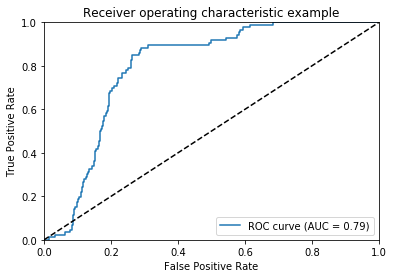

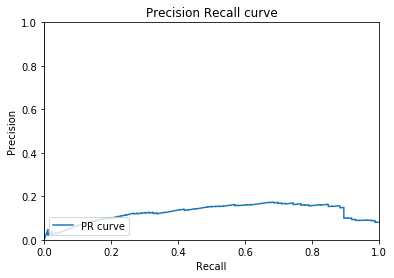

RANDOM FOREST


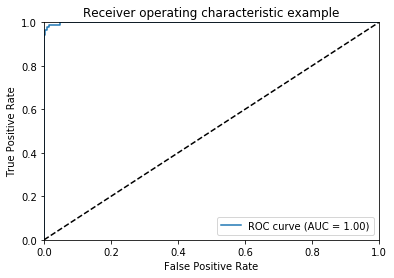

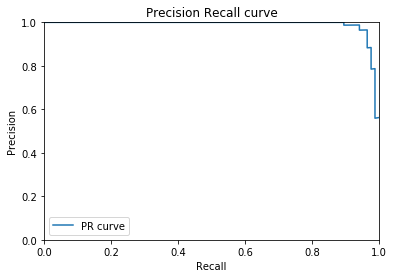

GRADIENT BOOST


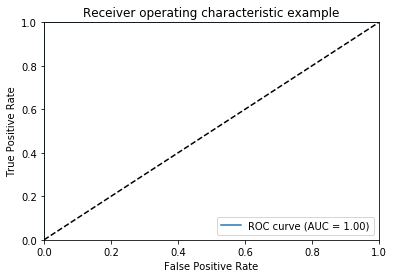

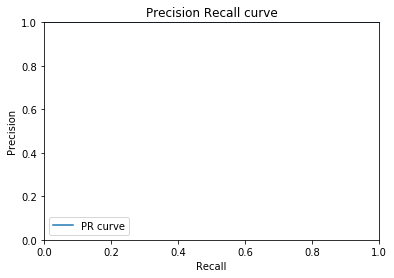

XGBOOST


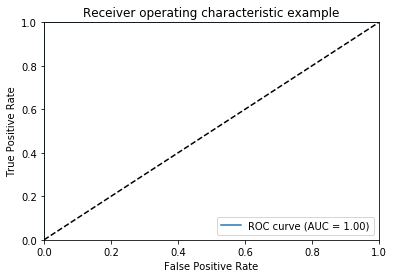

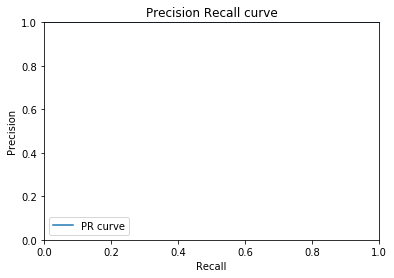

In [164]:
print("SVM")
plotMetrics(expected_train.astype('int'),SVM_predicted_probs_train[:,1])
print("RANDOM FOREST")
plotMetrics(expected_train.astype('int'),RF_predicted_probs_train[:,1])
print("GRADIENT BOOST")
plotMetrics(expected_train.astype('int'),GB_predicted_probs_train[:,1])
print("XGBOOST")
plotMetrics(expected_train.astype('int'),XGB_predicted_probs_train[:,1])


## 5.6 Test Metrics

### 5.6.1 Classification Report

In [165]:
expected_test=y_test_CV
##Predicted Results On Train
SVM_predicted_test = SVM_classifier.predict(X_test_CV)
RF_predicted_test = RF_bestClf.predict(X_test_CV)
GB_predicted_test = GB_bestClf.predict(X_test_CV)
XGB_predicted_test = XGB_bestClf.predict(X_test_CV)

print("SVM CLASSIFICATION REPORT")
print(classification_report(expected_test, SVM_predicted_test))
print("-----------------------------")

print("RANDOM FOREST CLASSIFICATION REPORT")
print(classification_report(expected_test, RF_predicted_test))
print("-----------------------------")

print("GRADIENT BOOST CLASSIFICATION REPORT")
print(classification_report(expected_test, GB_predicted_test))
print("-----------------------------")

print("XGBOOST CLASSIFICATION REPORT")
print(classification_report(expected_test, XGB_predicted_test))


SVM CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       487
         1.0       0.00      0.00      0.00        17

    accuracy                           0.97       504
   macro avg       0.48      0.50      0.49       504
weighted avg       0.93      0.97      0.95       504

-----------------------------
RANDOM FOREST CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       487
         1.0       0.67      0.12      0.20        17

    accuracy                           0.97       504
   macro avg       0.82      0.56      0.59       504
weighted avg       0.96      0.97      0.96       504

-----------------------------
GRADIENT BOOST CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       487
         1.0       0.44      0.24      0.31        17

    accuracy           

/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5.6.2 Average Precision

In [166]:
SVM_predicted_probs_test = SVM_classifier.predict_proba(X_test_CV)
RF_predicted_probs_test= RF_bestClf.predict_proba(X_test_CV)
GB_predicted_probs_test= GB_bestClf.predict_proba(X_test_CV)
XGB_predicted_probs_test = XGB_bestClf.predict_proba(X_test_CV)

print("AVERAGE PRECISION SVM")
print(average_precision_score(y_test_CV.astype('int'),SVM_predicted_probs_test[:,1]))

print("AVERAGE PRECISION RANDOM FOREST")
print(average_precision_score(y_test_CV.astype('int'),RF_predicted_probs_test[:,1]))

print("AVERAGE PRECISION GRADIENT BOOST")
print(average_precision_score(y_test_CV.astype('int'),GB_predicted_probs_test[:,1]))

print("AVERAGE PRECISION XGBOOST")
print(average_precision_score(y_test_CV.astype('int'),XGB_predicted_probs_test[:,1]))


AVERAGE PRECISION SVM
0.0923487878001068
AVERAGE PRECISION RANDOM FOREST
0.5322626121330691
AVERAGE PRECISION GRADIENT BOOST
0.3632371714562705
AVERAGE PRECISION XGBOOST
0.47842417934796944


### 5.6.3 AUC Graph

SVM


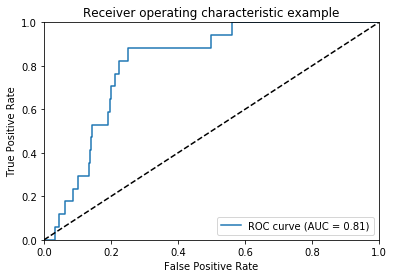

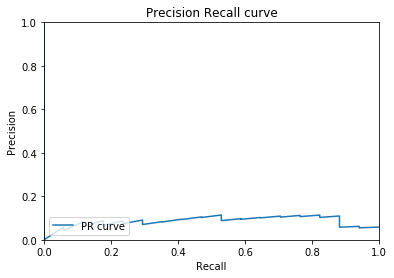

RANDOM FOREST


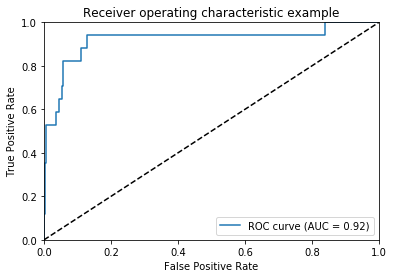

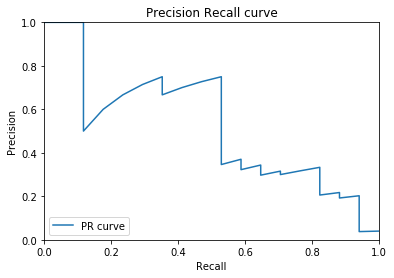

GRADIENT BOOST


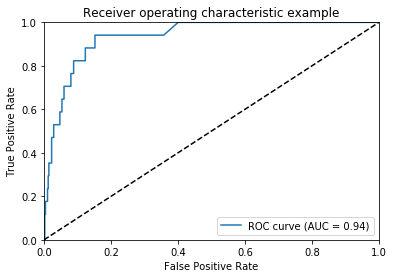

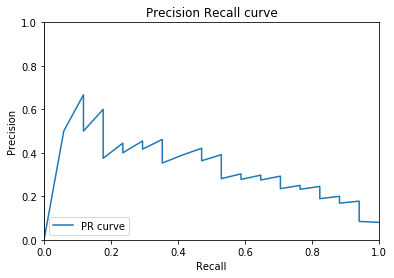

XGBOOST


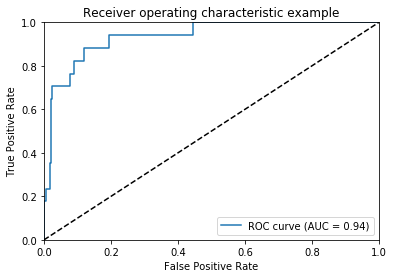

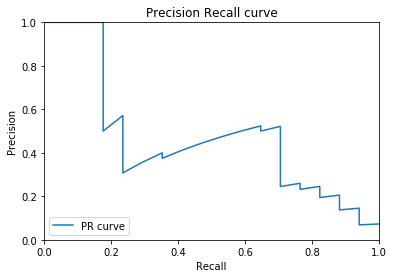

In [167]:
print("SVM")
plotMetrics(y_test_CV.astype('int'),SVM_predicted_probs_test[:,1])
print("RANDOM FOREST")
plotMetrics(y_test_CV.astype('int'),RF_predicted_probs_test[:,1])
print("GRADIENT BOOST")
plotMetrics(y_test_CV.astype('int'),GB_predicted_probs_test[:,1])
print("XGBOOST")
plotMetrics(y_test_CV.astype('int'),XGB_predicted_probs_test[:,1])


# 6.  Cross Validation

In [168]:
scoring = ['average_precision', 'roc_auc']
SVM_scores = cross_validate(SVM_classifier, X_test_CV, y_test_CV, scoring=scoring,return_train_score=True)
RF_scores = cross_validate(RF_bestClf, X_test_CV, y_test_CV, scoring=scoring,return_train_score=True)
GB_scores = cross_validate(GB_bestClf, X_test_CV, y_test_CV, scoring=scoring,return_train_score=True)
XGB_score = cross_validate(XGB_bestClf, X_test_CV, y_test_CV, scoring=scoring,return_train_score=True)

/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to c

In [169]:
print("SVM CROSS VALIDATION")
print("-------------------------------")
print("average_precision", SVM_scores['test_average_precision'].mean())
print("ROC_AUC", SVM_scores['test_roc_auc'].mean())
print("-------------------------------")

print("RANDOM FOREST CROSS VALIDATION")
print("-------------------------------")
print("average_precision", RF_scores['test_average_precision'].mean())
print("ROC_AUC", RF_scores['test_roc_auc'].mean())
print("-------------------------------")

print("GRADIENT BOOST CROSS VALIDATION")
print("-------------------------------")
print("average_precision", GB_scores['test_average_precision'].mean())
print("ROC_AUC", GB_scores['test_roc_auc'].mean())
print("-------------------------------")

print("XGBOOST CROSS VALIDATION")
print("-------------------------------")
print("average_precision", XGB_score['test_average_precision'].mean())
print("ROC_AUC", XGB_score['test_roc_auc'].mean())
print("-------------------------------")

SVM CROSS VALIDATION
-------------------------------
average_precision 0.24250481401410195
ROC_AUC 0.7725997615541061
-------------------------------
RANDOM FOREST CROSS VALIDATION
-------------------------------
average_precision 0.26600633215744773
ROC_AUC 0.8293078055964653
-------------------------------
GRADIENT BOOST CROSS VALIDATION
-------------------------------
average_precision 0.18578707193948577
ROC_AUC 0.7708692755452697
-------------------------------
XGBOOST CROSS VALIDATION
-------------------------------
average_precision 0.22321537995473087
ROC_AUC 0.8176835682726701
-------------------------------


# 7. Kaggle Submissions

## 7.1 Train On All Dataset

In [170]:
SVM_classifier.fit(X_train,y_train)

RF_bestClf.fit(X_train,y_train)

GB_bestClf.fit(X_train,y_train)

XGB_bestClf.fit(X_train,y_train)




/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/yonatan/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to c

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=280, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0.6000000000000001, reg_lambda=0.0, scale_pos_weight=1,
              seed=None, silent=None, subsample=1, verbosity=1)

## 7.2 Create Submission

In [171]:
## Predict Test Results
SVM_test_pred= SVM_classifier.predict_proba(X_test)
RF_test_pred= RF_bestClf.predict_proba(X_test)
GB_test_pred= GB_bestClf.predict_proba(X_test)
XGB_test_pred= XGB_bestClf.predict_proba(X_test)

## Create Series
SVM_test_pred_series = pd.Series(SVM_test_pred[:,1])
RF_test_pred_series = pd.Series(RF_test_pred[:,1])
GB_test_pred_series = pd.Series(GB_test_pred[:,1])
XGB_test_pred_series = pd.Series(XGB_test_pred[:,1])

## Add Prediction Columns
test['SVM_prediction']=SVM_test_pred_series
test['RF_prediction']=RF_test_pred_series
test['GB_prediction']=GB_test_pred_series
test['XGB_prediction']=XGB_test_pred_series



In [172]:
SVM_submission = test[['bidder_id','SVM_prediction']]
SVM_submission = SVM_submission.set_index('bidder_id')

RF_submission=test[['bidder_id','RF_prediction']]
RF_submission= RF_submission.set_index('bidder_id')

GB_submission =test[['bidder_id','GB_prediction']]
GB_submission= GB_submission.set_index('bidder_id')

XGB_submission = test[['bidder_id','XGB_prediction']]
XGB_submission=XGB_submission.set_index('bidder_id')

In [173]:
SVM_submission.to_csv('./Data-Science/Data/Kaggle_Submission_SVM.csv')
RF_submission.to_csv('./Data-Science/Data/Kaggle_Submission_RF.csv')
GB_submission.to_csv('./Data-Science/Data/Kaggle_Submission_GB.csv')
XGB_submission.to_csv('./Data-Science/Data/Kaggle_Submission_XGB.csv')

# 8. Feature Selection

In [174]:
from sklearn.feature_selection import SelectFromModel

## 8.1 Check Feature Importance

Feature importance of Random Forest Model


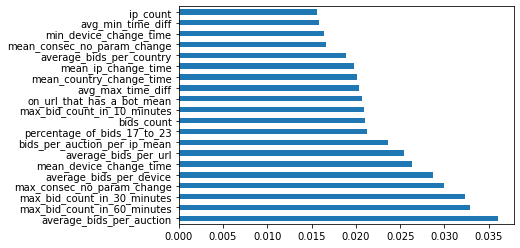

In [175]:
print('Feature importance of Random Forest Model')

feat_importances = pd.Series(RF_bestClf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')





Feature importance of Gradient Boost Model


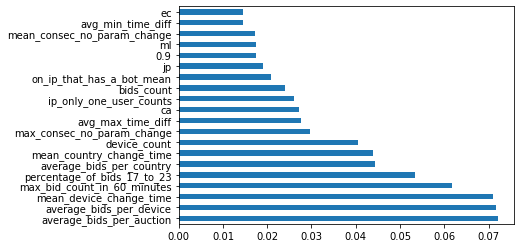

In [176]:
print('Feature importance of Gradient Boost Model')
feat_importances = pd.Series(GB_bestClf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')



Feature importance of XGBoost Model


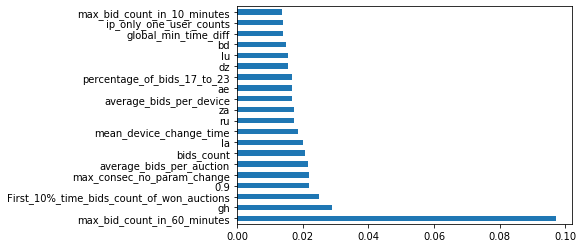

In [177]:
print('Feature importance of XGBoost Model')
feat_importances = pd.Series(XGB_bestClf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')


In [178]:
RF_seleceted_features = SelectFromModel(RF_bestClf, threshold='12*median')
RF_seleceted_features.fit(X_train_CV,y_train_CV)

GB_seleceted_features = SelectFromModel(GB_bestClf, threshold=0.0147)
GB_seleceted_features.fit(X_train_CV,y_train_CV)


XGB_seleceted_features = SelectFromModel(XGB_bestClf, threshold=0.013)
XGB_seleceted_features.fit(X_train_CV,y_train_CV)


SelectFromModel(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                        colsample_bylevel=1, colsample_bynode=1,
                                        colsample_bytree=1, gamma=0,
                                        learning_rate=0.2, max_delta_step=0,
                                        max_depth=8, min_child_weight=1,
                                        missing=None, n_estimators=280,
                                        n_jobs=1, nthread=None,
                                        objective='binary:logistic',
                                        random_state=0,
                                        reg_alpha=0.6000000000000001,
                                        reg_lambda=0.0, scale_pos_weight=1,
                                        seed=None, silent=None, subsample=1,
                                        verbosity=1),
                max_features=None, norm_order=1, prefit=False, threshold=0.013)

In [179]:

embeded_rf_support = RF_seleceted_features.get_support()
embeded_rf_feature = X_train_CV.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'RF selected features')

embeded_GB_support = GB_seleceted_features.get_support()
embeded_GB_feature = X_train_CV.loc[:,embeded_GB_support].columns.tolist()
print(str(len(embeded_GB_feature)), 'GB selected features')

embeded_XGB_support = XGB_seleceted_features.get_support()
embeded_XGB_feature = X_train_CV.loc[:,embeded_XGB_support].columns.tolist()
print(str(len(embeded_XGB_feature)), 'XGB selected features')




26 RF selected features
20 GB selected features
23 XGB selected features


In [180]:
print("RF Features")
print(embeded_rf_feature)
print("GB Features")
print(embeded_GB_feature)
print("XGB Features")
print(embeded_XGB_feature)

RF Features
['bids_count', 'average_bids_per_auction', 'average_bids_per_device', 'average_bids_per_url', 'average_bids_per_country', 'bids_per_auction_per_ip_mean', 'on_ip_that_has_a_bot_mean', 'au', 'first_10%_auction_time_bids', 'first_10%_bids_fraction', 'avg_min_time_diff', 'avg_max_time_diff', '0.1', '0.2', 'max_bid_count_in_10_minutes', 'max_bid_count_in_30_minutes', 'max_bid_count_in_60_minutes', 'max_consec_no_param_change', 'mean_consec_no_param_change', 'mean_country_change_time', 'mean_device_change_time', 'mean_ip_change_time', 'min_device_change_time', 'min_ip_change_time', 'percentage_of_bids_11_to_17', 'percentage_of_bids_17_to_23']
GB Features
['device_count', 'ip_count', 'urls_count', 'average_bids_per_auction', 'average_bids_per_device', 'average_bids_per_url', 'ip_only_one_user_counts', 'bd', 'ca', 'in', 'za', 'avg_min_time_diff', 'avg_max_time_diff', '0.6', 'max_bid_count_in_30_minutes', 'max_bid_count_in_60_minutes', 'max_consec_no_param_change', 'mean_country_cha

In [181]:
RF_X_important_train_CV = RF_seleceted_features.transform(X_train_CV)
RF_X_important_test_CV = RF_seleceted_features.transform(X_test_CV)

GB_X_important_train_CV = GB_seleceted_features.transform(X_train_CV)
GB_X_important_test_CV = GB_seleceted_features.transform(X_test_CV)

XGB_X_important_train_CV = XGB_seleceted_features.transform(X_train_CV)
XGB_X_important_test_CV = XGB_seleceted_features.transform(X_test_CV)

In [182]:
## Training RF
RF_model_important=RandomForestClassifier(random_state=42)
RF_param_grid = { 
    'n_estimators': [100,300,500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7]      
}
RF_classifier_important = GridSearchCV(estimator=RF_model_important, param_grid=RF_param_grid, cv= 5,verbose=3)
RF_classifier_important.fit(RF_X_important_train_CV, y_train_CV)
RF_bestClf_important=RF_classifier_important.best_estimator_


## Training GB
GB_Model_important = GradientBoostingClassifier(random_state=42)
GB_param_grid = {
    'n_estimators': [10,25,50],
    'max_depth': range(3, 6),
    'max_leaf_nodes': range(8, 11)
}
GB_classifier_important = GridSearchCV(estimator=GB_Model_important,
                     param_grid=GB_param_grid,
                     cv=5, verbose=3)
GB_classifier_important.fit(GB_X_important_train_CV, y_train_CV)
GB_bestClf_important=GB_classifier_important.best_estimator_

## Training XGB
XGB_Model_important = xgboost.XGBClassifier()
XGB_param_grid = {
                  'max_depth': np.arange(2,50,2),
                  'learning_rate': np.arange(0.2,2,0.2),
                  'n_estimators': np.arange(20,400,20),
                  'reg_alpha': np.arange(0,2,0.2),
                  'reg_lambda': np.arange(0,2,0.2)
                 }

CV_SSS = StratifiedShuffleSplit(n_splits = 5, test_size = 0.33, random_state=None)
XGB_classifier_important = RandomizedSearchCV(XGB_Model_important, XGB_param_grid, scoring = 'roc_auc', cv = CV_SSS,
                                        n_iter = 40,verbose=3)
XGB_classifier_important.fit(XGB_X_important_train_CV,y_train_CV)
XGB_bestClf_important=XGB_classifier_important.best_estimator_


Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=4, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.960, total=   0.2s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.967, total=   0.3s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.940, total=   0.2s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................
[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.957, total=   0.2s
[CV] max_depth=4, max_features=auto, n_estimators=100 ................
[CV]  max_depth=4, max_features=auto, n_estimators=100, score=0.944, total=   0.3s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.960, total=   0.7s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.964, total=   0.7s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.937, total=   0.7s
[CV] max_depth=4, max_features=auto, n_estimators=300 ................
[CV]  max_depth=4, max_features=auto, n_estimators=300, score=0.957, total= 

[CV]  max_depth=5, max_features=auto, n_estimators=500, score=0.964, total=   1.2s
[CV] max_depth=5, max_features=auto, n_estimators=500 ................
[CV]  max_depth=5, max_features=auto, n_estimators=500, score=0.944, total=   1.2s
[CV] max_depth=5, max_features=auto, n_estimators=500 ................
[CV]  max_depth=5, max_features=auto, n_estimators=500, score=0.957, total=   1.1s
[CV] max_depth=5, max_features=auto, n_estimators=500 ................
[CV]  max_depth=5, max_features=auto, n_estimators=500, score=0.950, total=   1.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=100 ................
[CV]  max_depth=5, max_features=sqrt, n_estimators=100, score=0.957, total=   0.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=100 ................
[CV]  max_depth=5, max_features=sqrt, n_estimators=100, score=0.960, total=   0.2s
[CV] max_depth=5, max_features=sqrt, n_estimators=100 ................
[CV]  max_depth=5, max_features=sqrt, n_estimators=100, score=0.940, total= 

[CV]  max_depth=6, max_features=sqrt, n_estimators=300, score=0.957, total=   1.1s
[CV] max_depth=6, max_features=sqrt, n_estimators=300 ................
[CV]  max_depth=6, max_features=sqrt, n_estimators=300, score=0.967, total=   1.1s
[CV] max_depth=6, max_features=sqrt, n_estimators=300 ................
[CV]  max_depth=6, max_features=sqrt, n_estimators=300, score=0.944, total=   1.2s
[CV] max_depth=6, max_features=sqrt, n_estimators=300 ................
[CV]  max_depth=6, max_features=sqrt, n_estimators=300, score=0.957, total=   1.1s
[CV] max_depth=6, max_features=sqrt, n_estimators=300 ................
[CV]  max_depth=6, max_features=sqrt, n_estimators=300, score=0.953, total=   1.3s
[CV] max_depth=6, max_features=sqrt, n_estimators=500 ................
[CV]  max_depth=6, max_features=sqrt, n_estimators=500, score=0.957, total=   1.7s
[CV] max_depth=6, max_features=sqrt, n_estimators=500 ................
[CV]  max_depth=6, max_features=sqrt, n_estimators=500, score=0.967, total= 

[CV]  max_depth=7, max_features=sqrt, n_estimators=500, score=0.953, total=   2.4s
[CV] max_depth=7, max_features=log2, n_estimators=100 ................
[CV]  max_depth=7, max_features=log2, n_estimators=100, score=0.960, total=   0.3s
[CV] max_depth=7, max_features=log2, n_estimators=100 ................
[CV]  max_depth=7, max_features=log2, n_estimators=100, score=0.964, total=   0.3s
[CV] max_depth=7, max_features=log2, n_estimators=100 ................
[CV]  max_depth=7, max_features=log2, n_estimators=100, score=0.940, total=   0.4s
[CV] max_depth=7, max_features=log2, n_estimators=100 ................
[CV]  max_depth=7, max_features=log2, n_estimators=100, score=0.957, total=   0.4s
[CV] max_depth=7, max_features=log2, n_estimators=100 ................
[CV]  max_depth=7, max_features=log2, n_estimators=100, score=0.953, total=   0.5s
[CV] max_depth=7, max_features=log2, n_estimators=300 ................
[CV]  max_depth=7, max_features=log2, n_estimators=300, score=0.957, total= 

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  2.6min finished


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.954, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.967, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.944, total=   0.0s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.954, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=10 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=10, score=0.947, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.957, total=   0.2s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.974, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.940, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.960, total=   0.1s
[CV] max_depth=3, max_leaf_nodes=8, n_estimators=25 ..................
[CV]  max_depth=3, max_leaf_nodes=8, n_estimators=25, score=0.957, total=   0.1s
[CV] ma

[CV]  max_depth=4, max_leaf_nodes=8, n_estimators=50, score=0.944, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=8, n_estimators=50 ..................
[CV]  max_depth=4, max_leaf_nodes=8, n_estimators=50, score=0.967, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=8, n_estimators=50 ..................
[CV]  max_depth=4, max_leaf_nodes=8, n_estimators=50, score=0.960, total=   0.2s
[CV] max_depth=4, max_leaf_nodes=9, n_estimators=10 ..................
[CV]  max_depth=4, max_leaf_nodes=9, n_estimators=10, score=0.960, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, n_estimators=10 ..................
[CV]  max_depth=4, max_leaf_nodes=9, n_estimators=10, score=0.964, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, n_estimators=10 ..................
[CV]  max_depth=4, max_leaf_nodes=9, n_estimators=10, score=0.940, total=   0.0s
[CV] max_depth=4, max_leaf_nodes=9, n_estimators=10 ..................
[CV]  max_depth=4, max_leaf_nodes=9, n_estimators=10, score=0.960, total=   0.0s
[CV] ma

[CV] max_depth=5, max_leaf_nodes=9, n_estimators=25 ..................
[CV]  max_depth=5, max_leaf_nodes=9, n_estimators=25, score=0.947, total=   0.1s
[CV] max_depth=5, max_leaf_nodes=9, n_estimators=25 ..................
[CV]  max_depth=5, max_leaf_nodes=9, n_estimators=25, score=0.967, total=   0.1s
[CV] max_depth=5, max_leaf_nodes=9, n_estimators=25 ..................
[CV]  max_depth=5, max_leaf_nodes=9, n_estimators=25, score=0.953, total=   0.1s
[CV] max_depth=5, max_leaf_nodes=9, n_estimators=50 ..................
[CV]  max_depth=5, max_leaf_nodes=9, n_estimators=50, score=0.960, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, n_estimators=50 ..................
[CV]  max_depth=5, max_leaf_nodes=9, n_estimators=50, score=0.970, total=   0.2s
[CV] max_depth=5, max_leaf_nodes=9, n_estimators=50 ..................
[CV]  max_depth=5, max_leaf_nodes=9, n_estimators=50, score=0.947, total=   0.3s
[CV] max_depth=5, max_leaf_nodes=9, n_estimators=50 ..................
[CV]  max_depth=5

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   19.6s finished


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] reg_lambda=1.0, reg_alpha=1.4000000000000001, n_estimators=280, max_depth=20, learning_rate=0.8 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  reg_lambda=1.0, reg_alpha=1.4000000000000001, n_estimators=280, max_depth=20, learning_rate=0.8, score=0.940, total=   0.3s
[CV] reg_lambda=1.0, reg_alpha=1.4000000000000001, n_estimators=280, max_depth=20, learning_rate=0.8 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  reg_lambda=1.0, reg_alpha=1.4000000000000001, n_estimators=280, max_depth=20, learning_rate=0.8, score=0.934, total=   0.4s
[CV] reg_lambda=1.0, reg_alpha=1.4000000000000001, n_estimators=280, max_depth=20, learning_rate=0.8 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV]  reg_lambda=1.0, reg_alpha=1.4000000000000001, n_estimators=280, max_depth=20, learning_rate=0.8, score=0.927, total=   0.4s
[CV] reg_lambda=1.0, reg_alpha=1.4000000000000001, n_estimators=280, max_depth=20, learning_rate=0.8 
[CV]  reg_lambda=1.0, reg_alpha=1.4000000000000001, n_estimators=280, max_depth=20, learning_rate=0.8, score=0.937, total=   0.4s
[CV] reg_lambda=1.0, reg_alpha=1.4000000000000001, n_estimators=280, max_depth=20, learning_rate=0.8 
[CV]  reg_lambda=1.0, reg_alpha=1.4000000000000001, n_estimators=280, max_depth=20, learning_rate=0.8, score=0.900, total=   0.4s
[CV] reg_lambda=1.2000000000000002, reg_alpha=1.6, n_estimators=60, max_depth=34, learning_rate=1.2 
[CV]  reg_lambda=1.2000000000000002, reg_alpha=1.6, n_estimators=60, max_depth=34, learning_rate=1.2, score=0.929, total=   0.1s
[CV] reg_lambda=1.2000000000000002, reg_alpha=1.6, n_estimators=60, max_depth=34, learning_rate=1.2 
[CV]  reg_lambda=1.2000000000000002, reg_alpha=1.6, n_estimators=60, max_de

[CV]  reg_lambda=0.2, reg_alpha=1.4000000000000001, n_estimators=60, max_depth=2, learning_rate=0.4, score=0.940, total=   0.1s
[CV] reg_lambda=0.2, reg_alpha=1.4000000000000001, n_estimators=60, max_depth=2, learning_rate=0.4 
[CV]  reg_lambda=0.2, reg_alpha=1.4000000000000001, n_estimators=60, max_depth=2, learning_rate=0.4, score=0.926, total=   0.1s
[CV] reg_lambda=0.2, reg_alpha=1.4000000000000001, n_estimators=60, max_depth=2, learning_rate=0.4 
[CV]  reg_lambda=0.2, reg_alpha=1.4000000000000001, n_estimators=60, max_depth=2, learning_rate=0.4, score=0.923, total=   0.1s
[CV] reg_lambda=0.2, reg_alpha=1.4000000000000001, n_estimators=60, max_depth=2, learning_rate=0.4 
[CV]  reg_lambda=0.2, reg_alpha=1.4000000000000001, n_estimators=60, max_depth=2, learning_rate=0.4, score=0.927, total=   0.1s
[CV] reg_lambda=1.0, reg_alpha=1.6, n_estimators=300, max_depth=2, learning_rate=1.4000000000000001 
[CV]  reg_lambda=1.0, reg_alpha=1.6, n_estimators=300, max_depth=2, learning_rate=1.400

[CV]  reg_lambda=0.6000000000000001, reg_alpha=0.4, n_estimators=280, max_depth=42, learning_rate=1.4000000000000001, score=0.827, total=   0.3s
[CV] reg_lambda=0.8, reg_alpha=1.8, n_estimators=220, max_depth=20, learning_rate=1.4000000000000001 
[CV]  reg_lambda=0.8, reg_alpha=1.8, n_estimators=220, max_depth=20, learning_rate=1.4000000000000001, score=0.880, total=   0.2s
[CV] reg_lambda=0.8, reg_alpha=1.8, n_estimators=220, max_depth=20, learning_rate=1.4000000000000001 
[CV]  reg_lambda=0.8, reg_alpha=1.8, n_estimators=220, max_depth=20, learning_rate=1.4000000000000001, score=0.924, total=   0.2s
[CV] reg_lambda=0.8, reg_alpha=1.8, n_estimators=220, max_depth=20, learning_rate=1.4000000000000001 
[CV]  reg_lambda=0.8, reg_alpha=1.8, n_estimators=220, max_depth=20, learning_rate=1.4000000000000001, score=0.938, total=   0.2s
[CV] reg_lambda=0.8, reg_alpha=1.8, n_estimators=220, max_depth=20, learning_rate=1.4000000000000001 
[CV]  reg_lambda=0.8, reg_alpha=1.8, n_estimators=220, ma

[CV]  reg_lambda=1.6, reg_alpha=1.0, n_estimators=220, max_depth=22, learning_rate=1.0, score=0.908, total=   0.3s
[CV] reg_lambda=1.6, reg_alpha=1.0, n_estimators=220, max_depth=22, learning_rate=1.0 
[CV]  reg_lambda=1.6, reg_alpha=1.0, n_estimators=220, max_depth=22, learning_rate=1.0, score=0.868, total=   0.3s
[CV] reg_lambda=1.4000000000000001, reg_alpha=0.8, n_estimators=300, max_depth=44, learning_rate=1.2 
[CV]  reg_lambda=1.4000000000000001, reg_alpha=0.8, n_estimators=300, max_depth=44, learning_rate=1.2, score=0.913, total=   0.4s
[CV] reg_lambda=1.4000000000000001, reg_alpha=0.8, n_estimators=300, max_depth=44, learning_rate=1.2 
[CV]  reg_lambda=1.4000000000000001, reg_alpha=0.8, n_estimators=300, max_depth=44, learning_rate=1.2, score=0.923, total=   0.4s
[CV] reg_lambda=1.4000000000000001, reg_alpha=0.8, n_estimators=300, max_depth=44, learning_rate=1.2 
[CV]  reg_lambda=1.4000000000000001, reg_alpha=0.8, n_estimators=300, max_depth=44, learning_rate=1.2, score=0.925, t

[CV]  reg_lambda=1.2000000000000002, reg_alpha=0.6000000000000001, n_estimators=140, max_depth=16, learning_rate=0.8, score=0.924, total=   0.2s
[CV] reg_lambda=1.2000000000000002, reg_alpha=0.6000000000000001, n_estimators=140, max_depth=16, learning_rate=0.8 
[CV]  reg_lambda=1.2000000000000002, reg_alpha=0.6000000000000001, n_estimators=140, max_depth=16, learning_rate=0.8, score=0.928, total=   0.2s
[CV] reg_lambda=1.2000000000000002, reg_alpha=0.6000000000000001, n_estimators=140, max_depth=16, learning_rate=0.8 
[CV]  reg_lambda=1.2000000000000002, reg_alpha=0.6000000000000001, n_estimators=140, max_depth=16, learning_rate=0.8, score=0.874, total=   0.2s
[CV] reg_lambda=1.4000000000000001, reg_alpha=1.0, n_estimators=240, max_depth=12, learning_rate=1.0 
[CV]  reg_lambda=1.4000000000000001, reg_alpha=1.0, n_estimators=240, max_depth=12, learning_rate=1.0, score=0.908, total=   0.3s
[CV] reg_lambda=1.4000000000000001, reg_alpha=1.0, n_estimators=240, max_depth=12, learning_rate=1.

[CV]  reg_lambda=0.0, reg_alpha=1.0, n_estimators=340, max_depth=32, learning_rate=1.2, score=0.894, total=   0.3s
[CV] reg_lambda=1.2000000000000002, reg_alpha=1.6, n_estimators=100, max_depth=8, learning_rate=0.2 
[CV]  reg_lambda=1.2000000000000002, reg_alpha=1.6, n_estimators=100, max_depth=8, learning_rate=0.2, score=0.948, total=   0.2s
[CV] reg_lambda=1.2000000000000002, reg_alpha=1.6, n_estimators=100, max_depth=8, learning_rate=0.2 
[CV]  reg_lambda=1.2000000000000002, reg_alpha=1.6, n_estimators=100, max_depth=8, learning_rate=0.2, score=0.938, total=   0.2s
[CV] reg_lambda=1.2000000000000002, reg_alpha=1.6, n_estimators=100, max_depth=8, learning_rate=0.2 
[CV]  reg_lambda=1.2000000000000002, reg_alpha=1.6, n_estimators=100, max_depth=8, learning_rate=0.2, score=0.926, total=   0.2s
[CV] reg_lambda=1.2000000000000002, reg_alpha=1.6, n_estimators=100, max_depth=8, learning_rate=0.2 
[CV]  reg_lambda=1.2000000000000002, reg_alpha=1.6, n_estimators=100, max_depth=8, learning_ra

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed:   53.1s finished


## 8.2 Classification Reports

In [183]:
expected_test = y_test_CV

RF_predicted_test_important = RF_bestClf_important.predict(RF_X_important_test_CV)
GB_predicted_test_important = GB_bestClf_important.predict(GB_X_important_test_CV)
XGB_predicted_test_important = XGB_bestClf_important.predict(XGB_X_important_test_CV)

print("RANDOM FOREST CLASSIFICATION REPORT")
print(classification_report(expected_test, RF_predicted_test_important))
print("-----------------------------")

print("GRADIENT BOOST CLASSIFICATION REPORT")
print(classification_report(expected_test, GB_predicted_test_important))
print("-----------------------------")

print("GRADIENT BOOST CLASSIFICATION REPORT")
print(classification_report(expected_test, XGB_predicted_test_important))
print("-----------------------------")

RANDOM FOREST CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98       487
         1.0       0.60      0.18      0.27        17

    accuracy                           0.97       504
   macro avg       0.79      0.59      0.63       504
weighted avg       0.96      0.97      0.96       504

-----------------------------
GRADIENT BOOST CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       487
         1.0       0.38      0.18      0.24        17

    accuracy                           0.96       504
   macro avg       0.67      0.58      0.61       504
weighted avg       0.95      0.96      0.96       504

-----------------------------
GRADIENT BOOST CLASSIFICATION REPORT
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98       487
         1.0       0.62      0.29      0.40        17

    accuracy

## 8.3 Average Precision

In [184]:
RF_predicted_probs_test_important= RF_bestClf_important.predict_proba(RF_X_important_test_CV)
GB_predicted_probs_test_important = GB_bestClf_important.predict_proba(GB_X_important_test_CV)
XGB_predicted_probs_test_important = XGB_bestClf_important.predict_proba(XGB_X_important_test_CV)


print("AVERAGE PRECISION RANDOM FOREST")
print(average_precision_score(y_test_CV.astype('int'),RF_predicted_probs_test_important[:,1]))


print("AVERAGE PRECISION GRADIENT BOOST")
print(average_precision_score(y_test_CV.astype('int'),GB_predicted_probs_test_important[:,1]))


print("AVERAGE PRECISION XGBOOST")
print(average_precision_score(y_test_CV.astype('int'),XGB_predicted_probs_test_important[:,1]))

AVERAGE PRECISION RANDOM FOREST
0.4650597583219728
AVERAGE PRECISION GRADIENT BOOST
0.444362446179303
AVERAGE PRECISION XGBOOST
0.4697689381955956


RF Graph


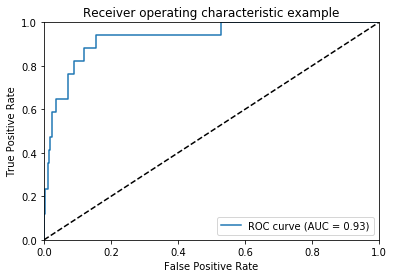

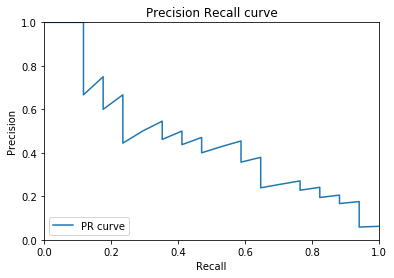

GB Graph


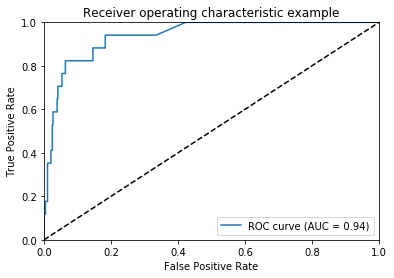

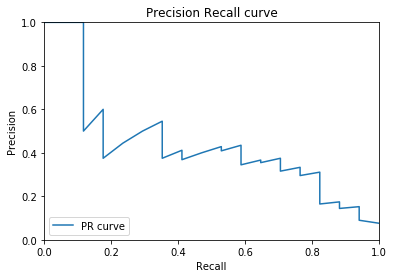

XGB Graph


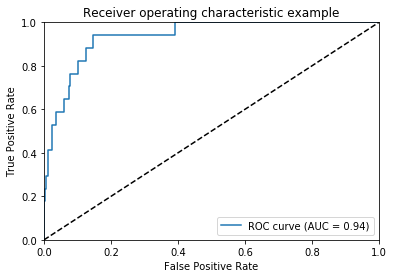

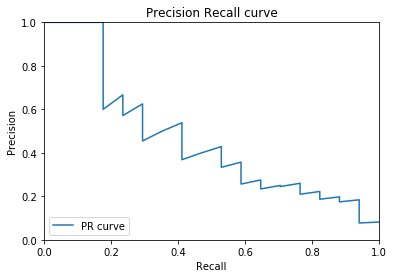

In [185]:
print("RF Graph")
plotMetrics(y_test_CV.astype('int'),RF_predicted_probs_test_important[:,1])

print("GB Graph")
plotMetrics(y_test_CV.astype('int'),GB_predicted_probs_test_important[:,1])


print("XGB Graph")
plotMetrics(y_test_CV.astype('int'),XGB_predicted_probs_test_important[:,1])

## 8.4 Cross Validation

In [186]:
scoring = ['average_precision', 'roc_auc']
RF_scores = cross_validate(RF_bestClf_important, RF_X_important_test_CV, y_test_CV, scoring=scoring,return_train_score=True)
GB_scores = cross_validate(GB_bestClf_important, GB_X_important_test_CV, y_test_CV, scoring=scoring,return_train_score=True)
XGB_score = cross_validate(XGB_bestClf_important,XGB_X_important_test_CV, y_test_CV, scoring=scoring,return_train_score=True)

In [187]:

print("RANDOM FOREST CROSS VALIDATION")
print("-------------------------------")
print("average_precision", RF_scores['test_average_precision'].mean())
print("ROC_AUC", RF_scores['test_roc_auc'].mean())
print("-------------------------------")

print("GRADIENT BOOST CROSS VALIDATION")
print("-------------------------------")
print("average_precision", GB_scores['test_average_precision'].mean())
print("ROC_AUC", GB_scores['test_roc_auc'].mean())
print("-------------------------------")

print("XGBOOST CROSS VALIDATION")
print("-------------------------------")
print("average_precision", XGB_score['test_average_precision'].mean())
print("ROC_AUC", XGB_score['test_roc_auc'].mean())
print("-------------------------------")

RANDOM FOREST CROSS VALIDATION
-------------------------------
average_precision 0.2525973223624165
ROC_AUC 0.845490567360965
-------------------------------
GRADIENT BOOST CROSS VALIDATION
-------------------------------
average_precision 0.20863640185112167
ROC_AUC 0.8048004768917876
-------------------------------
XGBOOST CROSS VALIDATION
-------------------------------
average_precision 0.22539025151094116
ROC_AUC 0.8567133038782524
-------------------------------


# 9. Models Error Analysis

In [188]:
!pip install shap

     |████████████████████████████████| 276kB 362kB/s eta 0:00:01
  Created wheel for shap: filename=shap-0.35.0-cp37-cp37m-macosx_10_9_x86_64.whl size=310664 sha256=dd5a9f6b7f2cf8cf365fe7deede9955d4d8b7dceefeaee2d6d6b90210a387300
  Stored in directory: /Users/yonatan/Library/Caches/pip/wheels/e7/f7/0f/b57055080cf8894906b3bd3616d2fc2bfd0b12d5161bcb24ac
Successfully built shap


In [189]:
from imblearn.over_sampling import RandomOverSampler as ROS
from imblearn.over_sampling import SMOTE
import shap
from sklearn.neighbors import NearestNeighbors

## 9.1 Training Best Models

In [190]:
train = pd.read_csv('./Data-Science/Data/Train_Clean_All_Features')
X= train
Y = X['outcome']
X.drop('outcome',1,inplace=True)
X.drop('bidder_id',1,inplace=True)
X.drop('Unnamed: 0',1,inplace=True)

In [191]:
X.head()

,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,...,mean_country_change_time,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11
0,False,0,1,0,1,39,23,1,19,2,...,7165.0,35183.0,28146.0,28720.0,1133.0,60.0,20.512821,25.641026,23.076923,30.769231
1,True,0,0,0,0,3137,352,1,540,80,...,103.0,88.0,86.0,0.0,0.0,0.0,25.502072,34.427797,22.951865,17.118266
2,False,0,0,0,0,6,1,1,6,1,...,15322.0,50299.0,50299.0,319.5,190.0,190.0,0.000000,50.000000,33.333333,16.666667
3,True,0,0,0,0,5,4,1,5,1,...,15322.0,24405.0,24405.0,319.5,1720.0,1720.0,0.000000,60.000000,40.000000,0.000000
4,False,0,1,0,1,255,74,1,82,9,...,1103.0,968.0,1074.0,101.0,101.0,101.0,19.607843,12.941176,52.941176,14.509804


In [192]:
x_train, x_test, y_train, y_test = train_test_split(X, Y ,random_state=4)

In [193]:
#number of bots in x_test, around 5% - same ratio as in x_train
sum(y_test)

25.0

In [194]:
xgb_model = xgboost.XGBClassifier(objective="binary:logistic", n_estimators=50, random_state=42, eval_metric=["auc", "error", "error@0.6"])
rf = RandomForestClassifier(n_estimators=800, max_depth=8, max_features='auto', class_weight={1.0:20, 0:1})


In [195]:
rfc = RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [500,800],
    'max_features': ['auto'],
    'max_depth' : [10,20],
    'criterion': ['entropy'],
    'class_weight': [{1.0:20, 0.0:1}, {1.0:40, 0.0:1}] 
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,verbose=10)
CV_rfc.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=500 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=500, score=0.957, total=   1.6s
[CV] class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=500 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=500, score=0.950, total=   1.8s
[CV] class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=500 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.4s remaining:    0.0s


[CV]  class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=500, score=0.960, total=   1.5s
[CV] class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=500 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    5.0s remaining:    0.0s


[CV]  class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=500, score=0.947, total=   2.1s
[CV] class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=500 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    7.1s remaining:    0.0s


[CV]  class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=500, score=0.960, total=   1.6s
[CV] class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=800 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    8.7s remaining:    0.0s


[CV]  class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=800, score=0.957, total=   2.3s
[CV] class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=800 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   11.1s remaining:    0.0s


[CV]  class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=800, score=0.947, total=   2.6s
[CV] class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=800 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   13.7s remaining:    0.0s


[CV]  class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=800, score=0.964, total=   2.2s
[CV] class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=800 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   15.9s remaining:    0.0s


[CV]  class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=800, score=0.950, total=   2.5s
[CV] class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=800 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:   18.4s remaining:    0.0s


[CV]  class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=10, max_features=auto, n_estimators=800, score=0.957, total=   2.6s
[CV] class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=20, max_features=auto, n_estimators=500 
[CV]  class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=20, max_features=auto, n_estimators=500, score=0.957, total=   1.5s
[CV] class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=20, max_features=auto, n_estimators=500 
[CV]  class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=20, max_features=auto, n_estimators=500, score=0.950, total=   1.6s
[CV] class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=20, max_features=auto, n_estimators=500 
[CV]  class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=20, max_features=auto, n_estimators=500, score=0.957, total=   2.1s
[CV] class_weight={1.0: 20, 0.0: 1}, criterion=entropy, max_depth=20, max_features=auto, n_estimators=500 
[CV]  class_weight={1.0: 20, 0.0

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [196]:
bestClf = CV_rfc.best_estimator_
bestClf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0.0: 1, 1.0: 20}, criterion='entropy',
                       max_depth=10, max_features='auto', max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       n_estimators=500, n_jobs=None, oob_score=False,
                       random_state=42, verbose=0, warm_start=False)

In [197]:
xgbc = xgboost.XGBClassifier(random_state=16)
param_grid = {
    'n_estimators': [500,800],
    'eval_metric': ["auc"],
    'max_depth' : [ 10,30 ],
    'scale_pos_weight' : [ 10, 20]
}
xgbc_CV = GridSearchCV(estimator=xgbc, param_grid=param_grid, cv= 5,verbose=10)
xgbc_CV.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=10, score=0.960, total=   7.5s
[CV] eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    7.5s remaining:    0.0s


[CV]  eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=10, score=0.964, total=   7.4s
[CV] eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   14.9s remaining:    0.0s


[CV]  eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=10, score=0.964, total=   7.7s
[CV] eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=10 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   22.7s remaining:    0.0s


[CV]  eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=10, score=0.950, total=   7.4s
[CV] eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=10 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:   30.1s remaining:    0.0s


[CV]  eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=10, score=0.967, total=   7.8s
[CV] eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=20 


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:   37.8s remaining:    0.0s


[CV]  eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=20, score=0.970, total=   8.1s
[CV] eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=20 


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:   45.9s remaining:    0.0s


[CV]  eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=20, score=0.957, total=   7.7s
[CV] eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=20 


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:   53.6s remaining:    0.0s


[CV]  eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=20, score=0.964, total=   7.7s
[CV] eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=20 


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.0min remaining:    0.0s


[CV]  eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=20, score=0.940, total=   7.7s
[CV] eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=20 


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.2min remaining:    0.0s


[CV]  eval_metric=auc, max_depth=10, n_estimators=500, scale_pos_weight=20, score=0.963, total=   8.1s
[CV] eval_metric=auc, max_depth=10, n_estimators=800, scale_pos_weight=10 
[CV]  eval_metric=auc, max_depth=10, n_estimators=800, scale_pos_weight=10, score=0.960, total=  11.1s
[CV] eval_metric=auc, max_depth=10, n_estimators=800, scale_pos_weight=10 
[CV]  eval_metric=auc, max_depth=10, n_estimators=800, scale_pos_weight=10, score=0.964, total=  10.7s
[CV] eval_metric=auc, max_depth=10, n_estimators=800, scale_pos_weight=10 
[CV]  eval_metric=auc, max_depth=10, n_estimators=800, scale_pos_weight=10, score=0.967, total=  11.1s
[CV] eval_metric=auc, max_depth=10, n_estimators=800, scale_pos_weight=10 
[CV]  eval_metric=auc, max_depth=10, n_estimators=800, scale_pos_weight=10, score=0.950, total=  12.3s
[CV] eval_metric=auc, max_depth=10, n_estimators=800, scale_pos_weight=10 
[CV]  eval_metric=auc, max_depth=10, n_estimators=800, scale_pos_weight=10, score=0.967, total=  14.4s
[CV] ev

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  6.6min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=16, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'eval_metric': ['auc'], 'max_depth': [10, 30],
                         'n_estimators': [500, 800],
                         'scale_pos_weight': [10, 2

In [198]:
best_xgb = xgbc_CV.best_estimator_
best_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='auc',
              gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=30,
              min_child_weight=1, missing=None, n_estimators=800, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=16,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=10, seed=None,
              silent=None, subsample=1, verbosity=1)

In [199]:
#lets try to predict probabilities
xgb_prob_pred = best_xgb.predict_proba(x_test)[:,1]
rf_prob_pred = bestClf.predict_proba(x_test)[:,1]

#models average precision score on test
print('xgb: ' + str(average_precision_score(y_test, xgb_prob_pred)))
print('RF: ' + str(average_precision_score(y_test, rf_prob_pred)))

xgb: 0.6110511454129429
RF: 0.6360363593561612


## 9.2 Observing Prediction Errors

In [200]:
#predict classification
xgb_pred = best_xgb.predict(x_test)
rf_pred = bestClf.predict(x_test)


In [201]:
#take a look at the bidders that xgb failed to classify right
wrong_xgb = x_test[xgb_pred != y_test]
wrong_xgb.head()

,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,...,mean_country_change_time,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11
1582,False,0,0,0,1,1370,336,1,312,49,...,228.0,203.0,195.0,0.0,0.0,0.0,10.656934,48.394161,26.131387,14.817518
1787,False,0,1,0,1,418,70,1,120,7,...,1877.0,703.0,680.0,7.0,0.0,0.0,30.143541,36.602871,12.200957,21.052632
1498,True,0,0,0,0,73357,1623,1,1575,59,...,16.0,13.0,12.0,0.0,0.0,0.0,20.492932,36.356449,24.857887,18.292733
1728,False,0,1,0,0,602,171,1,164,41,...,2031.0,1632.0,1550.0,4.0,1.0,1.0,30.564784,28.571429,17.109635,23.754153
908,False,0,1,0,1,194,24,1,6,4,...,8854.0,8854.0,8500.0,147.0,147.0,147.0,11.340206,57.731959,24.226804,6.701031


In [202]:
wrong_rf =x_test[rf_pred != y_test]
wrong_rf.head()

,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,...,mean_country_change_time,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11
630,False,0,1,0,1,8016,112,1,290,4,...,60879.0,118.0,114.0,1.0,0.0,0.0,28.268463,39.321357,17.976547,14.433633
1291,True,0,0,0,0,4569,275,1,408,29,...,252.0,202.0,194.0,0.0,0.0,0.0,21.733421,34.624644,23.725104,19.916831
1626,False,0,0,0,0,241,10,1,2,3,...,43216.0,33.0,17262.0,19752.0,33.0,1968.0,57.261411,0.414938,0.414938,41.908714
1618,False,0,1,0,1,5533,287,1,350,16,...,828.0,176.0,163.0,0.0,0.0,0.0,19.663835,44.858124,14.422556,21.055485
1728,False,0,1,0,0,602,171,1,164,41,...,2031.0,1632.0,1550.0,4.0,1.0,1.0,30.564784,28.571429,17.109635,23.754153


In [203]:
print(sum(y_test))
print(y_test[ xgb_pred != y_test])

25.0
1582    0.0
1787    0.0
1498    0.0
1728    1.0
908     1.0
703     1.0
1631    1.0
1512    0.0
414     1.0
1535    1.0
261     1.0
1676    1.0
1756    0.0
1781    0.0
175     1.0
559     0.0
1414    1.0
717     0.0
609     0.0
2006    1.0
1313    1.0
493     1.0
Name: outcome, dtype: float64


## 9.3 Comparing Missed Bidders To Bots & Humans

In [204]:
x_train['outcome'] = y_train


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [205]:
x_train.head()

,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,...,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11,outcome
1172,False,0,1,0,1,6,5,1,3,3,...,7735.0,21094.0,5643.0,5643.0,1022.0,66.666667,0.000000,0.000000,33.333333,0.0
645,False,0,1,0,0,1,1,1,1,1,...,11968.0,11621.0,319.5,128.0,92.0,0.000000,0.000000,100.000000,0.000000,0.0
486,False,0,0,0,0,164,62,1,75,26,...,5654.0,5431.0,40.0,18.0,8.0,23.170732,47.560976,18.292683,10.975610,0.0
280,False,0,1,0,1,1,1,1,1,1,...,11968.0,11621.0,319.5,128.0,92.0,0.000000,0.000000,0.000000,100.000000,0.0
788,False,0,1,1,0,6,6,1,5,3,...,40222.0,40222.0,34062.0,8775.0,8775.0,33.333333,50.000000,0.000000,16.666667,0.0


In [206]:
humans = x_train[x_train['outcome'] == 0]
humans.describe()

,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,...,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11,outcome
count,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,...,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.000000,1431.0
mean,0.106918,0.646401,0.080363,0.361985,1423.411600,56.053110,0.982530,71.295597,12.249476,564.484976,...,18681.512928,18941.650594,6406.228162,6606.508036,6296.269741,24.116502,36.309687,16.569771,21.257009,0.0
std,0.309117,0.478254,0.271950,0.480742,16277.336242,134.731486,0.131061,178.564948,22.133162,4495.281798,...,20595.110997,21022.112210,16074.962959,16252.484892,15963.211722,24.489837,27.735361,20.894889,22.694611,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,...,3616.000000,3202.000000,42.500000,7.000000,4.000000,0.000000,19.702216,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.000000,0.000000,14.000000,9.000000,1.000000,7.000000,3.000000,11.000000,...,11968.000000,11621.000000,319.500000,128.000000,92.000000,21.917808,34.877384,12.538656,18.556701,0.0
75%,0.000000,1.000000,0.000000,1.000000,137.500000,41.500000,1.000000,51.500000,10.000000,87.500000,...,24265.000000,26277.000000,1321.000000,1708.500000,1259.000000,31.250000,50.000000,22.727273,28.014328,0.0
max,1.000000,1.000000,1.000000,1.000000,515033.000000,1621.000000,1.000000,2618.000000,163.000000,109159.000000,...,86329.000000,86227.000000,85820.000000,85820.000000,85820.000000,100.000000,100.000000,100.000000,100.000000,0.0


In [207]:
bots = x_train[x_train['outcome'] == 1]
bots.describe()

,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,...,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11,outcome
count,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,78.000000,...,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.000000,78.0
mean,0.128205,0.602564,0.102564,0.358974,4703.705128,147.961538,1.0,171.564103,26.269231,2837.051282,...,3181.717949,2533.705128,1980.423077,920.820513,1137.846154,27.543993,28.989952,20.868417,22.597639,1.0
std,0.336482,0.492535,0.305352,0.482805,18737.552118,204.732099,0.0,237.821803,31.476098,12910.434921,...,9925.879589,9040.935175,10276.237044,6356.939120,8226.693202,20.090232,21.617907,17.897109,16.948608,0.0
min,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,...,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,307.250000,24.000000,1.0,5.500000,3.250000,84.250000,...,263.000000,181.250000,0.000000,0.000000,0.000000,17.267644,11.378061,10.738166,13.994362,1.0
50%,0.000000,1.000000,0.000000,0.000000,757.000000,77.000000,1.0,77.500000,13.000000,290.000000,...,561.000000,445.000000,1.000000,0.000000,0.000000,23.006960,29.663457,17.735131,21.962422,1.0
75%,0.000000,1.000000,0.000000,1.000000,2267.250000,163.500000,1.0,229.000000,39.000000,994.250000,...,1285.500000,1138.000000,11.000000,1.000000,1.000000,33.867977,36.800717,26.772078,25.633495,1.0
max,1.000000,1.000000,1.000000,1.000000,161935.000000,1018.000000,1.0,1144.000000,178.000000,111918.000000,...,55734.000000,72100.000000,72100.000000,55734.000000,72100.000000,85.137925,100.000000,100.000000,100.000000,1.0


In [208]:
bots_mean = bots.describe().loc['mean']
human_mean = humans.describe().loc['mean']
names = x_train.columns

## 9.4 SHAP & Important Features 


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


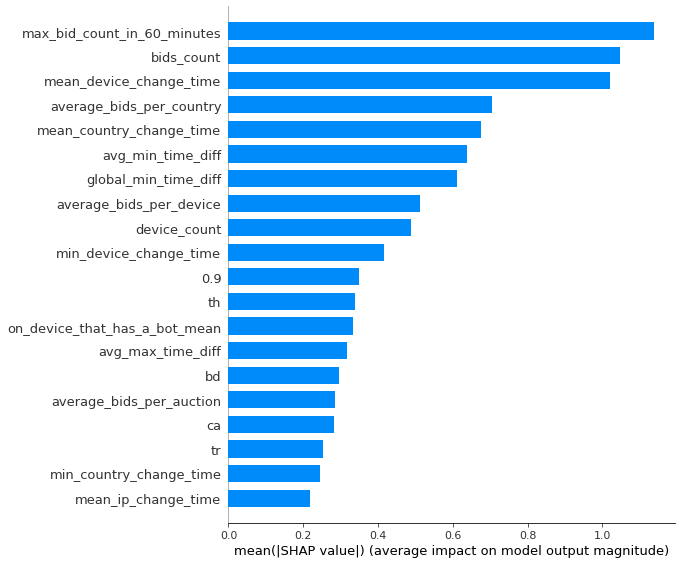

In [209]:
#SHAP
x_train.drop('outcome', axis=1, inplace=True)
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type='bar')

In [210]:
def shap_plot(S,model,j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [211]:
shap.initjs()
S = x_test[y_test != wrong_xgb]
shap_plot(S, best_xgb, 0)

In [212]:
#kernelExplainer
rf_shap_values = shap.KernelExplainer(bestClf.predict ,wrong_rf)

In [213]:
wrong_rf.astype('float64')

,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,...,mean_country_change_time,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11
630,0.0,0.0,1.0,0.0,1.0,8016.0,112.0,1.0,290.0,4.0,...,60879.0,118.0,114.0,1.0,0.0,0.0,28.268463,39.321357,17.976547,14.433633
1291,1.0,0.0,0.0,0.0,0.0,4569.0,275.0,1.0,408.0,29.0,...,252.0,202.0,194.0,0.0,0.0,0.0,21.733421,34.624644,23.725104,19.916831
1626,0.0,0.0,0.0,0.0,0.0,241.0,10.0,1.0,2.0,3.0,...,43216.0,33.0,17262.0,19752.0,33.0,1968.0,57.261411,0.414938,0.414938,41.908714
1618,0.0,0.0,1.0,0.0,1.0,5533.0,287.0,1.0,350.0,16.0,...,828.0,176.0,163.0,0.0,0.0,0.0,19.663835,44.858124,14.422556,21.055485
1728,0.0,0.0,1.0,0.0,0.0,602.0,171.0,1.0,164.0,41.0,...,2031.0,1632.0,1550.0,4.0,1.0,1.0,30.564784,28.571429,17.109635,23.754153
908,0.0,0.0,1.0,0.0,1.0,194.0,24.0,1.0,6.0,4.0,...,8854.0,8854.0,8500.0,147.0,147.0,147.0,11.340206,57.731959,24.226804,6.701031
98,0.0,1.0,0.0,0.0,0.0,922.0,28.0,1.0,114.0,2.0,...,3943.0,930.0,876.0,291.0,0.0,0.0,11.496746,21.800434,31.236443,35.466377
703,0.0,0.0,0.0,0.0,1.0,3057.0,365.0,1.0,147.0,83.0,...,374.0,368.0,324.0,0.0,0.0,0.0,15.865227,32.188420,29.506052,22.440301
1703,1.0,0.0,0.0,0.0,0.0,432.0,37.0,1.0,8.0,4.0,...,10647.0,2453.0,2635.0,35.0,0.0,1.0,44.444444,23.842593,8.796296,22.916667
1631,0.0,0.0,1.0,0.0,1.0,6540.0,269.0,1.0,408.0,65.0,...,333.0,141.0,138.0,0.0,0.0,0.0,28.654434,34.954128,14.006116,22.385321


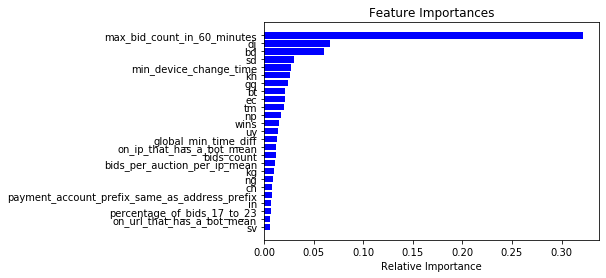

In [214]:
importances = best_xgb.feature_importances_
indices = np.argsort(importances)
features = x_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices[len(indices)-25:len(indices)])), importances[indices[len(indices)-25:len(indices)]], color='b', align='center')
plt.yticks(range(len(indices[len(indices)-25:len(indices)])), [features[i] for i in indices[len(indices)-25:len(indices)]])
plt.xlabel('Relative Importance')
plt.show()

In [215]:
important_features = features[indices[len(indices)-50:len(indices)]]

In [216]:
values = importances[indices[len(indices)-50:len(indices)]]
sum(values)

0.8770334974396974

In [217]:
xgb_error_features = (x_test[xgb_pred != y_test])[important_features]
xgb_error_features

,last_10%_auction_time_bids,avg_min_time_diff,gm,zw,ca,pk,bh,on_device_that_has_a_bot_mean,Unnamed: 0_y,ip_count,...,tm,ec,bt,gq,kh,min_device_change_time,sd,bd,dj,max_bid_count_in_60_minutes
1582,129.0,8.313205e+11,0.000000,0.000000,0.079167,0.000000,0.000000,0.955128,114,1104,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,299.0
1787,71.0,1.133195e+12,0.000000,0.000000,0.030864,0.000000,0.000000,0.975000,1507,270,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,27.0
1498,14662.0,3.263255e+12,0.000000,0.000000,0.012139,0.000000,0.000000,0.747302,813,24544,...,0.0,0.014505,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,1890.0
1728,220.0,6.794304e+12,0.000000,0.000000,0.031250,0.015625,0.005208,0.987805,1243,418,...,0.0,0.000000,0.0,0.0,0.000000,1.0,0.015625,0.015625,0.000000,13.0
908,10.0,3.226718e+11,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,54,9,...,0.0,0.000000,0.0,0.0,0.000000,147.0,0.000000,0.000000,0.000000,41.0
703,629.0,2.159752e+12,0.000000,0.052411,0.111111,0.000000,0.000000,0.986395,554,1482,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.002096,0.000000,83.0
1631,946.0,3.704471e+12,0.000000,0.000203,0.023525,0.009937,0.000406,0.980392,1181,3455,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.005881,0.022511,0.000000,132.0
1512,93.0,5.406522e+11,0.000000,0.000000,0.489960,0.000000,0.004016,1.000000,72,165,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,21.0
414,97.0,4.665814e+11,0.000246,0.000492,0.001230,0.008608,0.003443,0.972340,208,3324,...,0.0,0.001968,0.0,0.0,0.000000,0.0,0.000000,0.001476,0.000984,518.0
1535,328.0,9.784022e+11,0.000000,0.000000,0.000478,0.000000,0.000000,0.978723,1788,2009,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,58.0


In [218]:
bots_mean

address_infrequent_address               0.128205
address_rare_address                     0.602564
payment_account_infrequent_account       0.102564
payment_account_rare_account             0.358974
bids_count                            4703.705128
                                         ...     
percentage_of_bids_11_to_17             27.543993
percentage_of_bids_17_to_23             28.989952
percentage_of_bids_23_to_5              20.868417
percentage_of_bids_5_to_11              22.597639
outcome                                  1.000000
Name: mean, Length: 266, dtype: float64

In [219]:
important_bots_mean = bots_mean[important_features]
important_humans_mean = human_mean[important_features]

In [220]:
#histogram of bots vs humans
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

def plot_histogram(names, bots_vals, humans_vals):
  x = np.arange(len(names))
  width = 0.8
  fig , ax = plt.subplots()
  rects1 = ax.barh(x - width/2, bots_vals.values.tolist(), width, label='Bots', align='center')
  rects2 = ax.barh(x + width/2, humans_vals.values.tolist(), width, label='Humans', align='center')
  fig.set_size_inches(15, 10)
  
  ax.set_ylabel('Scores')
  ax.set_title('Scores by group')
  ax.set_yticks(x)
  ax.set_yticklabels(names)
  ax.legend()



  autolabel(rects1, ax)
  autolabel(rects2, ax)
  fig.tight_layout()
  plt.show()
  return fig


Nearest Neighbors of the bots that the model failed on



## 9.5 Nearest Neighbors

In [221]:
#K nearest neighbors
important_x_train = x_train[important_features]
knn = NearestNeighbors(n_neighbors=5, algorithm='brute').fit(important_x_train)
index_lst = knn.kneighbors(xgb_error_features, return_distance=False)
for i in index_lst:
  print(y_train.iloc[i])

396     0.0
1554    0.0
1114    1.0
1813    0.0
1459    0.0
Name: outcome, dtype: float64
636     0.0
1274    0.0
815     1.0
1958    0.0
926     0.0
Name: outcome, dtype: float64
421     0.0
389     0.0
1727    0.0
490     0.0
1369    0.0
Name: outcome, dtype: float64
30     0.0
912    0.0
56     0.0
798    0.0
334    0.0
Name: outcome, dtype: float64
1861    0.0
1044    0.0
1596    0.0
959     0.0
1578    0.0
Name: outcome, dtype: float64
657     0.0
847     1.0
1752    0.0
1431    0.0
1678    0.0
Name: outcome, dtype: float64
439     0.0
1847    0.0
1122    0.0
1658    0.0
914     0.0
Name: outcome, dtype: float64
1002    0.0
861     0.0
975     0.0
1152    0.0
686     1.0
Name: outcome, dtype: float64
686     1.0
1002    0.0
975     0.0
585     0.0
217     0.0
Name: outcome, dtype: float64
573     0.0
1558    1.0
1992    0.0
1533    0.0
105     0.0
Name: outcome, dtype: float64
16      0.0
1238    0.0
1517    0.0
954     0.0
1226    1.0
Name: outcome, dtype: float64
845     0.0
111

# 10. SMOTE Resampling

In [222]:
X = pd.read_csv('./Data-Science/Data/Train_Clean_All_Features')

In [223]:
X.head()

,Unnamed: 0,bidder_id,outcome,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,...,mean_country_change_time,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11
0,1996,1dfb637157cc0e590e50d724cd4cad6d4cacw,0.0,False,0,1,0,1,39,23,...,7165.0,35183.0,28146.0,28720.0,1133.0,60.0,20.512821,25.641026,23.076923,30.769231
1,632,445305769cbfccafc89ff5ebd004598einesy,0.0,True,0,0,0,0,3137,352,...,103.0,88.0,86.0,0.0,0.0,0.0,25.502072,34.427797,22.951865,17.118266
2,830,90eb8151eb82441b084d04893151619837abp,0.0,False,0,0,0,0,6,1,...,15322.0,50299.0,50299.0,319.5,190.0,190.0,0.000000,50.000000,33.333333,16.666667
3,1569,4985bdbf8710c33fd7c9d4771db7c690mcbyr,0.0,True,0,0,0,0,5,4,...,15322.0,24405.0,24405.0,319.5,1720.0,1720.0,0.000000,60.000000,40.000000,0.000000
4,668,b0164d9a18a3cdf6082e96f9708040690qcqf,0.0,False,0,1,0,1,255,74,...,1103.0,968.0,1074.0,101.0,101.0,101.0,19.607843,12.941176,52.941176,14.509804


In [224]:
#drop bidders with 1 bid or less

bots = X[X['outcome'] == 1]
ind = bots[bots['bids_count'] <= 1].index
X.drop(labels=ind, axis=0, inplace=True)

In [225]:
X.shape

(2008, 269)

In [226]:
Y = X['outcome']
X.drop(labels=['outcome', 'bidder_id', 'Unnamed: 0'], axis=1, inplace=True)
X.head()

,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,...,mean_country_change_time,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11
0,False,0,1,0,1,39,23,1,19,2,...,7165.0,35183.0,28146.0,28720.0,1133.0,60.0,20.512821,25.641026,23.076923,30.769231
1,True,0,0,0,0,3137,352,1,540,80,...,103.0,88.0,86.0,0.0,0.0,0.0,25.502072,34.427797,22.951865,17.118266
2,False,0,0,0,0,6,1,1,6,1,...,15322.0,50299.0,50299.0,319.5,190.0,190.0,0.000000,50.000000,33.333333,16.666667
3,True,0,0,0,0,5,4,1,5,1,...,15322.0,24405.0,24405.0,319.5,1720.0,1720.0,0.000000,60.000000,40.000000,0.000000
4,False,0,1,0,1,255,74,1,82,9,...,1103.0,968.0,1074.0,101.0,101.0,101.0,19.607843,12.941176,52.941176,14.509804


In [227]:
#split to train and test
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=4)

In [228]:
x_train.shape

(1506, 266)

In [229]:
x_test.shape

(502, 266)

## 10.1 Added SMOTE component

In [230]:
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split, cross_validate
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error, roc_auc_score, average_precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.ensemble import AdaBoostClassifier as AdaB
from imblearn.over_sampling import RandomOverSampler as ROS
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import shap
from sklearn.neighbors import NearestNeighbors

In [231]:
x_train_resampled, y_train_resampled = SMOTE().fit_resample(x_train, y_train)

In [232]:
x_train_resampled_df = pd.DataFrame(x_train_resampled, columns=x_train.columns)

In [233]:
xgb_model = xgb.XGBClassifier(objective="binary:logistic", n_estimators=50, random_state=42, eval_metric=["auc", "error", "error@0.6"])
xgbrf_model = xgb.XGBRFClassifier(max_depth=10,objective="binary:logistic", n_estimators=150, random_state=5, eval_metric=["auc", "error", "error@0.6"])
rf = RF(n_estimators=50, max_depth=8, max_features=20)
rf = AdaB(base_estimator=rf, n_estimators=50)

In [234]:
#fit models and predict
xgb_model.fit(x_train_resampled_df, y_train_resampled)
xgbrf_model.fit(x_train_resampled_df, y_train_resampled)
rf.fit(x_train_resampled_df, y_train_resampled)

xgb_pred = xgb_model.predict(x_test)
xgbrf_pred = xgbrf_model.predict(x_test)
rf_pred = rf.predict(x_test)

In [235]:
#models average precision score on test
print('xgb: ' + str(average_precision_score(y_test, xgb_pred)))
print('xgbrf: ' + str(average_precision_score(y_test,xgbrf_pred )))
print('RF_Ada: ' + str(average_precision_score(y_test, rf_pred)))

xgb: 0.3180746402146516
xgbrf: 0.2967725059358525
RF_Ada: 0.3378410168848416


In [236]:
#models recall score on test
print('xgb: ' + str(recall_score(y_test, xgb_pred)))
print('xgbrf: ' + str(recall_score(y_test,xgbrf_pred )))
print('RF_Ada: ' + str(recall_score(y_test, rf_pred)))

xgb: 0.7142857142857143
xgbrf: 0.6666666666666666
RF_Ada: 0.6190476190476191


In [237]:
xgb_train_pred = xgb_model.predict(x_train)
xgbrf_train_pred = xgbrf_model.predict(x_train)
rf_train_pred = rf.predict(x_train)

#models average precision score on train
print('xgb: ' + str(average_precision_score(y_train, xgb_train_pred)))
print('xgbrf: ' + str(average_precision_score(y_train,xgbrf_train_pred )))
print('RF_Ada: ' + str(average_precision_score(y_train, rf_train_pred)))

xgb: 0.5738681490926747
xgbrf: 0.5154491611476173
RF_Ada: 1.0


In [238]:
#models recall score on train
print('xgb: ' + str(recall_score(y_train, xgb_train_pred)))
print('xgbrf: ' + str(recall_score(y_train,xgbrf_train_pred )))
print('RF_Ada: ' + str(recall_score(y_train, rf_train_pred)))

xgb: 0.935064935064935
xgbrf: 0.922077922077922
RF_Ada: 1.0


In [239]:
#take a look at the bidders that xgb failed to classify right
wrong_xgb = x_test[xgb_pred != y_test]
wrong_xgb

,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,...,mean_country_change_time,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11
1365,False,0,1,0,0,2500,114,1,204,7,...,42667.0,406.0,388.0,2.0,0.0,0.0,31.040000,32.720000,13.400000,22.840000
1290,False,0,1,0,0,484,116,1,122,29,...,2995.0,2179.0,2002.0,1.0,2.0,1.0,20.867769,36.983471,19.008264,23.140496
1438,False,0,1,0,1,4184,399,1,430,106,...,281.0,226.0,221.0,0.0,0.0,0.0,28.943595,29.565010,18.355641,23.135755
559,False,0,0,0,0,1007,75,1,118,4,...,1707.0,1090.0,864.0,2.0,1.0,0.0,35.352532,19.364449,14.200596,31.082423
29,False,0,1,1,0,4353,235,1,348,27,...,575.0,64.0,61.0,0.0,0.0,0.0,13.875488,56.145187,6.133701,23.845624
1242,False,0,1,0,1,9748,653,1,468,65,...,175.0,104.0,91.0,0.0,0.0,0.0,29.226508,27.000410,24.148543,19.624538
98,False,1,0,0,0,922,28,1,114,2,...,3943.0,930.0,876.0,291.0,0.0,0.0,11.496746,21.800434,31.236443,35.466377
1669,False,1,0,0,0,2523,30,1,1,1,...,15322.0,11968.0,11621.0,319.5,128.0,92.0,36.504162,11.216805,0.000000,52.279033
685,False,0,1,1,0,763,179,1,193,43,...,526.0,369.0,364.0,0.0,0.0,0.0,14.809961,30.144168,26.081258,28.964613
1430,False,0,1,0,1,1464,39,1,11,3,...,37641.0,20802.0,18383.0,1.0,1.0,1.0,27.185792,57.445355,5.191257,10.177596


In [240]:
wrong_rf =x_test[rf_pred != y_test]
wrong_rf

,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,...,mean_country_change_time,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11
1365,False,0,1,0,0,2500,114,1,204,7,...,42667.0,406.0,388.0,2.0,0.0,0.0,31.040000,32.720000,13.400000,22.840000
1438,False,0,1,0,1,4184,399,1,430,106,...,281.0,226.0,221.0,0.0,0.0,0.0,28.943595,29.565010,18.355641,23.135755
559,False,0,0,0,0,1007,75,1,118,4,...,1707.0,1090.0,864.0,2.0,1.0,0.0,35.352532,19.364449,14.200596,31.082423
2006,False,0,1,0,1,1317,172,1,218,37,...,1110.0,214.0,206.0,4.0,0.0,0.0,17.767654,40.167046,16.021260,26.044039
1242,False,0,1,0,1,9748,653,1,468,65,...,175.0,104.0,91.0,0.0,0.0,0.0,29.226508,27.000410,24.148543,19.624538
98,False,1,0,0,0,922,28,1,114,2,...,3943.0,930.0,876.0,291.0,0.0,0.0,11.496746,21.800434,31.236443,35.466377
685,False,0,1,1,0,763,179,1,193,43,...,526.0,369.0,364.0,0.0,0.0,0.0,14.809961,30.144168,26.081258,28.964613
1430,False,0,1,0,1,1464,39,1,11,3,...,37641.0,20802.0,18383.0,1.0,1.0,1.0,27.185792,57.445355,5.191257,10.177596
414,False,0,1,0,1,6002,552,1,470,90,...,87.0,45.0,44.0,0.0,0.0,0.0,8.563812,21.059647,33.705432,36.671110
1291,True,0,0,0,0,4569,275,1,408,29,...,252.0,202.0,194.0,0.0,0.0,0.0,21.733421,34.624644,23.725104,19.916831


In [241]:
#the model failed to classify 74% of bots in x_test
y_test[ xgb_pred != y_test]

1365    0.0
1290    0.0
1438    1.0
559     0.0
29      0.0
1242    0.0
98      0.0
1669    0.0
685     0.0
1430    0.0
414     1.0
1291    0.0
657     0.0
1896    0.0
1844    0.0
1010    0.0
64      0.0
1124    0.0
261     1.0
1313    1.0
333     0.0
175     1.0
1223    0.0
1493    1.0
157     0.0
1382    0.0
Name: outcome, dtype: float64

**Compare missed bots to humans and bots in train set**

In [242]:
x_train['outcome'] = y_train


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [243]:
x_train

,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,...,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11,outcome
303,True,0,0,0,0,56,14,1,8,4,...,5767.0,4325.0,139.0,3.0,3.0,66.071429,0.000000,3.571429,30.357143,0.0
1429,True,0,0,0,0,3,1,1,3,2,...,80180.0,80180.0,73960.0,36465.0,36465.0,33.333333,0.000000,33.333333,33.333333,0.0
534,False,0,1,0,0,1,1,1,1,1,...,11968.0,11621.0,319.5,128.0,92.0,0.000000,100.000000,0.000000,0.000000,0.0
486,False,0,0,0,0,164,62,1,75,26,...,5654.0,5431.0,40.0,18.0,8.0,23.170732,47.560976,18.292683,10.975610,0.0
280,False,0,1,0,1,1,1,1,1,1,...,11968.0,11621.0,319.5,128.0,92.0,0.000000,0.000000,0.000000,100.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1926,False,0,1,0,0,0,0,0,0,0,...,11968.0,11621.0,319.5,128.0,92.0,0.000000,0.000000,0.000000,0.000000,0.0
712,False,0,1,0,0,303,51,1,126,17,...,3066.0,2941.0,21.0,2.0,2.0,28.382838,35.313531,14.191419,22.112211,0.0
439,False,0,1,0,1,188,101,1,61,12,...,5747.0,5456.0,26.0,12.0,12.0,24.468085,44.680851,10.106383,20.744681,0.0
174,False,0,1,0,1,2073,111,1,255,21,...,131.0,129.0,1.0,0.0,0.0,20.019296,45.682586,14.182344,20.115774,0.0


In [244]:
humans = x_train[x_train['outcome'] == 0]

In [245]:
humans.describe()

,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,...,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11,outcome
count,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,...,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.0
mean,0.104969,0.640308,0.073478,0.377187,1214.545836,58.828551,0.984605,74.554234,12.648006,570.786564,...,19015.143457,19072.863541,6405.722533,6715.451365,6264.047586,23.983250,36.577444,16.691105,21.138684,0.0
std,0.306620,0.480078,0.261011,0.484852,9196.122304,141.954373,0.128723,177.591305,22.960445,3765.879376,...,21100.248289,21457.427817,16178.243043,16626.923374,16092.366720,24.676745,27.809580,21.010872,22.607365,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.000000,3.000000,2.000000,1.000000,2.000000,1.000000,2.000000,...,3630.000000,3005.000000,38.000000,5.000000,3.000000,0.000000,20.000000,0.000000,0.000000,0.0
50%,0.000000,1.000000,0.000000,0.000000,15.000000,9.000000,1.000000,8.000000,3.000000,12.000000,...,11968.000000,11621.000000,319.500000,128.000000,92.000000,21.547099,35.202492,12.608696,18.333333,0.0
75%,0.000000,1.000000,0.000000,1.000000,148.000000,43.000000,1.000000,51.000000,11.000000,91.000000,...,25188.000000,26472.000000,1228.000000,1473.000000,1079.000000,30.508475,50.000000,22.784810,27.810651,0.0
max,1.000000,1.000000,1.000000,1.000000,236413.000000,1621.000000,2.000000,2020.000000,163.000000,109159.000000,...,86329.000000,86211.000000,85820.000000,85820.000000,85820.000000,100.000000,100.000000,100.000000,100.000000,0.0


In [246]:
bots = x_train[x_train['outcome'] == 1]
bots.describe()

,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,ip_count,...,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11,outcome
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.0
mean,0.129870,0.584416,0.116883,0.376623,4855.779221,158.324675,1.0,178.051948,27.012987,2931.779221,...,3171.090909,2423.311688,2134.246753,932.896104,1049.389610,27.993290,28.539668,19.924253,23.542789,1.0
std,0.338365,0.496054,0.323388,0.487717,18841.986330,204.276930,0.0,235.932021,30.483168,12982.903580,...,9997.028284,8833.915348,10499.823145,6397.724728,8218.573937,17.365941,20.003930,15.222762,15.963906,0.0
min,0.000000,0.000000,0.000000,0.000000,10.000000,5.000000,1.0,1.000000,1.000000,1.000000,...,5.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,361.000000,31.000000,1.0,7.000000,4.000000,145.000000,...,186.000000,142.000000,0.000000,0.000000,0.000000,19.354839,20.093458,11.000000,17.224128,1.0
50%,0.000000,1.000000,0.000000,0.000000,798.000000,83.000000,1.0,104.000000,15.000000,358.000000,...,561.000000,445.000000,1.000000,0.000000,0.000000,23.614847,29.761905,16.942149,22.916667,1.0
75%,0.000000,1.000000,0.000000,1.000000,2505.000000,183.000000,1.0,220.000000,41.000000,1159.000000,...,1281.000000,1144.000000,12.000000,1.000000,1.000000,34.201954,36.628849,26.858214,25.733916,1.0
max,1.000000,1.000000,1.000000,1.000000,161935.000000,1018.000000,1.0,1144.000000,178.000000,111918.000000,...,55734.000000,72100.000000,72100.000000,55734.000000,72100.000000,83.057851,100.000000,79.700499,100.000000,1.0


In [247]:
bots_mean = bots.describe().loc['mean']
human_mean = humans.describe().loc['mean']
names = x_train.columns

In [248]:
bots.describe().loc['mean'].values

array([1.29870130e-01, 5.84415584e-01, 1.16883117e-01, 3.76623377e-01,
       4.85577922e+03, 1.58324675e+02, 1.00000000e+00, 1.78051948e+02,
       2.70129870e+01, 2.93177922e+03, 5.85948052e+02, 2.66736167e+01,
       1.21019242e+02, 1.34906160e+02, 2.19626583e+02, 8.47530853e+00,
       2.76041984e-01, 9.22077922e-01, 3.13653715e-01, 1.00000000e+00,
       9.68815183e-01, 1.00000000e+00, 9.97787312e-01, 8.83116883e-01,
       1.85426619e-01, 1.03896104e+00, 1.24787897e+00, 9.54545455e+00,
       1.15607103e-06, 5.98571917e-03, 8.91747834e-04, 1.73410655e-06,
       7.64384925e-04, 1.78587440e-04, 2.89017759e-07, 2.10115420e-04,
       2.61537443e-02, 4.06536944e-03, 9.89654998e-02, 2.02312431e-06,
       1.71957698e-03, 4.86112813e-05, 1.03929224e-05, 1.31321811e-03,
       1.38459093e-03, 3.78768657e-05, 6.71553797e-04, 6.66211478e-04,
       0.00000000e+00, 9.78686078e-05, 1.44508879e-06, 1.23103866e-02,
       5.38674254e-04, 2.85246731e-02, 2.02312431e-06, 2.89017759e-07,
      


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


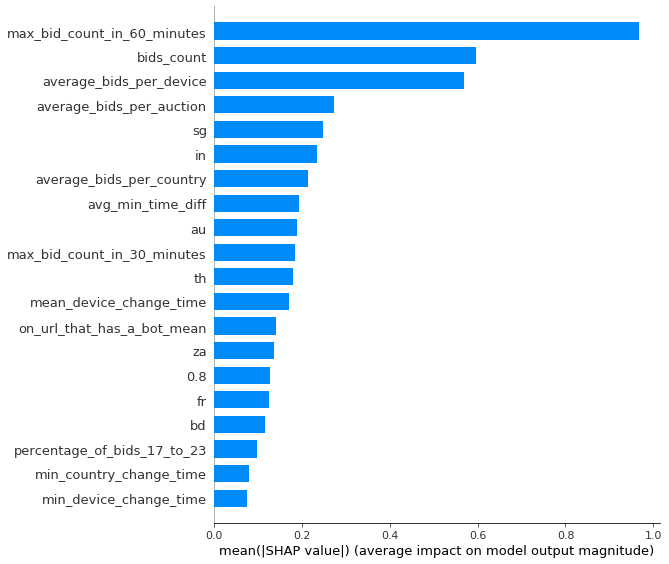

In [249]:
#SHAP
#, np.array(x_train, dtype=np.float64)
x_train.drop('outcome', axis=1, inplace=True)
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(x_train)
shap.summary_plot(shap_values, x_train, plot_type='bar')

Looks like the classifier gave high importance to more one-hot country columns than witout the SMOTE, probably due to them becoming non-binary after resampling.
This could imply that data cleaning after resampling is of certain value.

In [250]:
def shap_plot(S,model,j):
    explainerModel = shap.TreeExplainer(model)
    shap_values_Model = explainerModel.shap_values(S)
    p = shap.force_plot(explainerModel.expected_value, shap_values_Model[j], S.iloc[[j]])
    return(p)

In [251]:
#kernelExplainer
rf_shap_values = shap.KernelExplainer(rf.predict ,wrong_rf)

In [252]:
wrong_rf.astype('float64')

,payment_account_prefix_same_as_address_prefix,address_infrequent_address,address_rare_address,payment_account_infrequent_account,payment_account_rare_account,bids_count,auction_count,merchandise_count,device_count,country_count,...,mean_country_change_time,mean_device_change_time,mean_ip_change_time,min_country_change_time,min_device_change_time,min_ip_change_time,percentage_of_bids_11_to_17,percentage_of_bids_17_to_23,percentage_of_bids_23_to_5,percentage_of_bids_5_to_11
1365,0.0,0.0,1.0,0.0,0.0,2500.0,114.0,1.0,204.0,7.0,...,42667.0,406.0,388.0,2.0,0.0,0.0,31.040000,32.720000,13.400000,22.840000
1438,0.0,0.0,1.0,0.0,1.0,4184.0,399.0,1.0,430.0,106.0,...,281.0,226.0,221.0,0.0,0.0,0.0,28.943595,29.565010,18.355641,23.135755
559,0.0,0.0,0.0,0.0,0.0,1007.0,75.0,1.0,118.0,4.0,...,1707.0,1090.0,864.0,2.0,1.0,0.0,35.352532,19.364449,14.200596,31.082423
2006,0.0,0.0,1.0,0.0,1.0,1317.0,172.0,1.0,218.0,37.0,...,1110.0,214.0,206.0,4.0,0.0,0.0,17.767654,40.167046,16.021260,26.044039
1242,0.0,0.0,1.0,0.0,1.0,9748.0,653.0,1.0,468.0,65.0,...,175.0,104.0,91.0,0.0,0.0,0.0,29.226508,27.000410,24.148543,19.624538
98,0.0,1.0,0.0,0.0,0.0,922.0,28.0,1.0,114.0,2.0,...,3943.0,930.0,876.0,291.0,0.0,0.0,11.496746,21.800434,31.236443,35.466377
685,0.0,0.0,1.0,1.0,0.0,763.0,179.0,1.0,193.0,43.0,...,526.0,369.0,364.0,0.0,0.0,0.0,14.809961,30.144168,26.081258,28.964613
1430,0.0,0.0,1.0,0.0,1.0,1464.0,39.0,1.0,11.0,3.0,...,37641.0,20802.0,18383.0,1.0,1.0,1.0,27.185792,57.445355,5.191257,10.177596
414,0.0,0.0,1.0,0.0,1.0,6002.0,552.0,1.0,470.0,90.0,...,87.0,45.0,44.0,0.0,0.0,0.0,8.563812,21.059647,33.705432,36.671110
1291,1.0,0.0,0.0,0.0,0.0,4569.0,275.0,1.0,408.0,29.0,...,252.0,202.0,194.0,0.0,0.0,0.0,21.733421,34.624644,23.725104,19.916831


## 10.2 Analyzing Mistakes After SMOTE Resampling

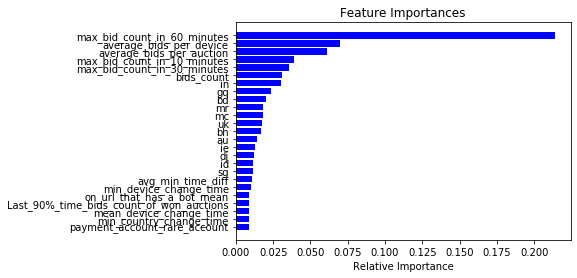

In [253]:
importances = xgb_model.feature_importances_
indices = np.argsort(importances)
features = x_train.columns
plt.title('Feature Importances')
plt.barh(range(len(indices[len(indices)-25:len(indices)])), importances[indices[len(indices)-25:len(indices)]], color='b', align='center')
plt.yticks(range(len(indices[len(indices)-25:len(indices)])), [features[i] for i in indices[len(indices)-25:len(indices)]])
plt.xlabel('Relative Importance')
plt.show()

In [254]:
important_features = features[indices[len(indices)-50:len(indices)]]

In [255]:
values = importances[indices[len(indices)-50:len(indices)]]
sum(values)

0.8921828321181238

In [256]:
xgb_error_features = (x_test[xgb_pred != y_test])[important_features]
xgb_error_features

,az,0.8,mean_country_change_time,np,it,fr,cy,uy,percentage_of_bids_17_to_23,auction_count,...,mr,bd,gq,in,bids_count,max_bid_count_in_30_minutes,max_bid_count_in_10_minutes,average_bids_per_auction,average_bids_per_device,max_bid_count_in_60_minutes
1365,0.000000,21.0,42667.0,0.000000,0.000000,0.000402,0.000000,0.000000,32.720000,114,...,0.000000,0.000000,0.0,0.000000,2500,34.0,24.0,21.929825,12.254902,56.0
1290,0.000000,4.0,2995.0,0.000000,0.000000,0.000000,0.000000,0.000000,36.983471,116,...,0.000000,0.003984,0.0,0.143426,484,12.0,10.0,4.172414,3.967213,16.0
1438,0.008032,14.0,281.0,0.000000,0.006885,0.006885,0.000000,0.000574,29.565010,399,...,0.000574,0.038439,0.0,1.000000,4184,42.0,21.0,10.486216,9.730233,71.0
559,0.000000,1.0,1707.0,0.000000,0.000000,0.000000,0.000000,0.000000,19.364449,75,...,0.000000,0.000000,0.0,0.000000,1007,17.0,10.0,13.426667,8.533898,29.0
29,0.000244,232.0,575.0,0.000000,0.003901,0.003901,0.000000,0.000000,56.145187,235,...,0.000000,0.000000,0.0,1.000000,4353,313.0,133.0,18.523404,12.508621,523.0
1242,0.000165,91.0,175.0,0.000165,0.001321,0.005121,0.000000,0.000000,27.000410,653,...,0.000000,0.000000,0.0,0.008755,9748,221.0,82.0,14.928025,20.829060,386.0
98,0.000000,13.0,3943.0,0.000000,0.000000,0.000000,0.000000,0.000000,21.800434,28,...,0.000000,0.000000,0.0,0.000000,922,43.0,19.0,32.928571,8.087719,75.0
1669,0.000000,6.0,15322.0,0.000000,0.000000,0.000000,0.000000,0.000000,11.216805,30,...,0.000000,0.000000,0.0,0.000000,2523,116.0,44.0,84.100000,2523.000000,225.0
685,0.000000,33.0,526.0,0.000000,0.077193,0.010526,0.000000,0.000000,30.144168,179,...,0.000000,0.000000,0.0,0.157895,763,59.0,54.0,4.262570,3.953368,64.0
1430,0.000000,41.0,37641.0,0.000000,0.000000,0.000000,0.000000,0.000000,57.445355,39,...,0.000000,0.000000,0.0,0.000000,1464,94.0,43.0,37.538462,133.090909,146.0


In [257]:
bots_mean = bots_mean.transpose()
human_mean = human_mean.transpose()

In [258]:
bots_mean

address_infrequent_address               0.129870
address_rare_address                     0.584416
payment_account_infrequent_account       0.116883
payment_account_rare_account             0.376623
bids_count                            4855.779221
                                         ...     
percentage_of_bids_11_to_17             27.993290
percentage_of_bids_17_to_23             28.539668
percentage_of_bids_23_to_5              19.924253
percentage_of_bids_5_to_11              23.542789
outcome                                  1.000000
Name: mean, Length: 266, dtype: float64

In [259]:
important_bots_mean = bots_mean[important_features]
important_humans_mean = human_mean[important_features]

In [260]:
important_bots_mean.values

array([1.71957698e-03, 1.76714286e+02, 7.21692208e+03, 4.15498928e-04,
       2.78054823e-02, 4.22260797e-02, 5.77056907e-04, 1.88318406e-05,
       2.85396682e+01, 1.58324675e+02, 2.63364652e-03, 1.31205340e-03,
       5.84415584e-01, 9.68696261e-02, 5.21005073e-02, 2.31012987e+02,
       1.42438256e-01, 8.06233766e+01, 1.34906160e+02, 2.19626583e+02,
       1.28790807e-02, 9.68815183e-01, 2.35427888e+01, 6.36576413e-05,
       1.66530680e-01, 3.76623377e-01, 2.13424675e+03, 3.17109091e+03,
       6.50779221e+02, 1.85426619e-01, 9.32896104e+02, 1.16525030e+12,
       4.36792309e-02, 2.60963438e-01, 2.82030603e-05, 2.08212873e-03,
       9.89654998e-02, 6.66211478e-04, 9.68842232e-02, 2.89017759e-07,
       0.00000000e+00, 1.31321811e-03, 3.06949019e-06, 2.26220535e-01,
       4.85577922e+03, 1.12233766e+02, 5.44805195e+01, 2.66736167e+01,
       1.21019242e+02, 1.85896104e+02])

In [261]:
important_bots_mean

az                                          1.719577e-03
0.8                                         1.767143e+02
mean_country_change_time                    7.216922e+03
np                                          4.154989e-04
it                                          2.780548e-02
fr                                          4.222608e-02
cy                                          5.770569e-04
uy                                          1.883184e-05
percentage_of_bids_17_to_23                 2.853967e+01
auction_count                               1.583247e+02
sv                                          2.633647e-03
et                                          1.312053e-03
address_rare_address                        5.844156e-01
my                                          9.686963e-02
de                                          5.210051e-02
0.6                                         2.310130e+02
th                                          1.424383e-01
max_consec_no_param_change     

In [266]:
#histogram of bots vs humans
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        

def plot_histogram(names, bots_vals, humans_vals):
  x = np.arange(len(names))
  width = 0.8
  fig , ax = plt.subplots()
  rects1 = ax.barh(x - width/2, bots_vals.values.tolist(), width, label='Bots', align='center')
  rects2 = ax.barh(x + width/2, humans_vals.values.tolist(), width, label='Humans', align='center')
  fig.set_size_inches(15, 10)
  
  ax.set_ylabel('Scores')
  ax.set_title('Scores by group')
  ax.set_yticks(x)
  ax.set_yticklabels(names)
  ax.legend()



  autolabel(rects1)
  autolabel(rects2)
  fig.tight_layout()
  plt.show()
  return fig


Nearest Neighbors of the bots that the model failed on



In [267]:
#K nearest neighbors
important_x_train = x_train[important_features]
knn = NearestNeighbors(n_neighbors=5, algorithm='brute').fit(important_x_train)
index_lst = knn.kneighbors(xgb_error_features, return_distance=False)
for i in index_lst:
  print(y_train.iloc[i])

730     0.0
1194    0.0
1287    0.0
652     0.0
106     0.0
Name: outcome, dtype: float64
836     0.0
344     1.0
1535    1.0
1813    0.0
1071    0.0
Name: outcome, dtype: float64
1198    0.0
1101    0.0
96      0.0
171     0.0
479     0.0
Name: outcome, dtype: float64
1174    0.0
1308    0.0
1889    0.0
1394    0.0
329     0.0
Name: outcome, dtype: float64
1180    0.0
2007    0.0
803     0.0
1863    0.0
648     0.0
Name: outcome, dtype: float64
1998    0.0
1828    0.0
1445    0.0
1589    0.0
789     0.0
Name: outcome, dtype: float64
1469    0.0
671     0.0
486     0.0
1471    0.0
482     0.0
Name: outcome, dtype: float64
957     0.0
698     0.0
519     0.0
1739    0.0
1534    1.0
Name: outcome, dtype: float64
1787    0.0
1120    0.0
1221    0.0
917     0.0
78      0.0
Name: outcome, dtype: float64
462     1.0
962     0.0
1741    0.0
1165    0.0
1013    0.0
Name: outcome, dtype: float64
48      0.0
1578    0.0
193     1.0
982     0.0
883     0.0
Name: outcome, dtype: float64
140     0.